In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model
from scipy.stats import multivariate_normal
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import pandas as pd
from datetime import timedelta, datetime, date

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

from matplotlib import rc
rc('font',**{'family':'sans-serif'})
rc('figure', **{'dpi': 300})

# Первая часть, скачиваем данные, фильтруем.

In [2]:
df = pd.read_csv('owid-covid-data.csv')
df.date = pd.to_datetime(df.date, infer_datetime_format=True)

In [3]:
BEGIN_DATE = datetime.strptime('2020-03-03', '%Y-%m-%d')
END_DATE = BEGIN_DATE + timedelta(days=49)

In [4]:
df

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
161157      ZWE    Africa     Zimbabwe 2022-02-07     230402.0        0.0   
161158      ZWE    Africa     Zimbabwe 2022-02-08     230603.0      201.0   
161159      ZWE    Africa     Zimbabwe 2022-02-09     230740.0      137.0   
161160      ZWE    Africa     Zimbabwe 2022-02-10     231040.0      300.0   
161161      ZWE    Africa     Zimbabwe 2022-02-11     231214.0      174.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
161157             105.143        5362.0         0.0                3.429   
161158             107.429        5366.0         4.0                2.286   
161159             104.000        5367.0         1.0                2.143   
161160             124.286        5373.0         6.0                2.286   
161161             149.143        5374.0         1.0                2.429   

        ...  female_smokers  male_smokers  handwashing_facilities  \
0       ...             NaN           NaN                  37.746   
1       ...             NaN           NaN                  37.746   
2       ...             NaN           NaN                  37.746   
3       ...             NaN           NaN                  37.746   
4       ...             NaN           NaN                  37.746   
...     ...             ...           ...                     ...   
161157  ...             1.6          30.7                  36.791   
161158  ...             1.6          30.7                  36.791   
161159  ...             1.6          30.7                  36.791   
161160  ...             1.6          30.7                  36.791   
161161  ...             1.6          30.7                  36.791   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                              0.5            64.83                    0.511   
1                              0.5            64.83                    0.511   
2                              0.5            64.83                    0.511   
3                              0.5            64.83                    0.511   
4                              0.5            64.83                    0.511   
...                            ...              ...                      ...   
161157                         1.7            61.49                    0.571   
161158                         1.7            61.49                    0.571   
161159                         1.7            61.49                    0.571   
161160                         1.7            61.49                    0.571   
161161                         1.7            61.49                    0.571   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN               

In [5]:
filtred_df = df[df.date.between(BEGIN_DATE, END_DATE)][df.iso_code == 'RUS' ]

<ipython-input-5-3c1e45f3f361>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtred_df = df[df.date.between(BEGIN_DATE, END_DATE)][df.iso_code == 'RUS' ]


In [6]:
filtred_df.new_cases = filtred_df.new_cases.replace({0: 1})

In [7]:
filtred_df

iso_code continent location       date  total_cases  new_cases  \
119948      RUS    Europe   Russia 2020-03-03          3.0        1.0   
119949      RUS    Europe   Russia 2020-03-04          3.0        1.0   
119950      RUS    Europe   Russia 2020-03-05          4.0        1.0   
119951      RUS    Europe   Russia 2020-03-06         13.0        9.0   
119952      RUS    Europe   Russia 2020-03-07         13.0        1.0   
119953      RUS    Europe   Russia 2020-03-08         17.0        4.0   
119954      RUS    Europe   Russia 2020-03-09         17.0        1.0   
119955      RUS    Europe   Russia 2020-03-10         20.0        3.0   
119956      RUS    Europe   Russia 2020-03-11         20.0        1.0   
119957      RUS    Europe   Russia 2020-03-12         28.0        8.0   
119958      RUS    Europe   Russia 2020-03-13         45.0       17.0   
119959      RUS    Europe   Russia 2020-03-14         59.0       14.0   
119960      RUS    Europe   Russia 2020-03-15         63.0        4.0   
119961      RUS    Europe   Russia 2020-03-16         90.0       27.0   
119962      RUS    Europe   Russia 2020-03-17        114.0       24.0   
119963      RUS    Europe   Russia 2020-03-18        147.0       33.0   
119964      RUS    Europe   Russia 2020-03-19        199.0       52.0   
119965      RUS    Europe   Russia 2020-03-20        253.0       54.0   
119966      RUS    Europe   Russia 2020-03-21        306.0       53.0   
119967      RUS    Europe   Russia 2020-03-22        367.0       61.0   
119968      RUS    Europe   Russia 2020-03-23        438.0       71.0   
119969      RUS    Europe   Russia 2020-03-24        495.0       57.0   
119970      RUS    Europe   Russia 2020-03-25        658.0      163.0   
119971      RUS    Europe   Russia 2020-03-26        840.0      182.0   
119972      RUS    Europe   Russia 2020-03-27       1036.0      196.0   
119973      RUS    Europe   Russia 2020-03-28       1264.0      228.0   
119974      RUS    Europe   Russia 2020-03-29       1534.0      270.0   
119975      RUS    Europe   Russia 2020-03-30       1836.0      302.0   
119976      RUS    Europe   Russia 2020-03-31       2337.0      501.0   
119977      RUS    Europe   Russia 2020-04-01       2777.0      440.0   
119978      RUS    Europe   Russia 2020-04-02       3548.0      771.0   
119979      RUS    Europe   Russia 2020-04-03       4149.0      601.0   
119980      RUS    Europe   Russia 2020-04-04       4731.0      582.0   
119981      RUS    Europe   Russia 2020-04-05       5389.0      658.0   
119982      RUS    Europe   Russia 2020-04-06       6343.0      954.0   
119983      RUS    Europe   Russia 2020-04-07       7497.0     1154.0   
119984      RUS    Europe   Russia 2020-04-08       8672.0     1175.0   
119985      RUS    Europe   Russia 2020-04-09      10131.0     1459.0   
119986      RUS    Europe   Russia 2020-04-10      11917.0     1786.0   
119987      RUS    Europe   Russia 2020-04-11      13584.0     1667.0   
119988      RUS    Europe   Russia 2020-04-12      15770.0     2186.0   
119989      RUS    Europe   Russia 2020-04-13      18328.0     2558.0   
119990      RUS    Europe   Russia 2020-04-14      21102.0     2774.0   
119991      RUS    Europe   Russia 2020-04-15      24490.0     3388.0   
119992      RUS    Europe   Russia 2020-04-16      27938.0     3448.0   
119993      RUS    Europe   Russia 2020-04-17      32008.0     4070.0   
119994      RUS    Europe   Russia 2020-04-18      36793.0     4785.0   
119995      RUS    Europe   Russia 2020-04-19      42853.0     6060.0   
119996      RUS    Europe   Russia 2020-04-20      47121.0     4268.0   
119997      RUS    Europe   Russia 2020-04-21      52763.0     5642.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
119948               0.143           NaN         NaN                  NaN   
119949               0.143           NaN         NaN                  NaN   
119950               0.286           NaN         NaN

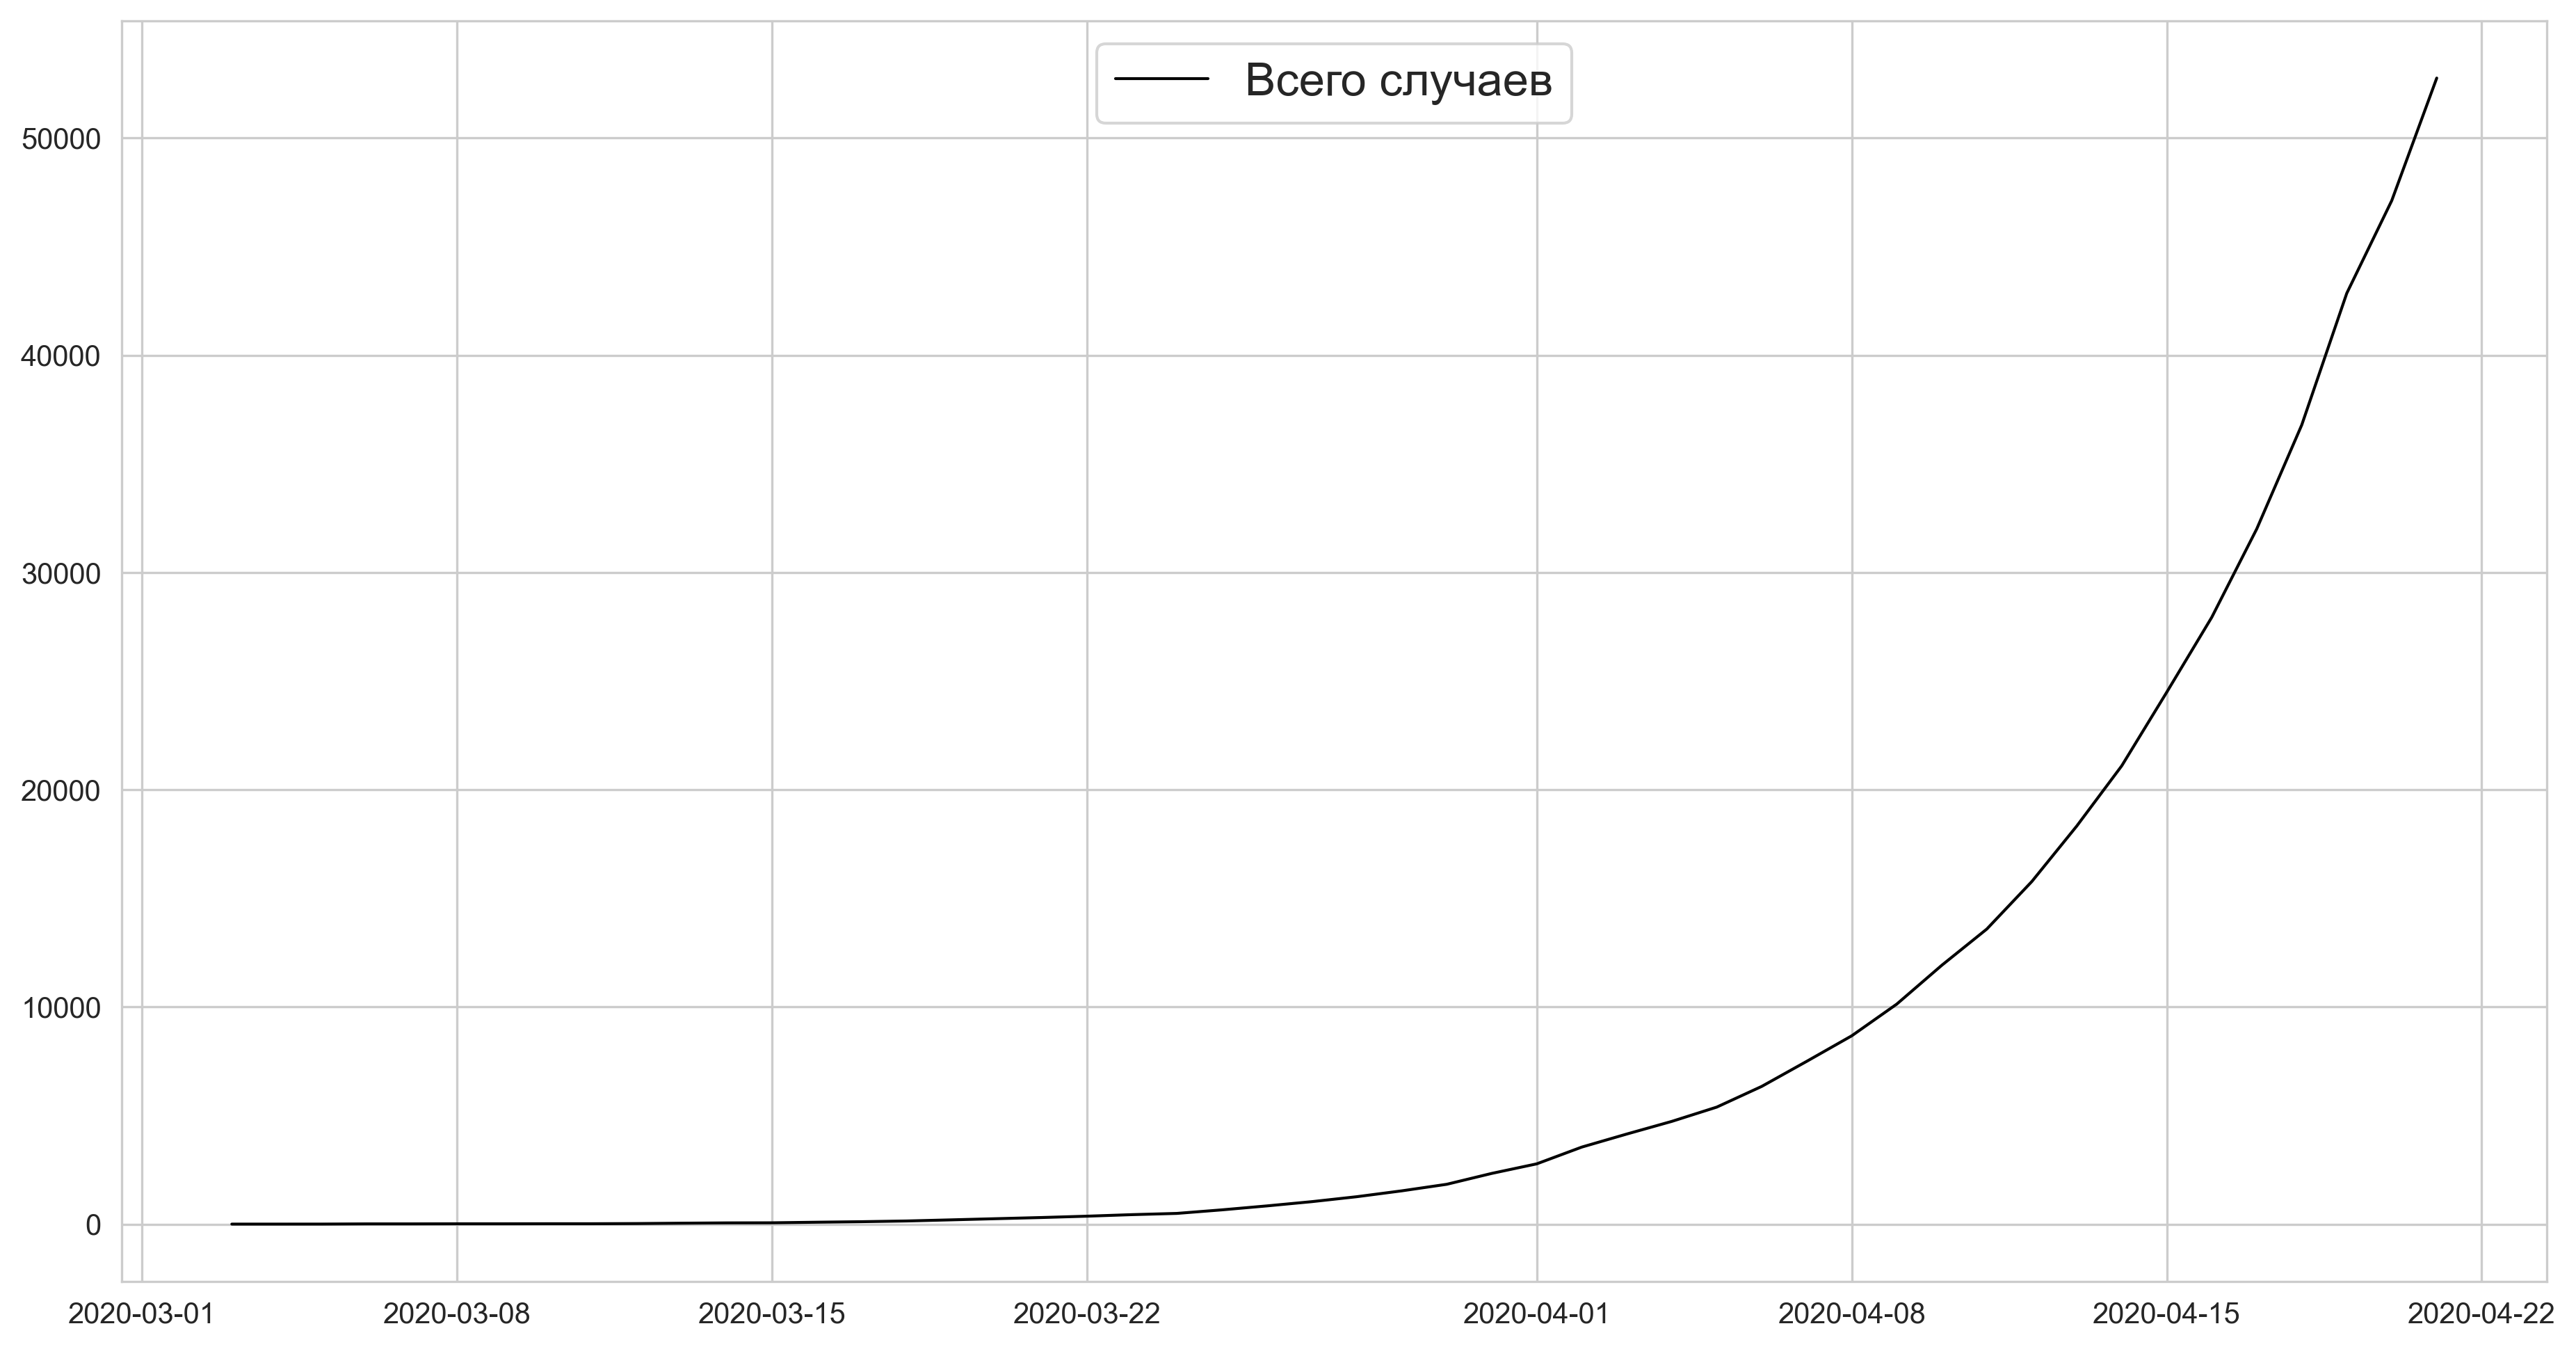

In [8]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(filtred_df.date, filtred_df.total_cases, linewidth=1, label="Всего случаев", color="black")

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

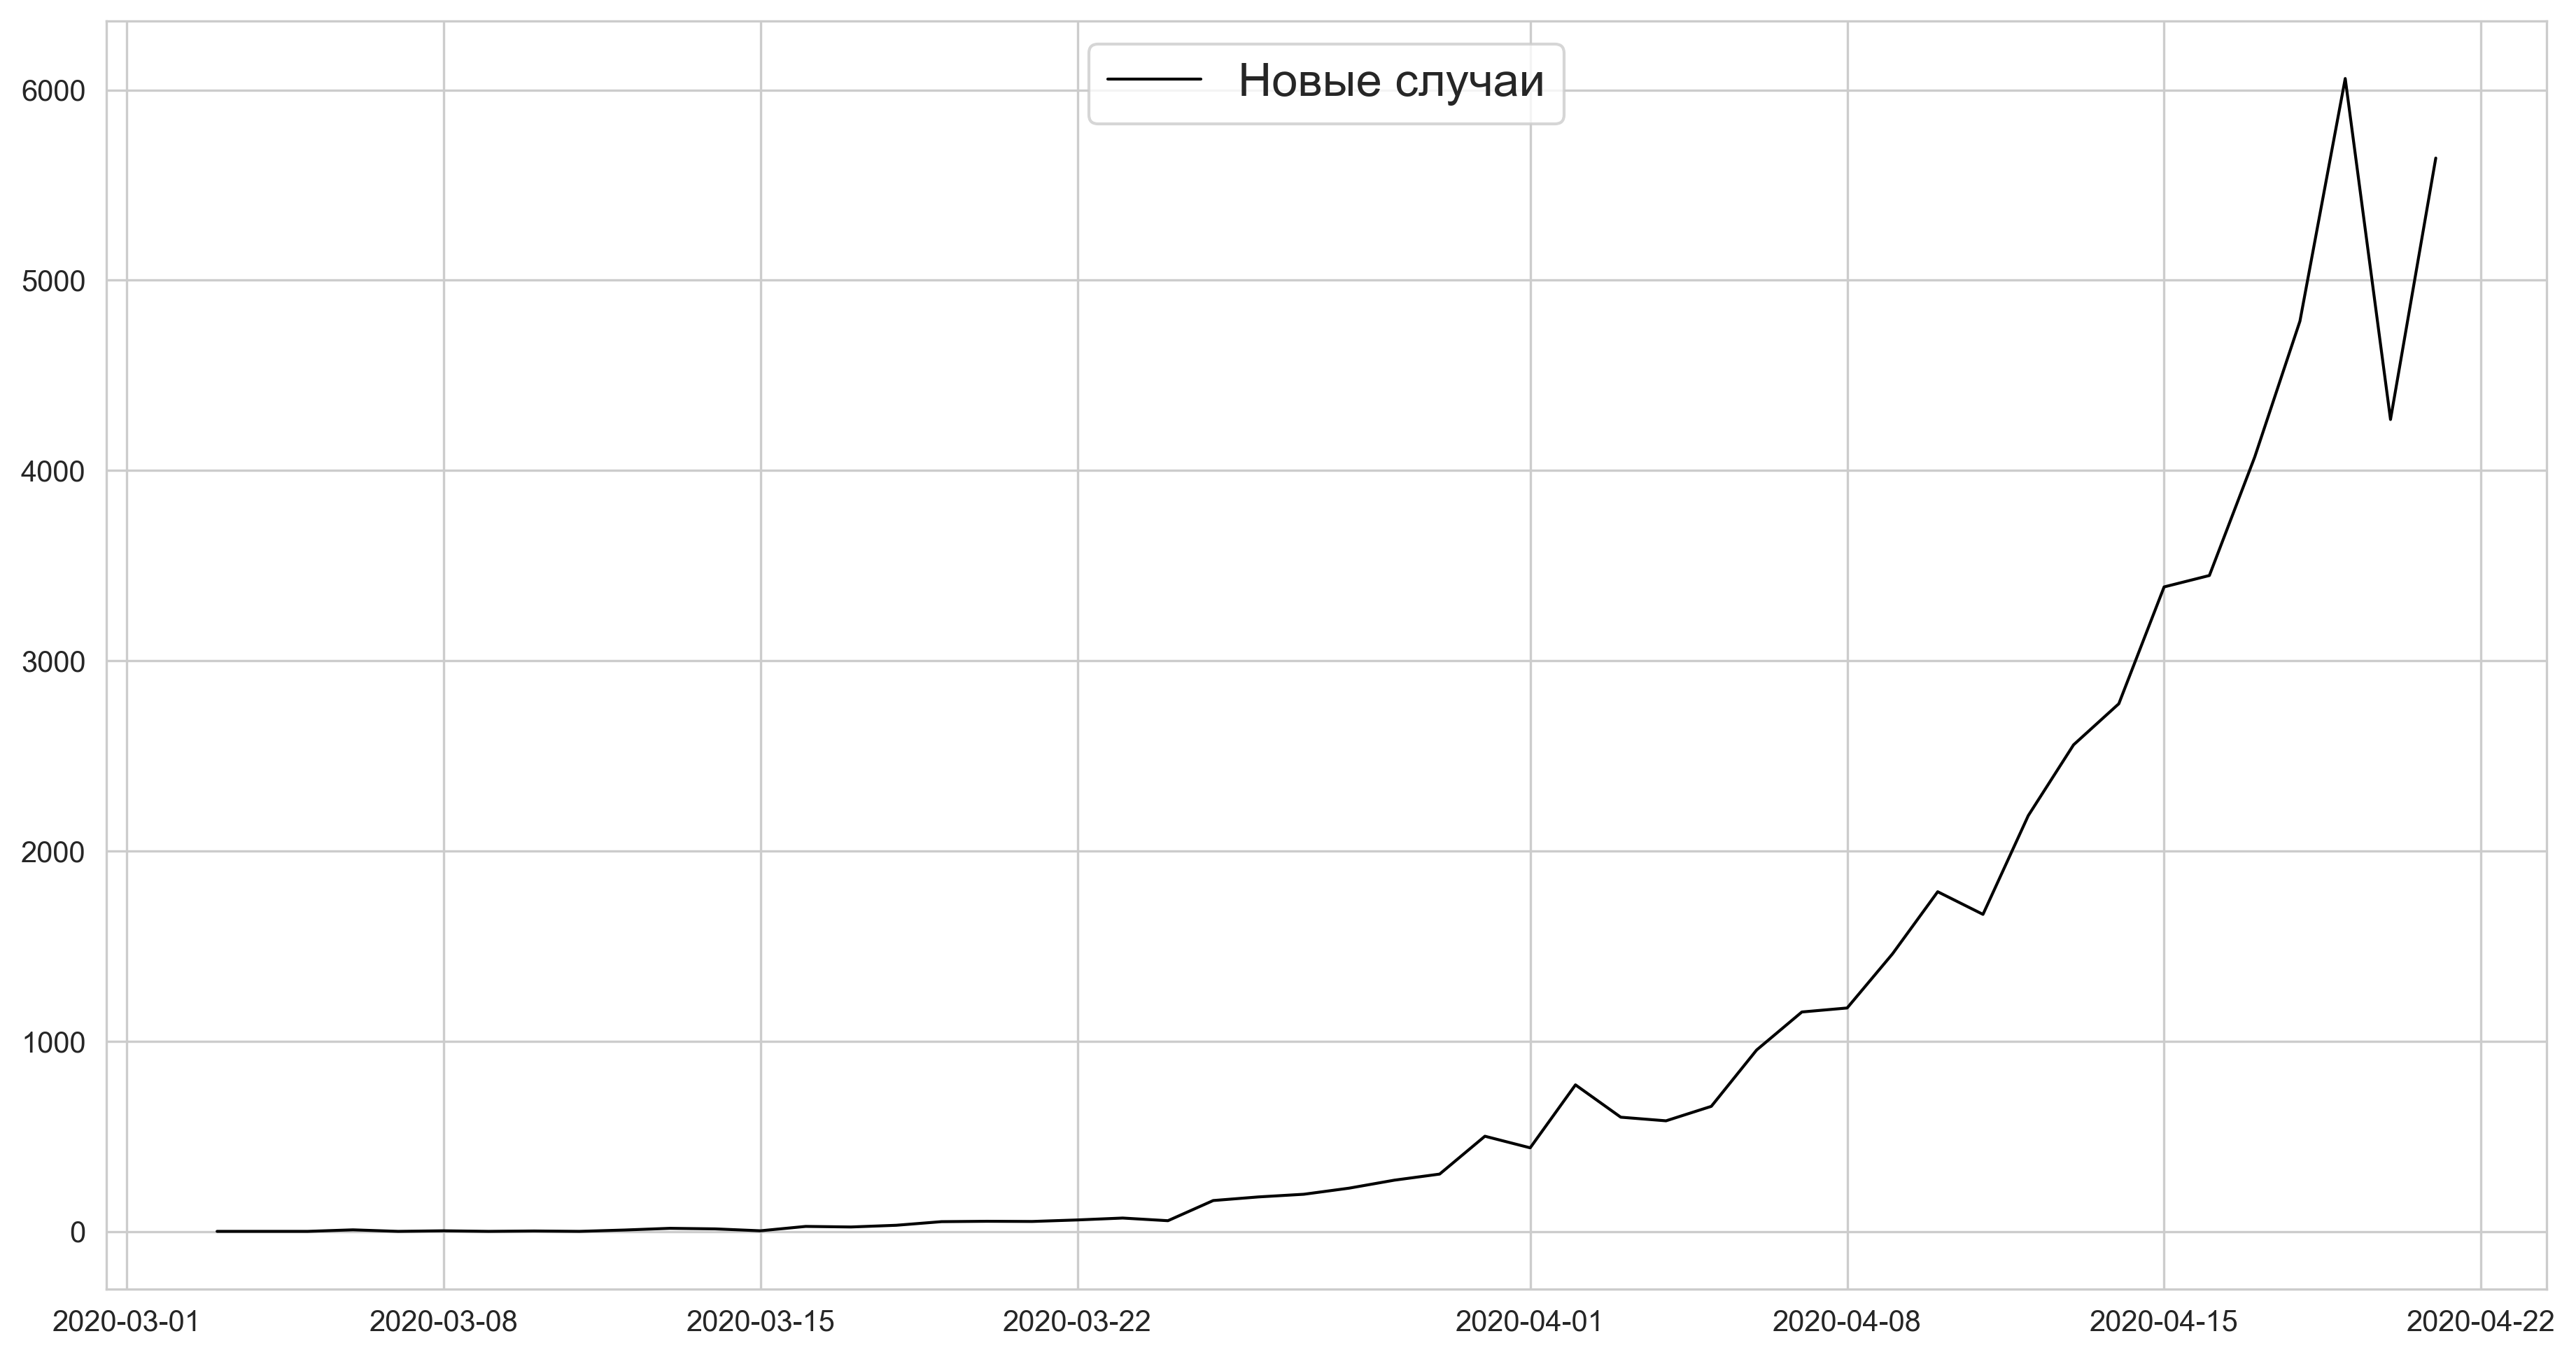

In [9]:

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(filtred_df.date, filtred_df.new_cases, linewidth=1, label="Новые случаи", color="black")

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

## Попробуем сначала просто приблизить линейной регрессией 

In [10]:
data = { 
    'x': np.array(range(1, 51)), 
}

In [11]:
train = pd.DataFrame.from_dict(data)

In [12]:
train.head()

x
0  1
1  2
2  3
3  4
4  5

In [13]:
lr_all_cases = LinearRegression(fit_intercept=True)
lr_all_cases.fit(train, np.log(filtred_df.total_cases))

LinearRegression()

In [14]:
lr_all_cases.coef_

array([0.19829091])

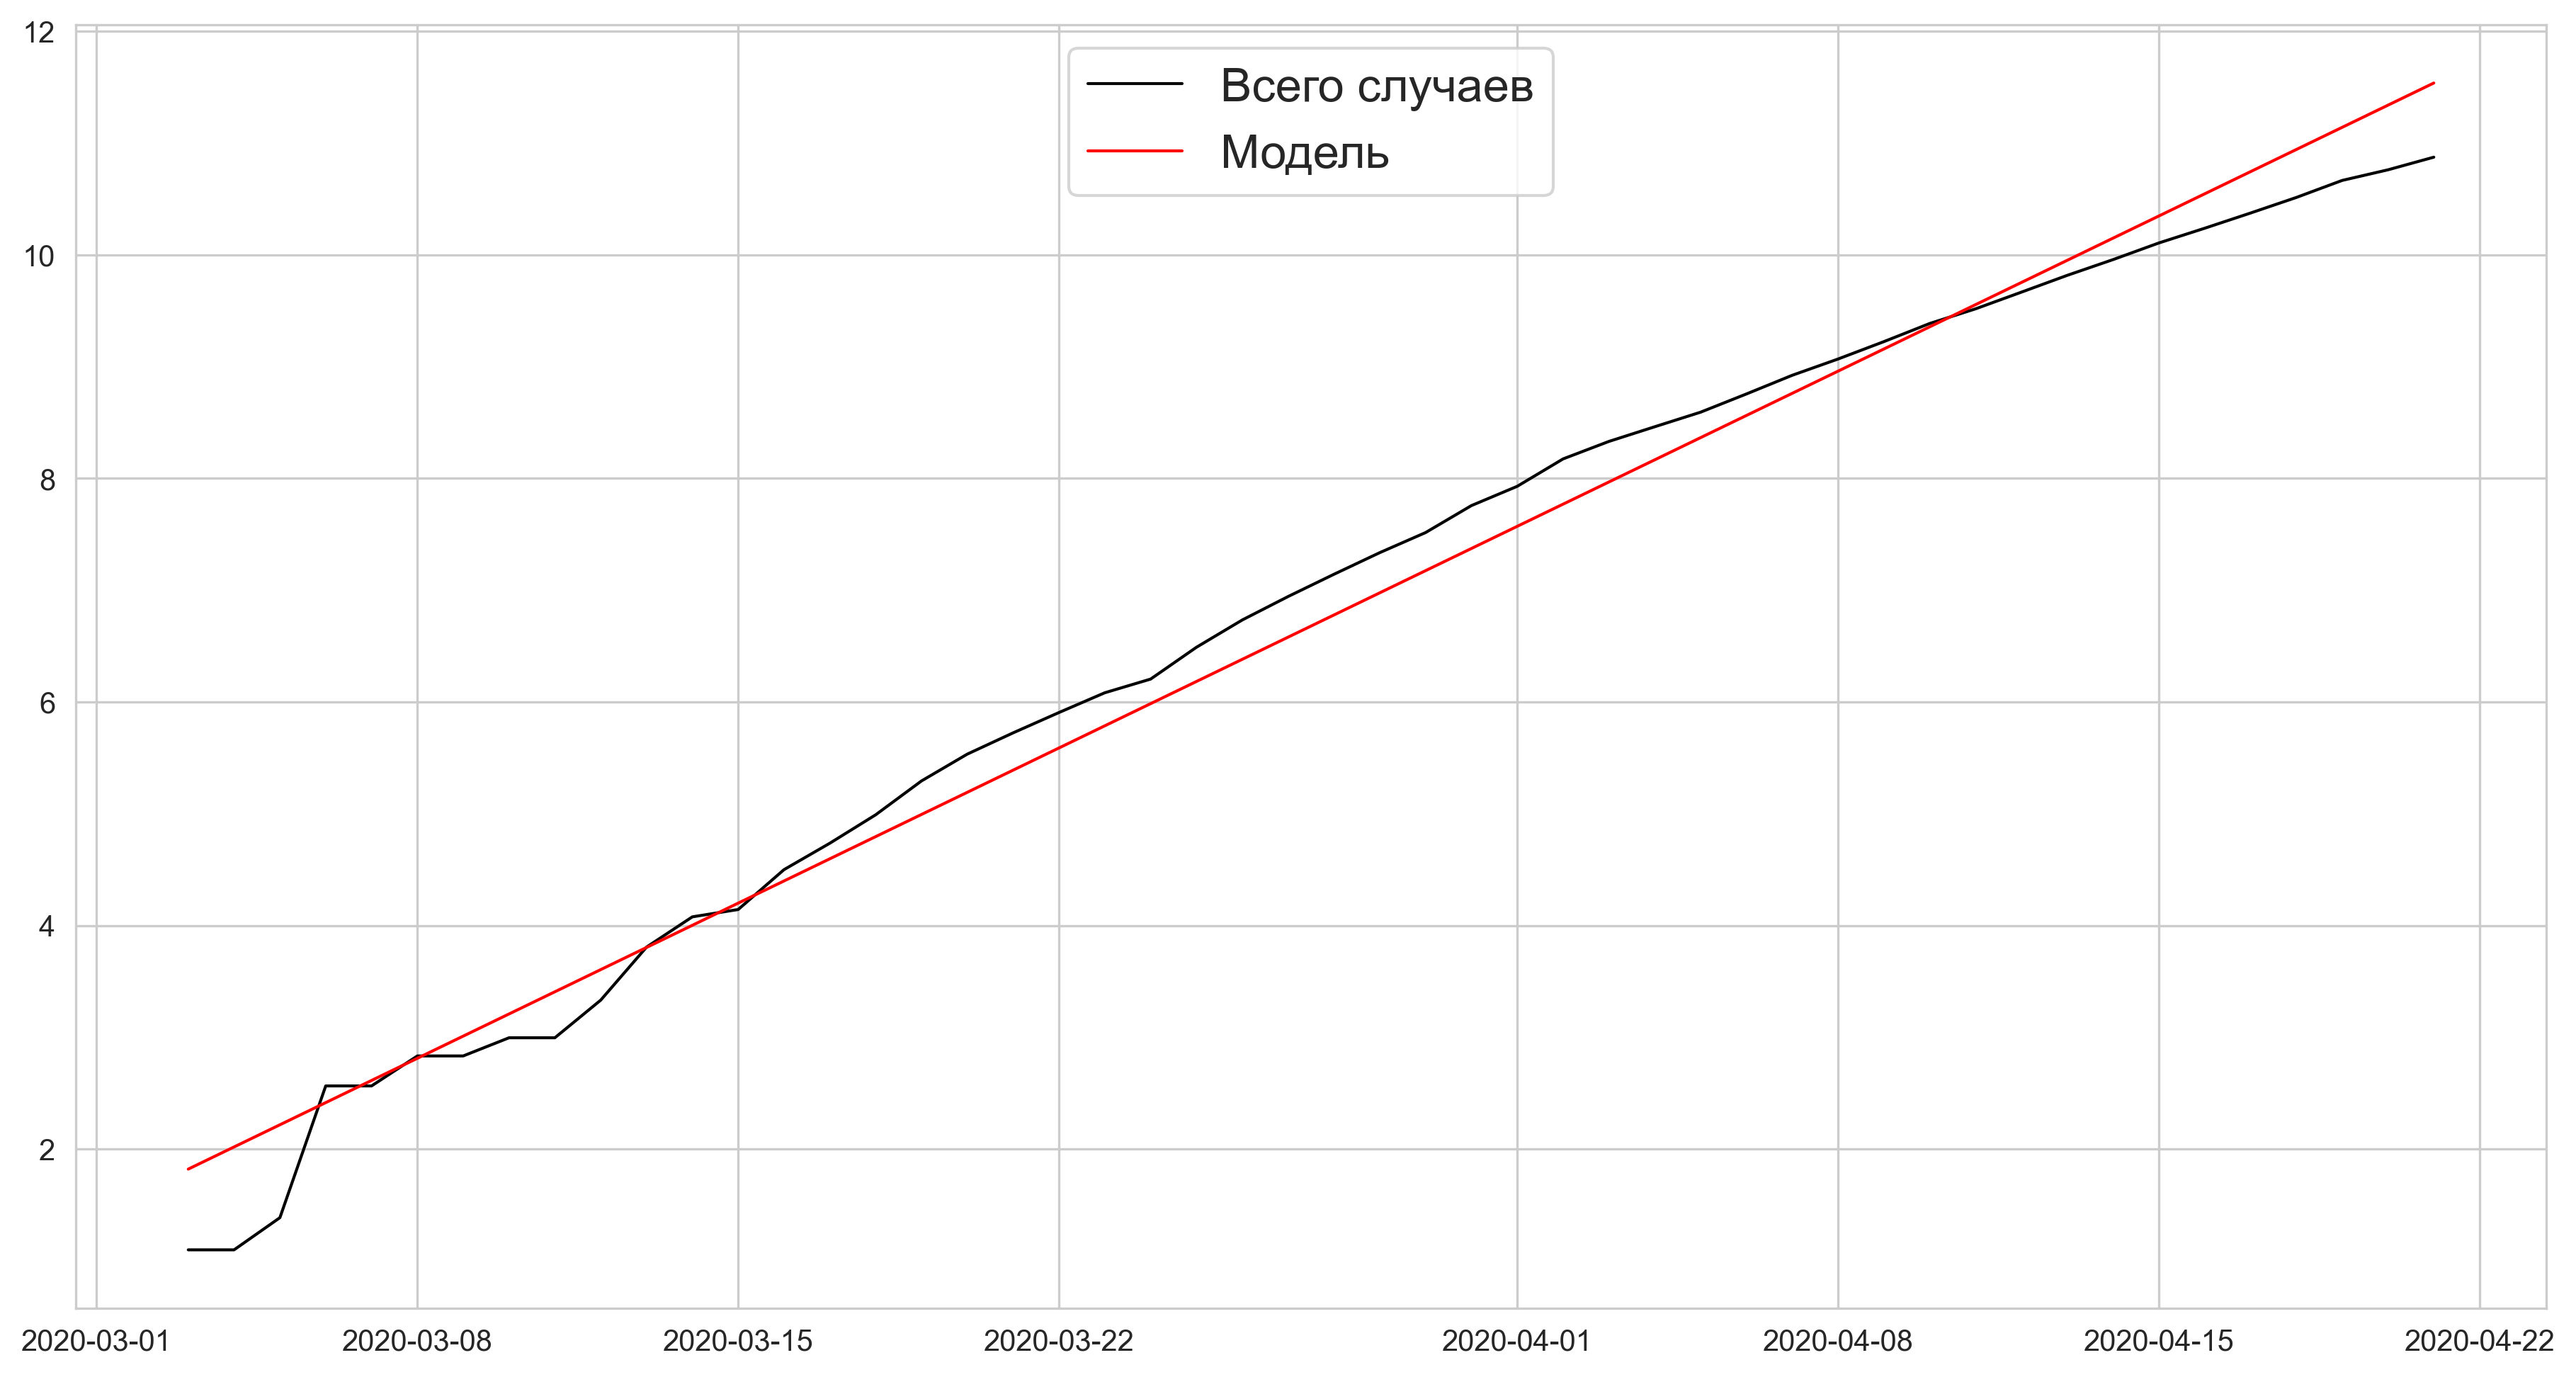

In [15]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(filtred_df.date, np.log(filtred_df.total_cases), linewidth=1, label="Всего случаев", color="black")
ax.plot(filtred_df.date, lr_all_cases.predict(train), linewidth=1, label="Модель", color="red")

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

In [16]:
lr_new_cases = LinearRegression(fit_intercept=True)
lr_new_cases.fit(train, np.log(filtred_df.new_cases))

LinearRegression()

In [17]:
lr_new_cases.coef_

array([0.18596309])

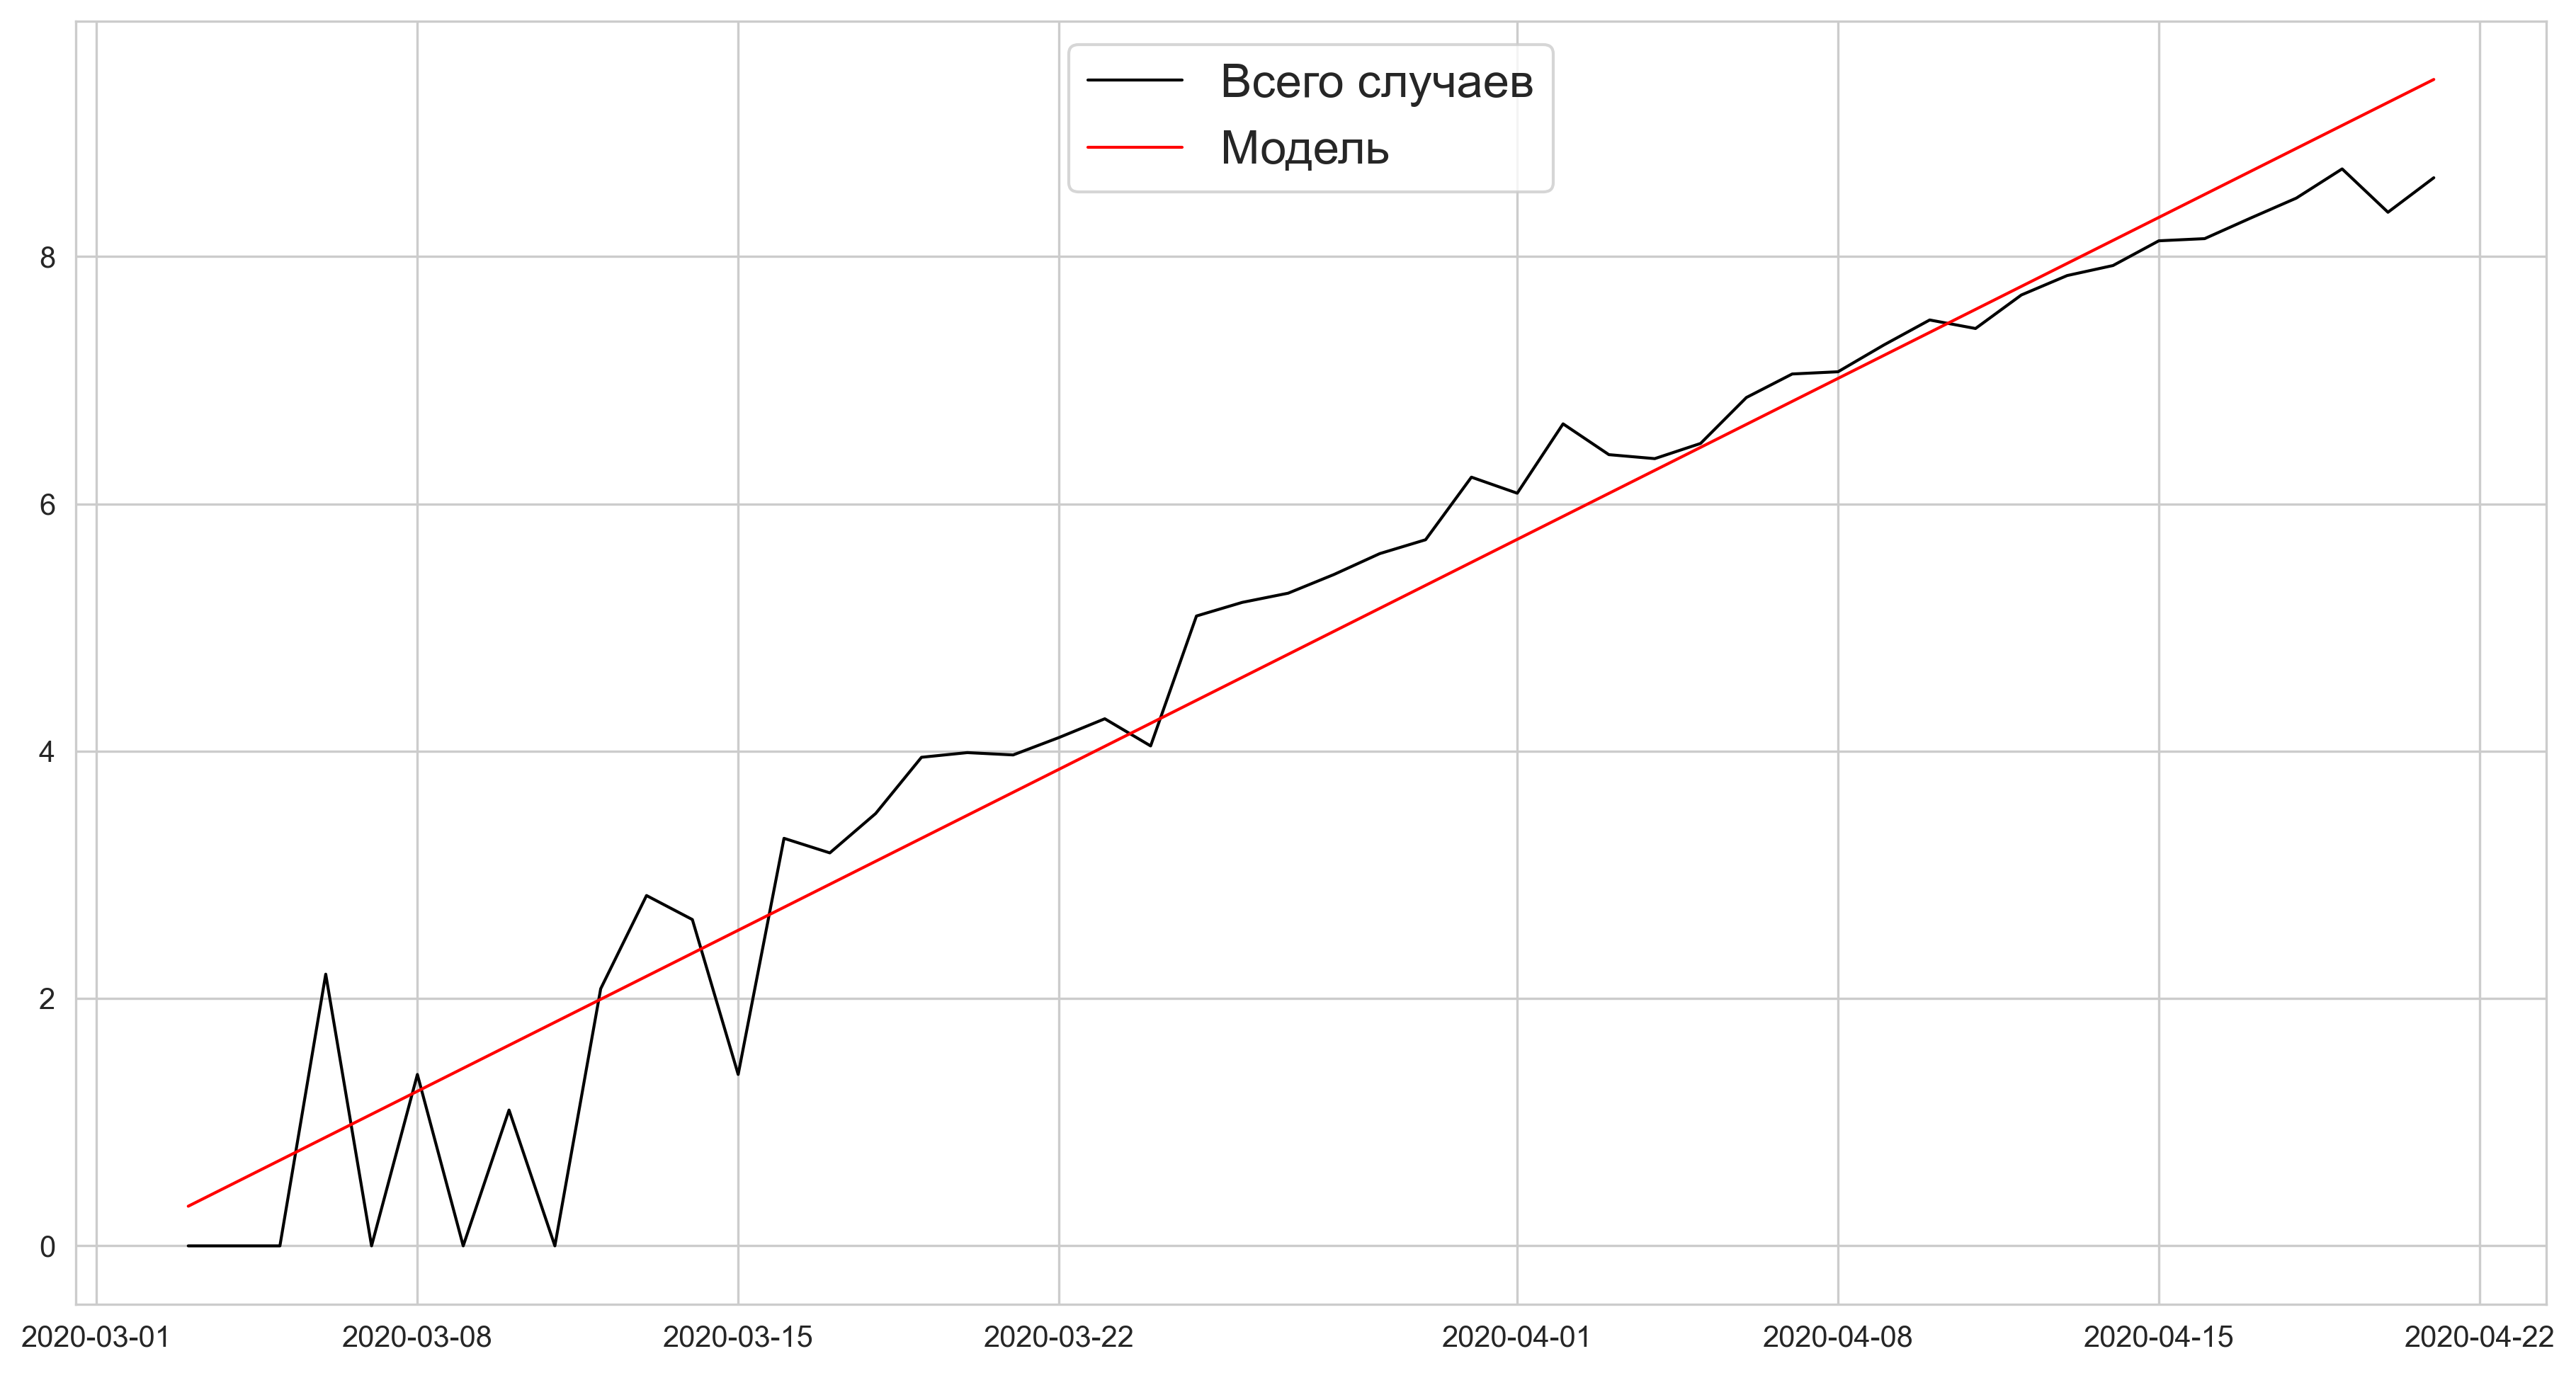

In [18]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(filtred_df.date, np.log(filtred_df.new_cases), linewidth=1, label="Всего случаев", color="black")
ax.plot(filtred_df.date, lr_new_cases.predict(train), linewidth=1, label="Модель", color="red")

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

# Вторая часть

In [19]:
def myplot_sample_lines(xs, mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(xs, w[0] + w[1]*xs, 'k-', lw=.4)
    plt.ylim((0, 20))
    plt.xlim((0, 50))
    if not points is None:
        for x, y in points:
            plt.scatter(x, y, marker='*', s=200)
        
def myplot_sample_exp(xs, mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1]*xs), 'k-', lw=.4)
    plt.ylim((0, 50000))
    plt.xlim((0, 50))
    if not points is None:
        for x, y in points:
            plt.scatter(x, y, marker='*', s=200)
      

## Найдём апостериорное распределение параметров модели для достаточно широкого априорного распределения

In [20]:
cur_mu, cur_sigma = np.array([0, 0]), 2*np.array([[1, 0], [0, 1]])
y = np.log(filtred_df.total_cases)
X = train.x.values.copy()
X.resize(train.x.values.shape[0], 1)

X = np.hstack((np.ones((len(X), 1)), X))


sigma_noise = 0.25
sigma_ = np.linalg.inv(np.linalg.inv(cur_sigma) + np.dot(X.T, X) / (sigma_noise ** 2))
mu_ = np.dot(sigma_, ( np.dot(np.linalg.inv(cur_sigma), cur_mu) + np.dot(X.T, y) / (sigma_noise ** 2)))

print(f"sigma is {sigma_},\n E is {mu_}")


sigma is [[ 5.13980667e-03 -1.52667414e-04]
 [-1.52667414e-04  5.99069925e-06]],
 E is [1.61829184 0.19841417]


## Можно заметить, что коэффициент у модели lr_all_cases при $x$, приблизительно равен математическому ожидаю этого коэфициента из достаточно широкого априорного распределения

In [21]:
def myplot_heatmap(Z, title):
    # Make the plot
    plt.axis('equal')
    plt.xlim((1.2, 2.2))
    plt.ylim((0, 1))
    plt.title(title)
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    

<ipython-input-21-a06bd8fc45a8>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


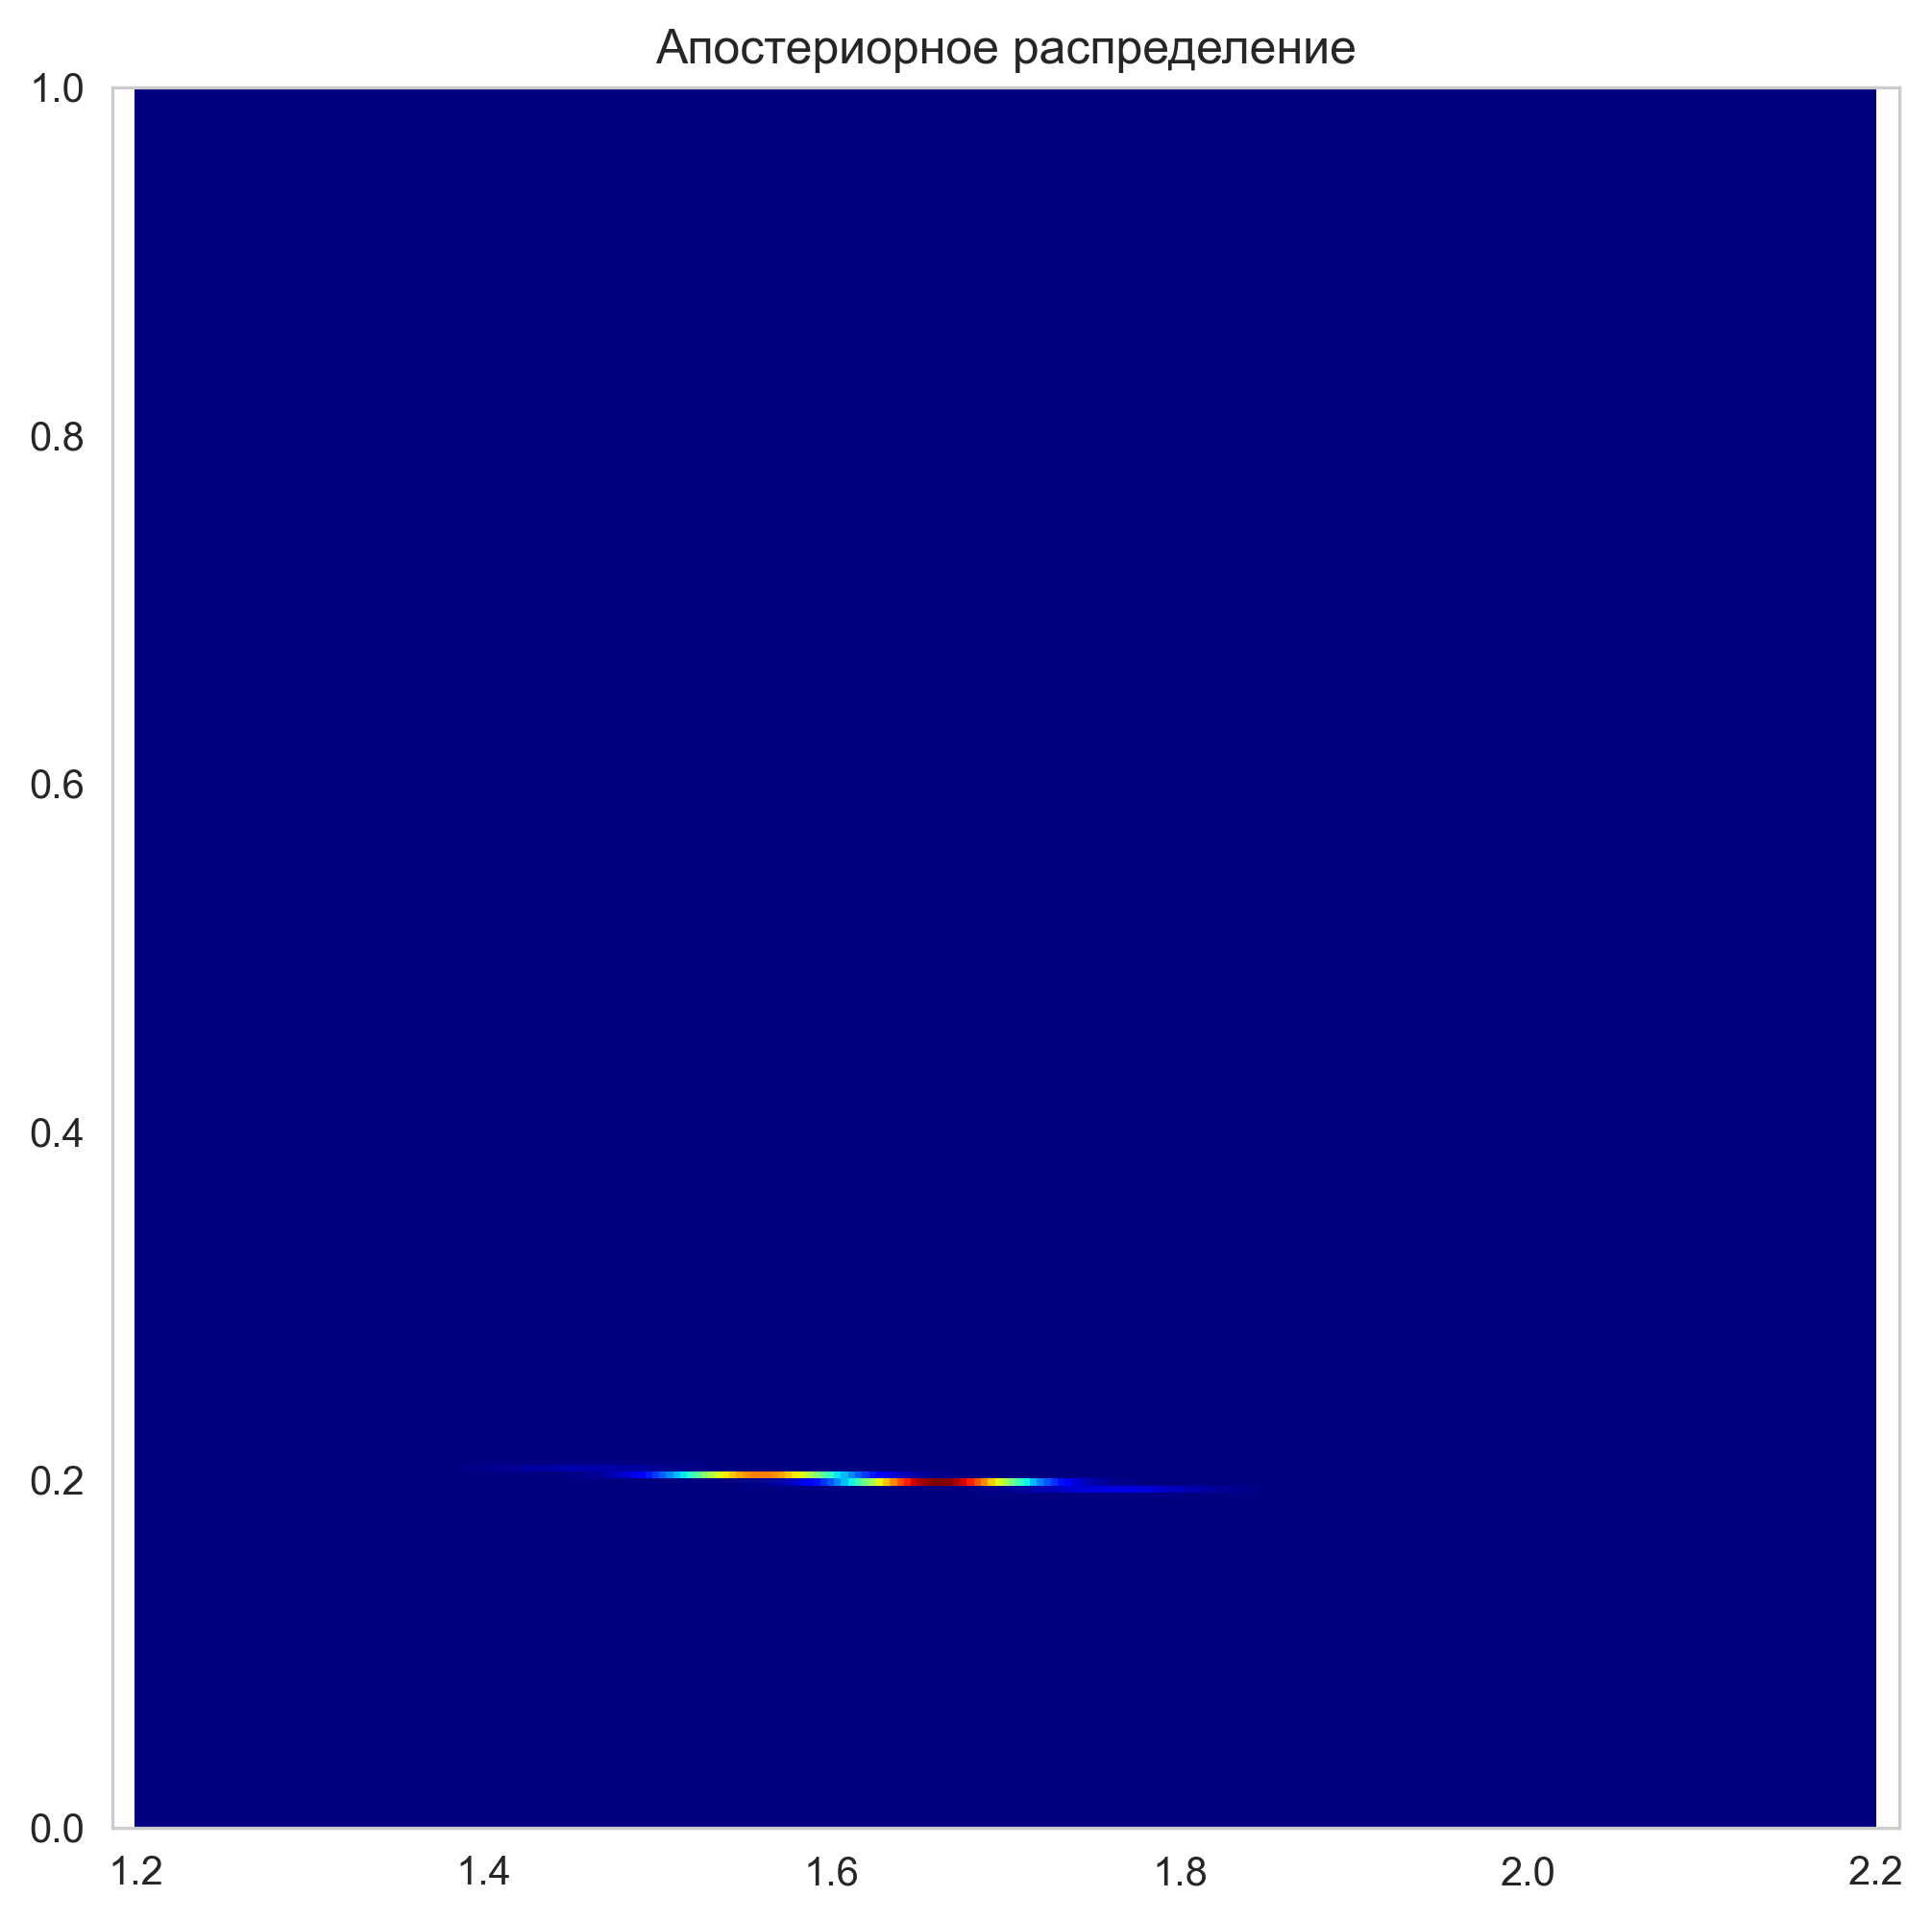

In [22]:
N = 250
#X = np.linspace(3.2922, 3.2923, N)
#Y = np.linspace(0.0605, .0606, N)
X = np.linspace(1.2, 2.2, N)
Y = np.linspace(0, 1, N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z = multivariate_normal.pdf(pos, mean=mu_, cov=sigma_)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
myplot_heatmap(Z, "Апостериорное распределение")

## Незнаю почему получилось как будто два распределения.

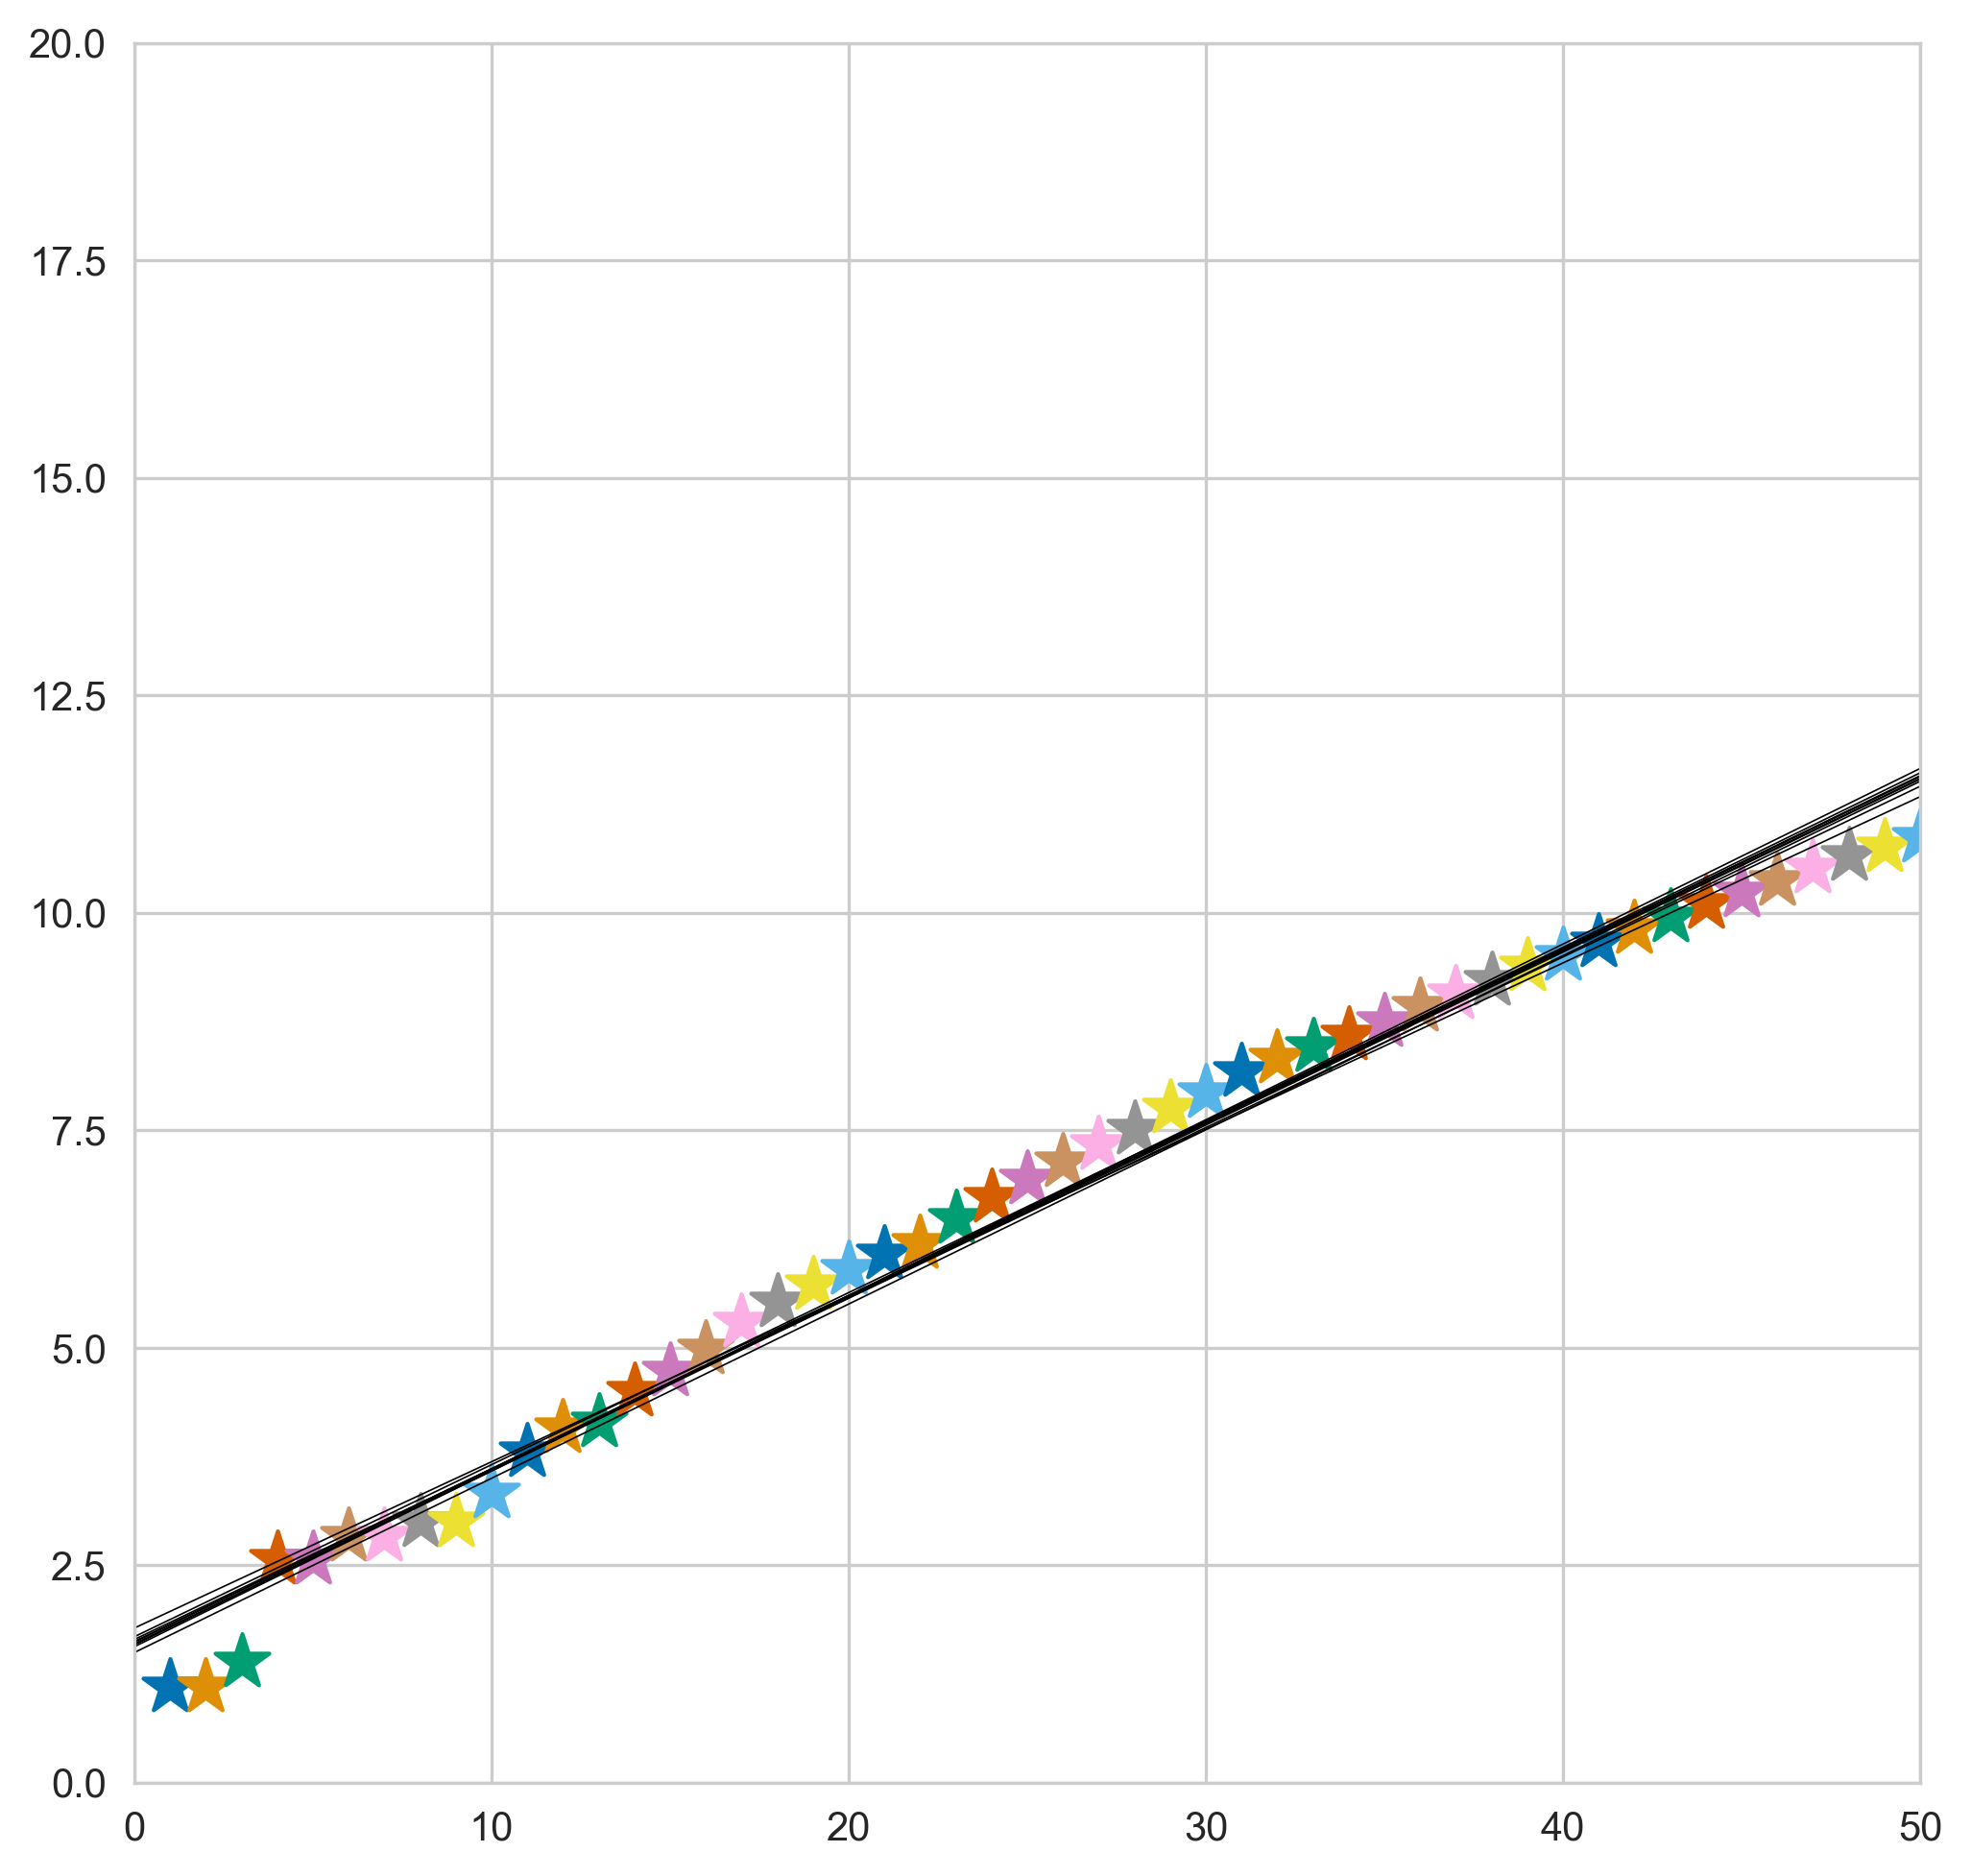

In [23]:

xs = np.linspace(0, 50, 250)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
#ax.set_xlim((xs[0], xs[-1]))
#ax.set_ylim((-1, 100))
myplot_sample_lines(xs, mu_, sigma_, 10, list(zip(range(1, 51), np.log(filtred_df.total_cases))))

## Звёдами показаные реальные данные

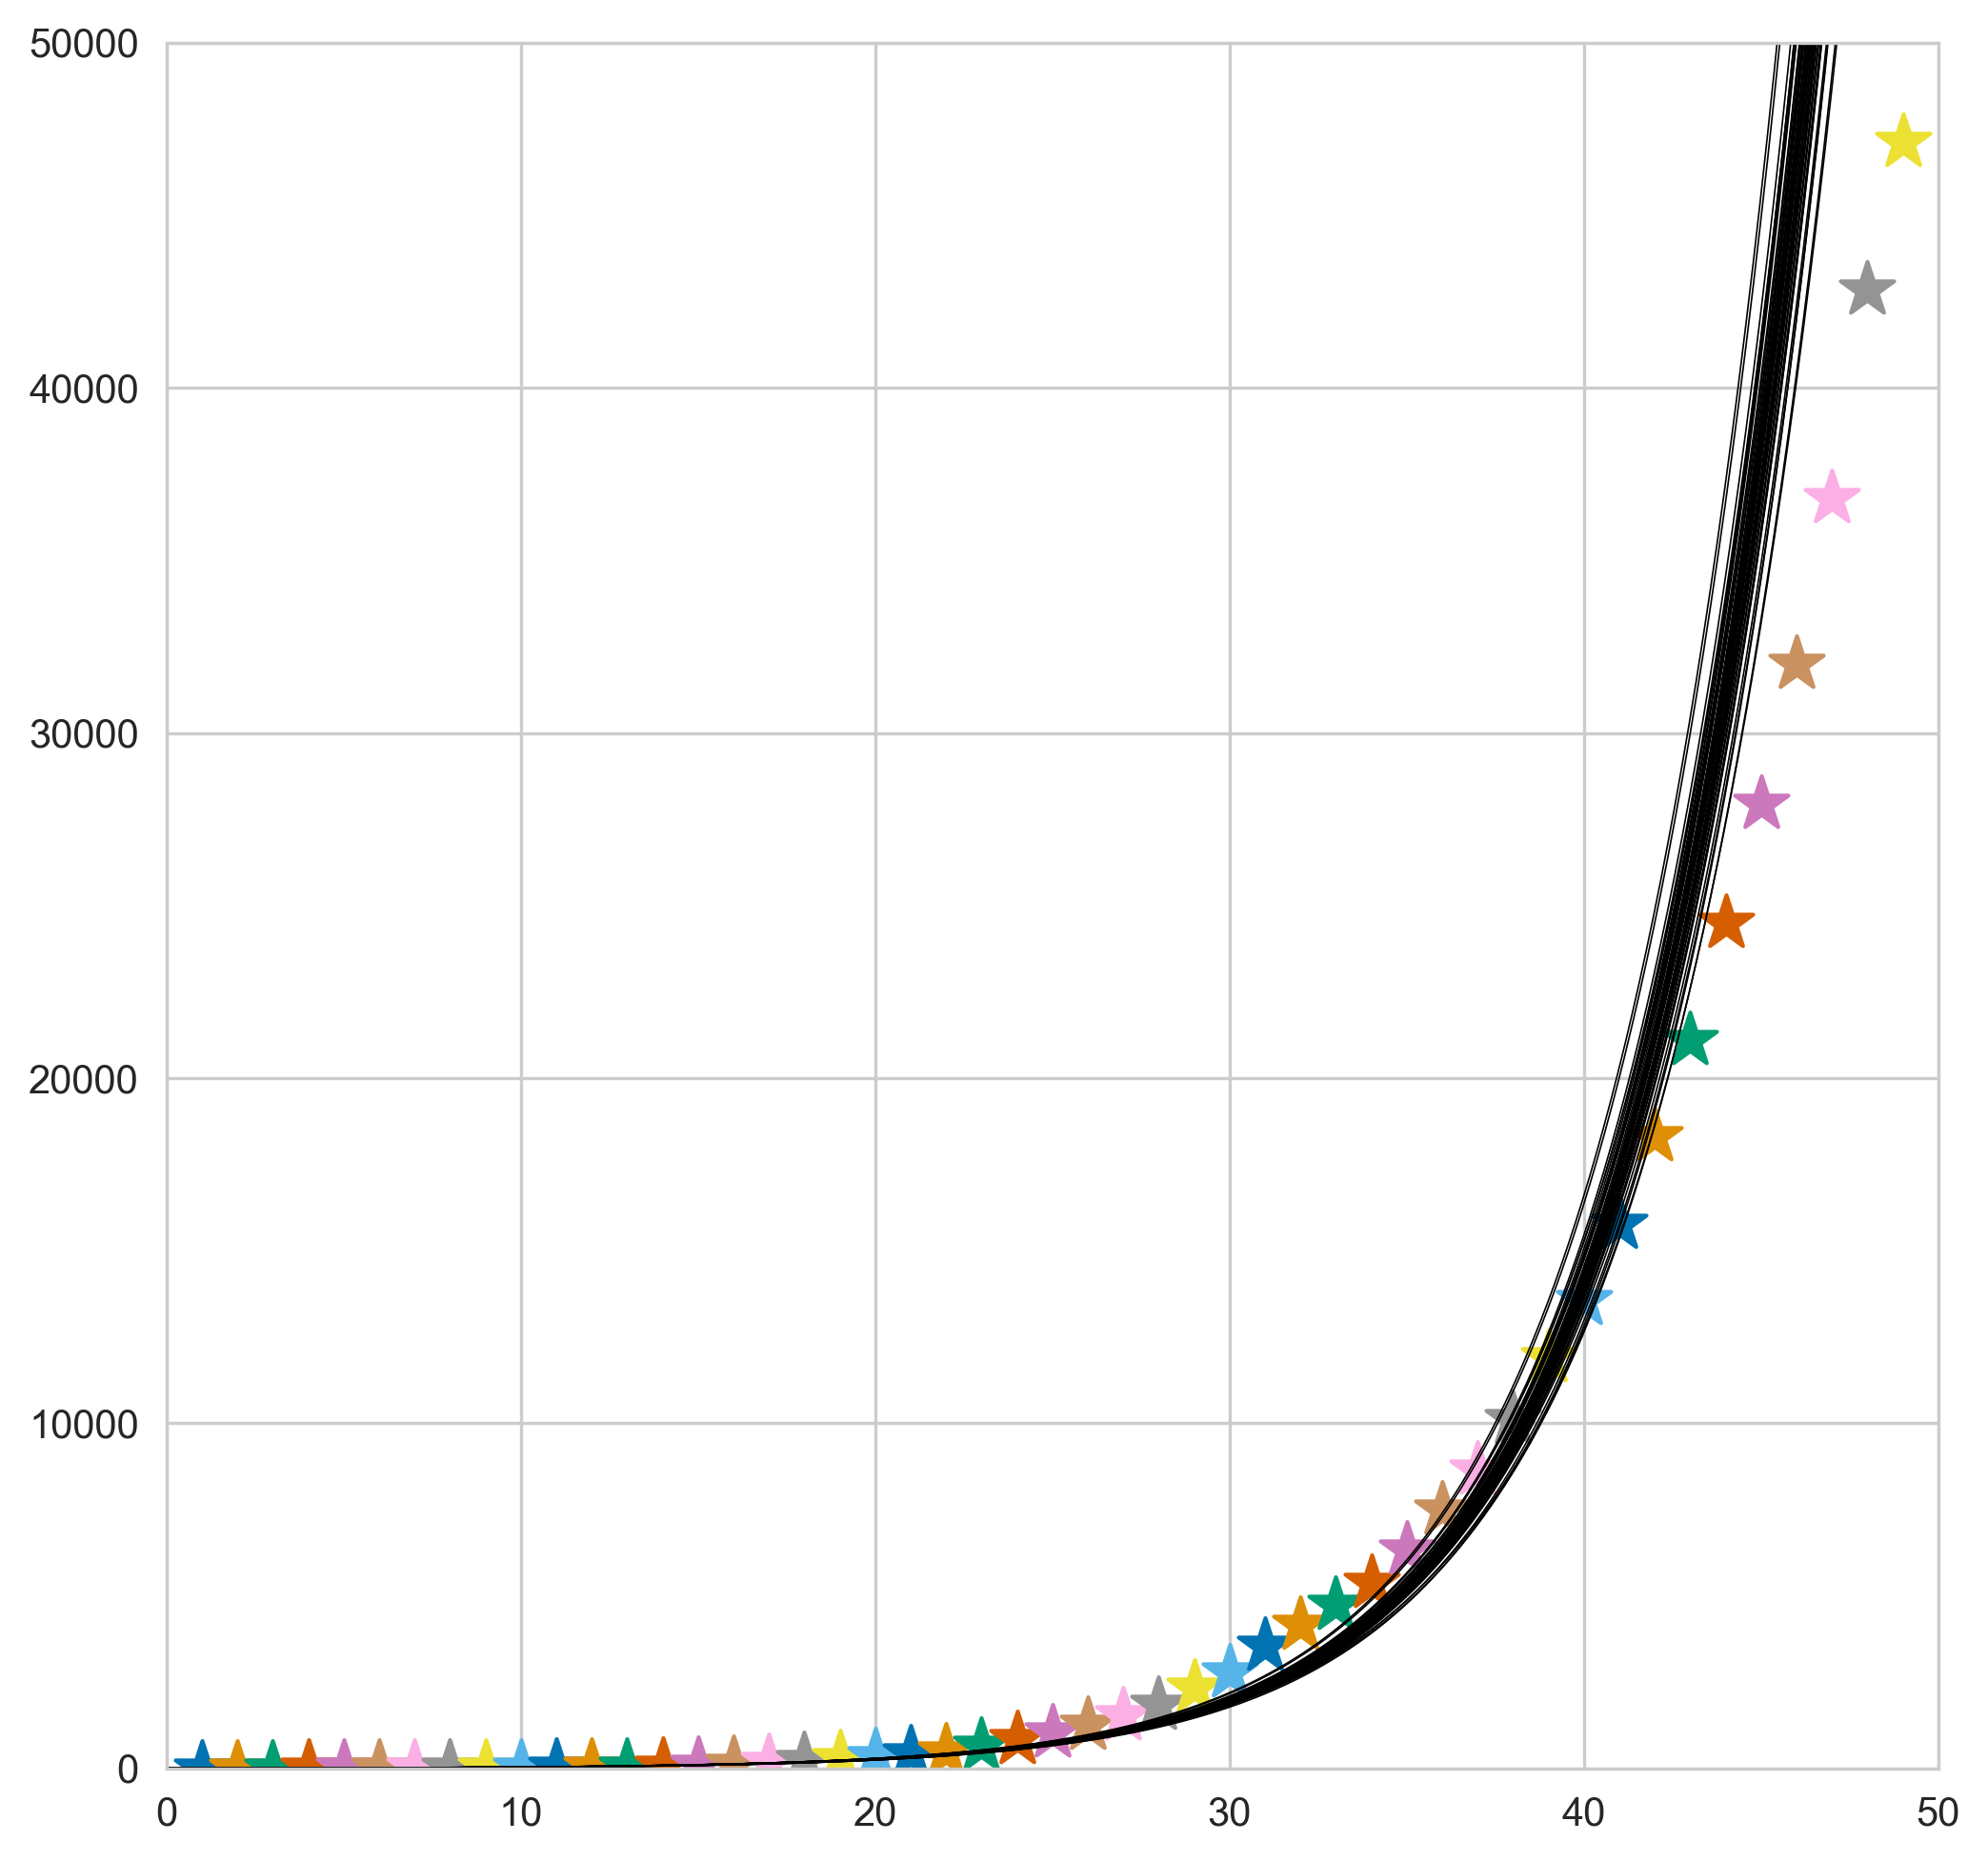

In [24]:

xs = np.linspace(0, 50, 250)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
#ax.set_xlim((xs[0], xs[-1]))
#ax.set_ylim((-1, 100))
myplot_sample_exp(xs, mu_, sigma_, 50, list(zip(range(1, 51), (filtred_df.total_cases))))

## Посэмплировал много разных экспонент, тут видно, что экспонента плохо приближает даже на обучающей выборке.

In [25]:
# Посэмплируем прямые и выдадим статистики по предсказаниям
def sample_statistics(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = w[0] + w[1]*xs
    return res


# Нарисуем результат
def plot_predictions(xs, mu, x, points=None):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    #ax.set_xlim((xs[0], xs[-1]))
    #ax.set_ylim((-1, 200))
    #ax.plot(xs, true_curve(xs), label="Правильный ответ")
    ax.plot(xs, mu[1]*xs + mu[0], color="red", label="MAP гипотеза")
    ax.fill_between(xs, mu[1]*xs + mu[0] - .25, mu[1]*xs + mu[0] + .25, color=palette[1], alpha=.3, label="+- дисперсия шума")
    ax.fill_between(xs, np.mean(x, axis=0) - np.std(x, axis=0), np.mean(x, axis=0) + np.std(x, axis=0), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    if points != None:
        ax.scatter(points[0], points[1], marker='*', s=200)
    ax.legend(fontsize=legend_fontsize)
    

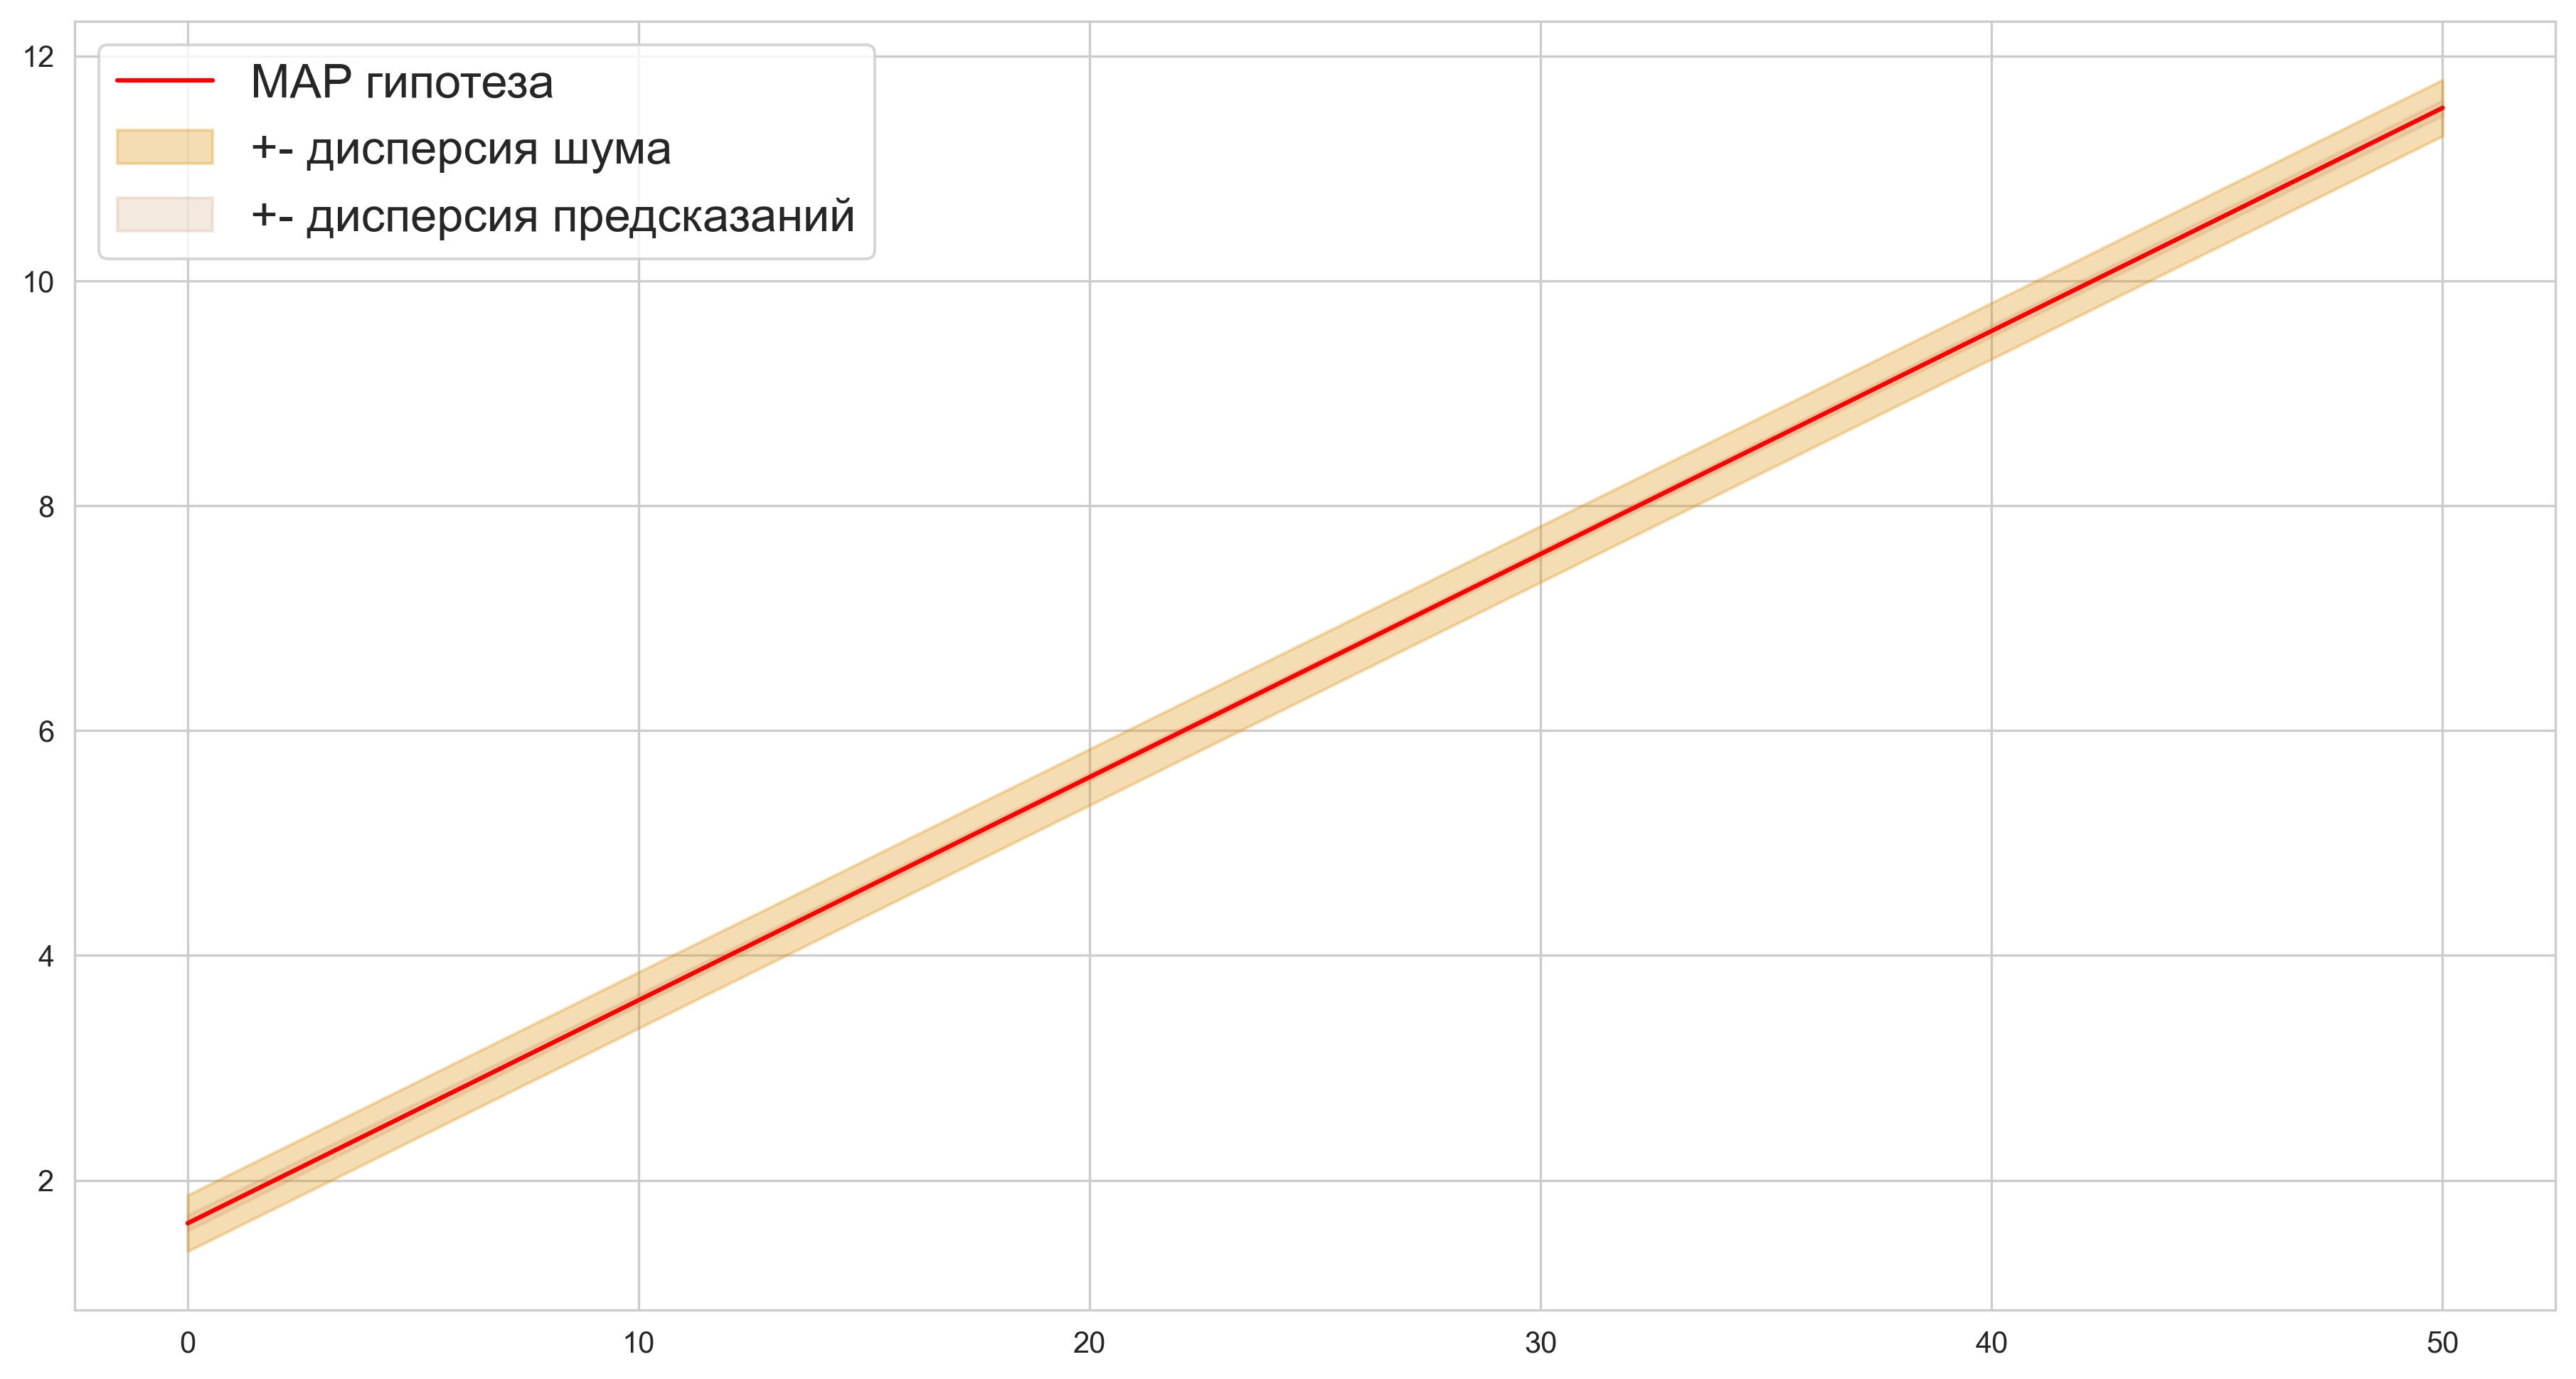

In [26]:
x = sample_statistics(mu_, sigma_, xs, n=1000)
plot_predictions(xs, mu_, x)

In [27]:
# Нарисуем результат
def plot_predictions_exp(xs, mu, x, points=None):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    #ax.set_xlim((xs[0], xs[-1]))
    #ax.set_ylim((-1, 200))
    #ax.plot(xs, true_curve(xs), label="Правильный ответ")
    ax.plot(xs, np.exp(mu[1]*xs + mu[0]), color="red", label="MAP гипотеза")
    ax.fill_between(xs, np.exp(mu[1]*xs + mu[0] - .25), np.exp(mu[1]*xs + mu[0] + .25), color=palette[1], alpha=.3, label="+- дисперсия шума")
    ax.fill_between(xs, np.exp(np.mean(x, axis=0) - np.std(x, axis=0)), np.exp(np.mean(x, axis=0) + np.std(x, axis=0)), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    label_points = ["всего случаяв 1-го мая", "всего случаяв 1-го июня", "Всего случаяв 1-го сентября"]
    if points != None:
        for x, cur_label in zip(points, label_points):
            print(f"{cur_label} равно {np.exp(mu[1]*x + mu[0])}")
            ax.scatter(x, np.exp(mu[1]*x + mu[0]), marker='*', s=200, label=cur_label)
    ax.legend(fontsize=legend_fontsize)

In [28]:
may_one = date(2020, 5, 1)
june_one = date(2020, 6, 1)
sept_one = date(2020, 9, 1)
begin_date = date(2020, 3, 3)

In [29]:
days_to_may = (may_one - begin_date).days
days_to_june = (june_one - begin_date).days
days_to_sept = (sept_one - begin_date).days

In [30]:
points = [days_to_may, days_to_june, days_to_sept]

всего случаяв 1-го мая равно 612146.9335977214
всего случаяв 1-го июня равно 287164780.6580896
Всего случаяв 1-го сентября равно 2.4310141500773896e+16


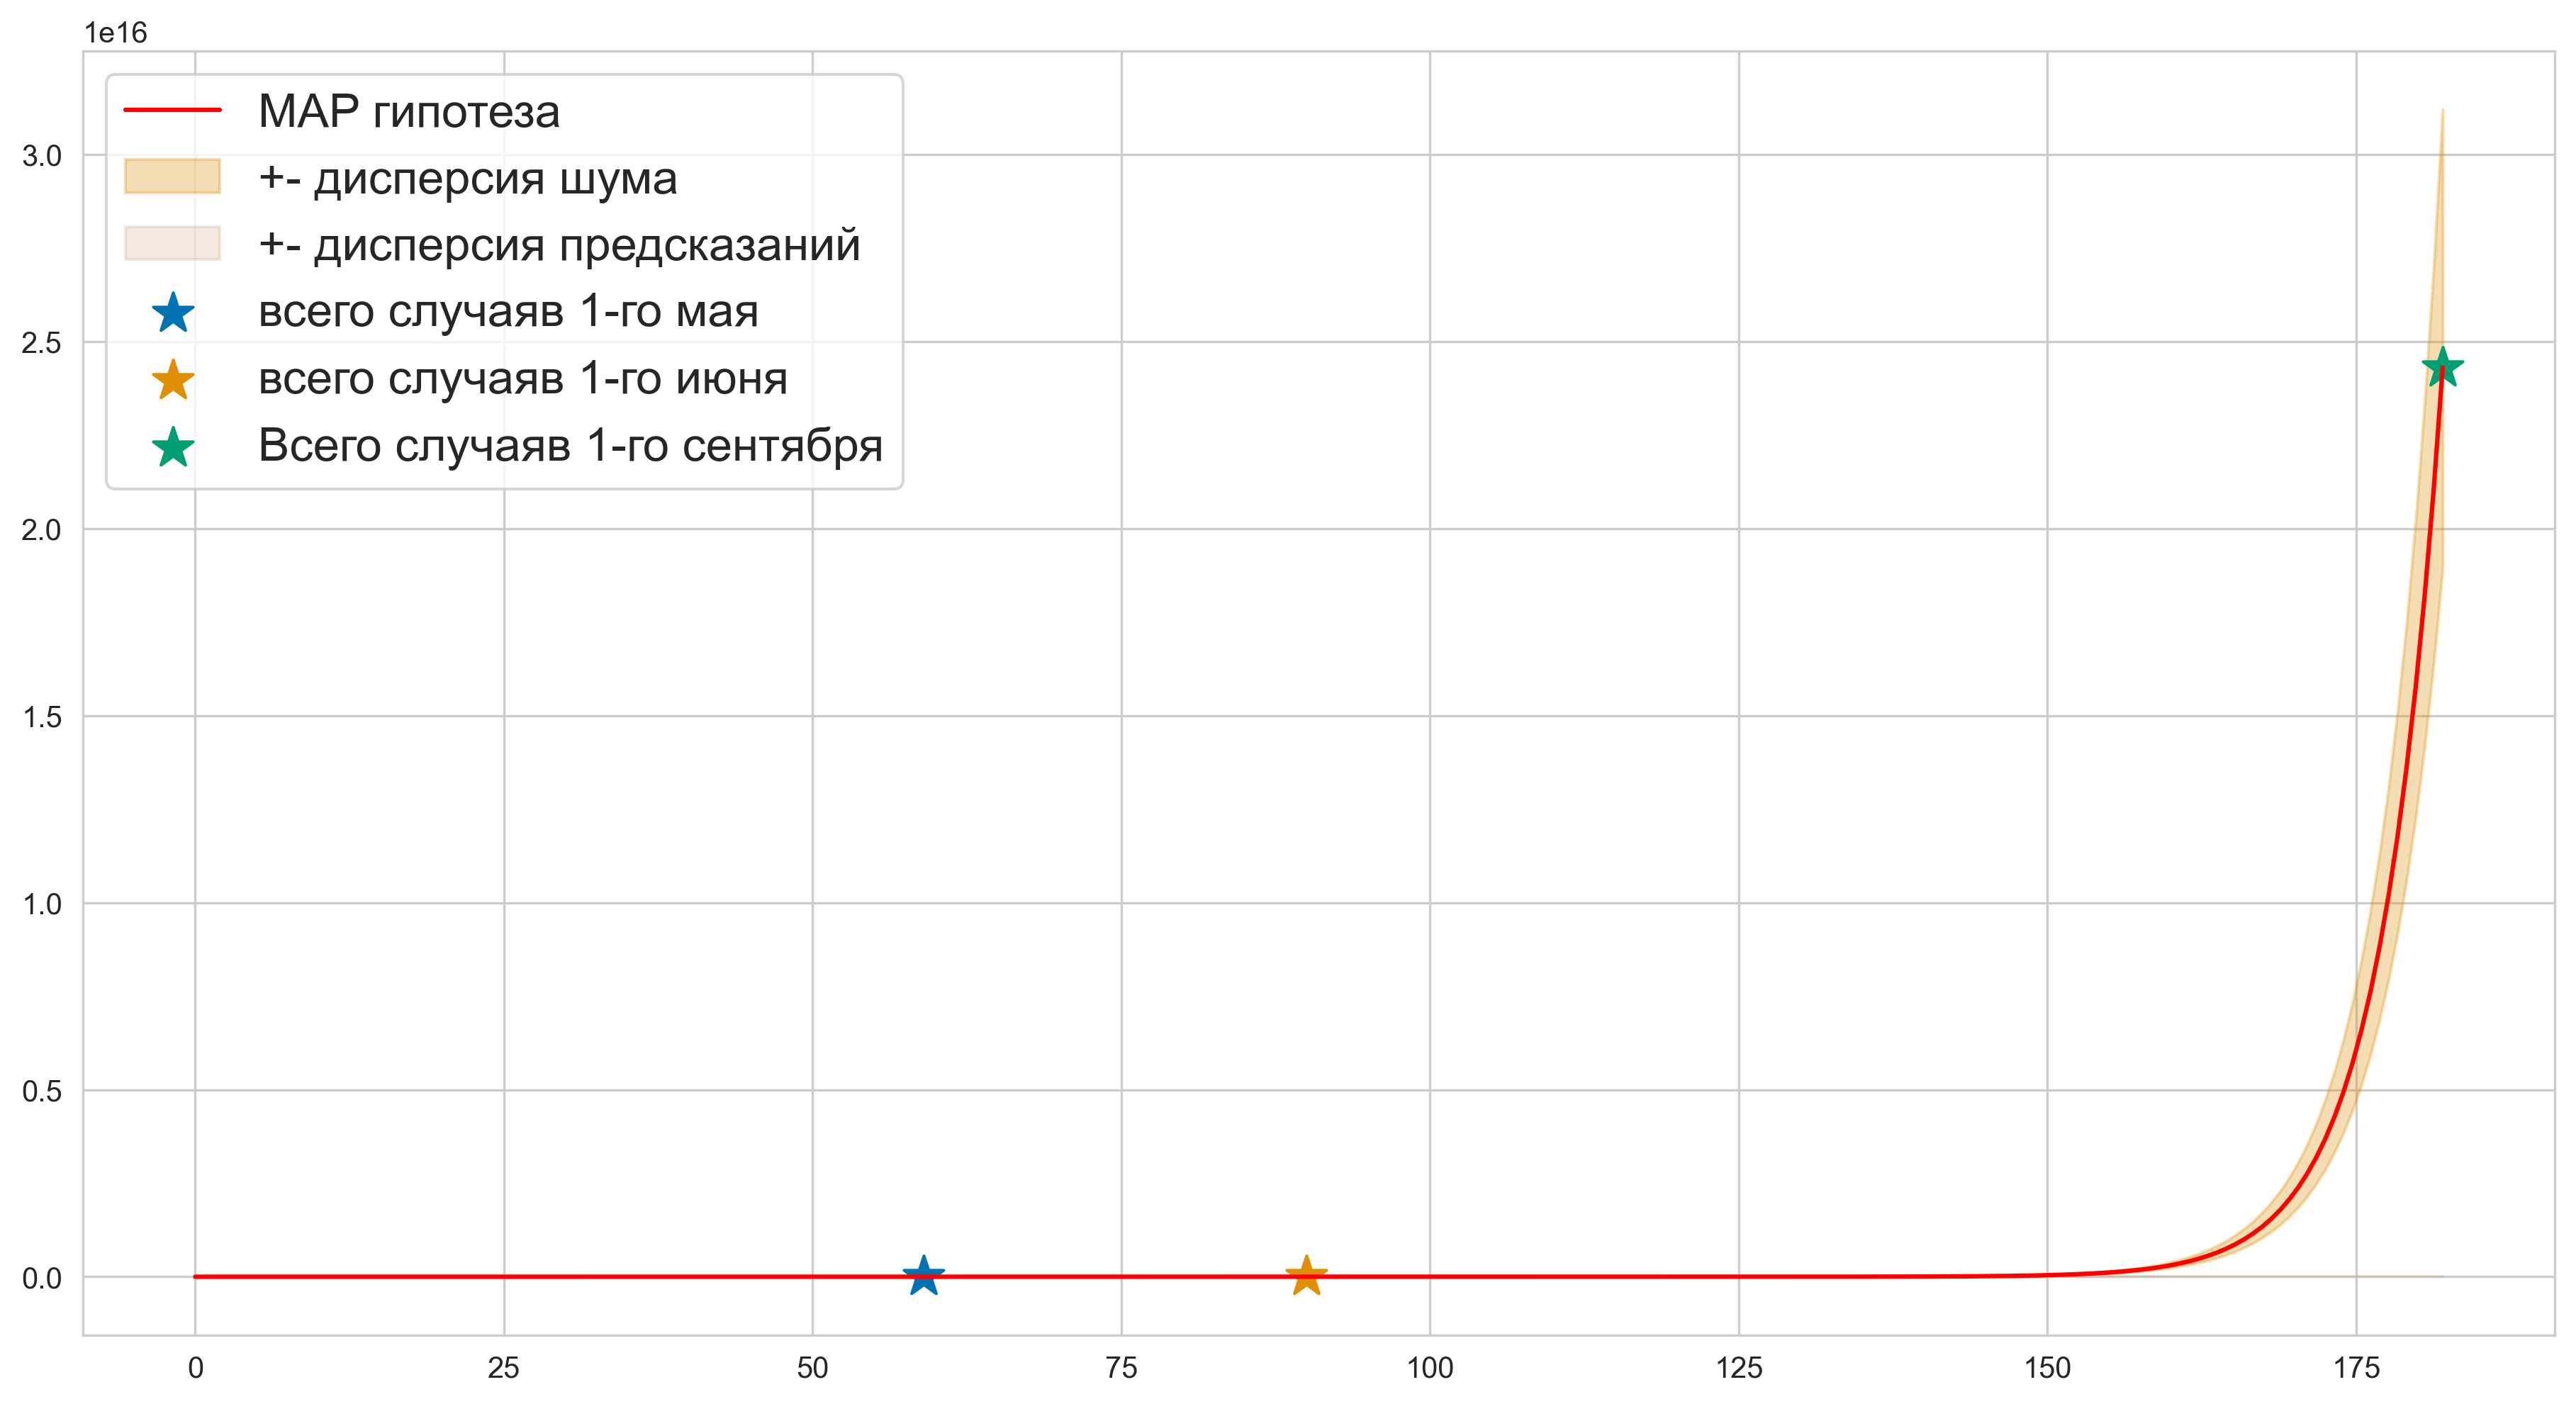

In [31]:
xs = np.linspace(0, days_to_sept, 250)
plot_predictions_exp(xs, mu_, x, points)

## Согласно данной модели, к первому сентября будет больных больше чем население земли.

In [32]:
count_new_case_to_may = np.exp(lr_all_cases.predict(np.array(days_to_may).reshape(-1, 1)))[0]
count_new_case_to_june = np.exp(lr_all_cases.predict(np.array(days_to_june).reshape(-1, 1)))[0]
count_new_case_to_sept = np.exp(lr_all_cases.predict(np.array(days_to_sept).reshape(-1, 1)))[0]
print(f"Количество новых случаев к 1 мая {int(count_new_case_to_may)}\nКоличество новых случаев к 1 июня {int(count_new_case_to_june)}\nКоличество новых случаев к 1 сентября {int(count_new_case_to_sept)}")

Количество новых случаев к 1 мая 610241
Количество новых случаев к 1 июня 285179209
Количество новых случаев к 1 сентября 23869843564136608


/Users/simba9/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/simba9/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/simba9/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Третья часть

In [226]:
df_all_rus = df[df.date >= BEGIN_DATE][df.iso_code == 'RUS' ]

<ipython-input-226-f7b1372f3aaa>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_rus = df[df.date >= BEGIN_DATE][df.iso_code == 'RUS' ]


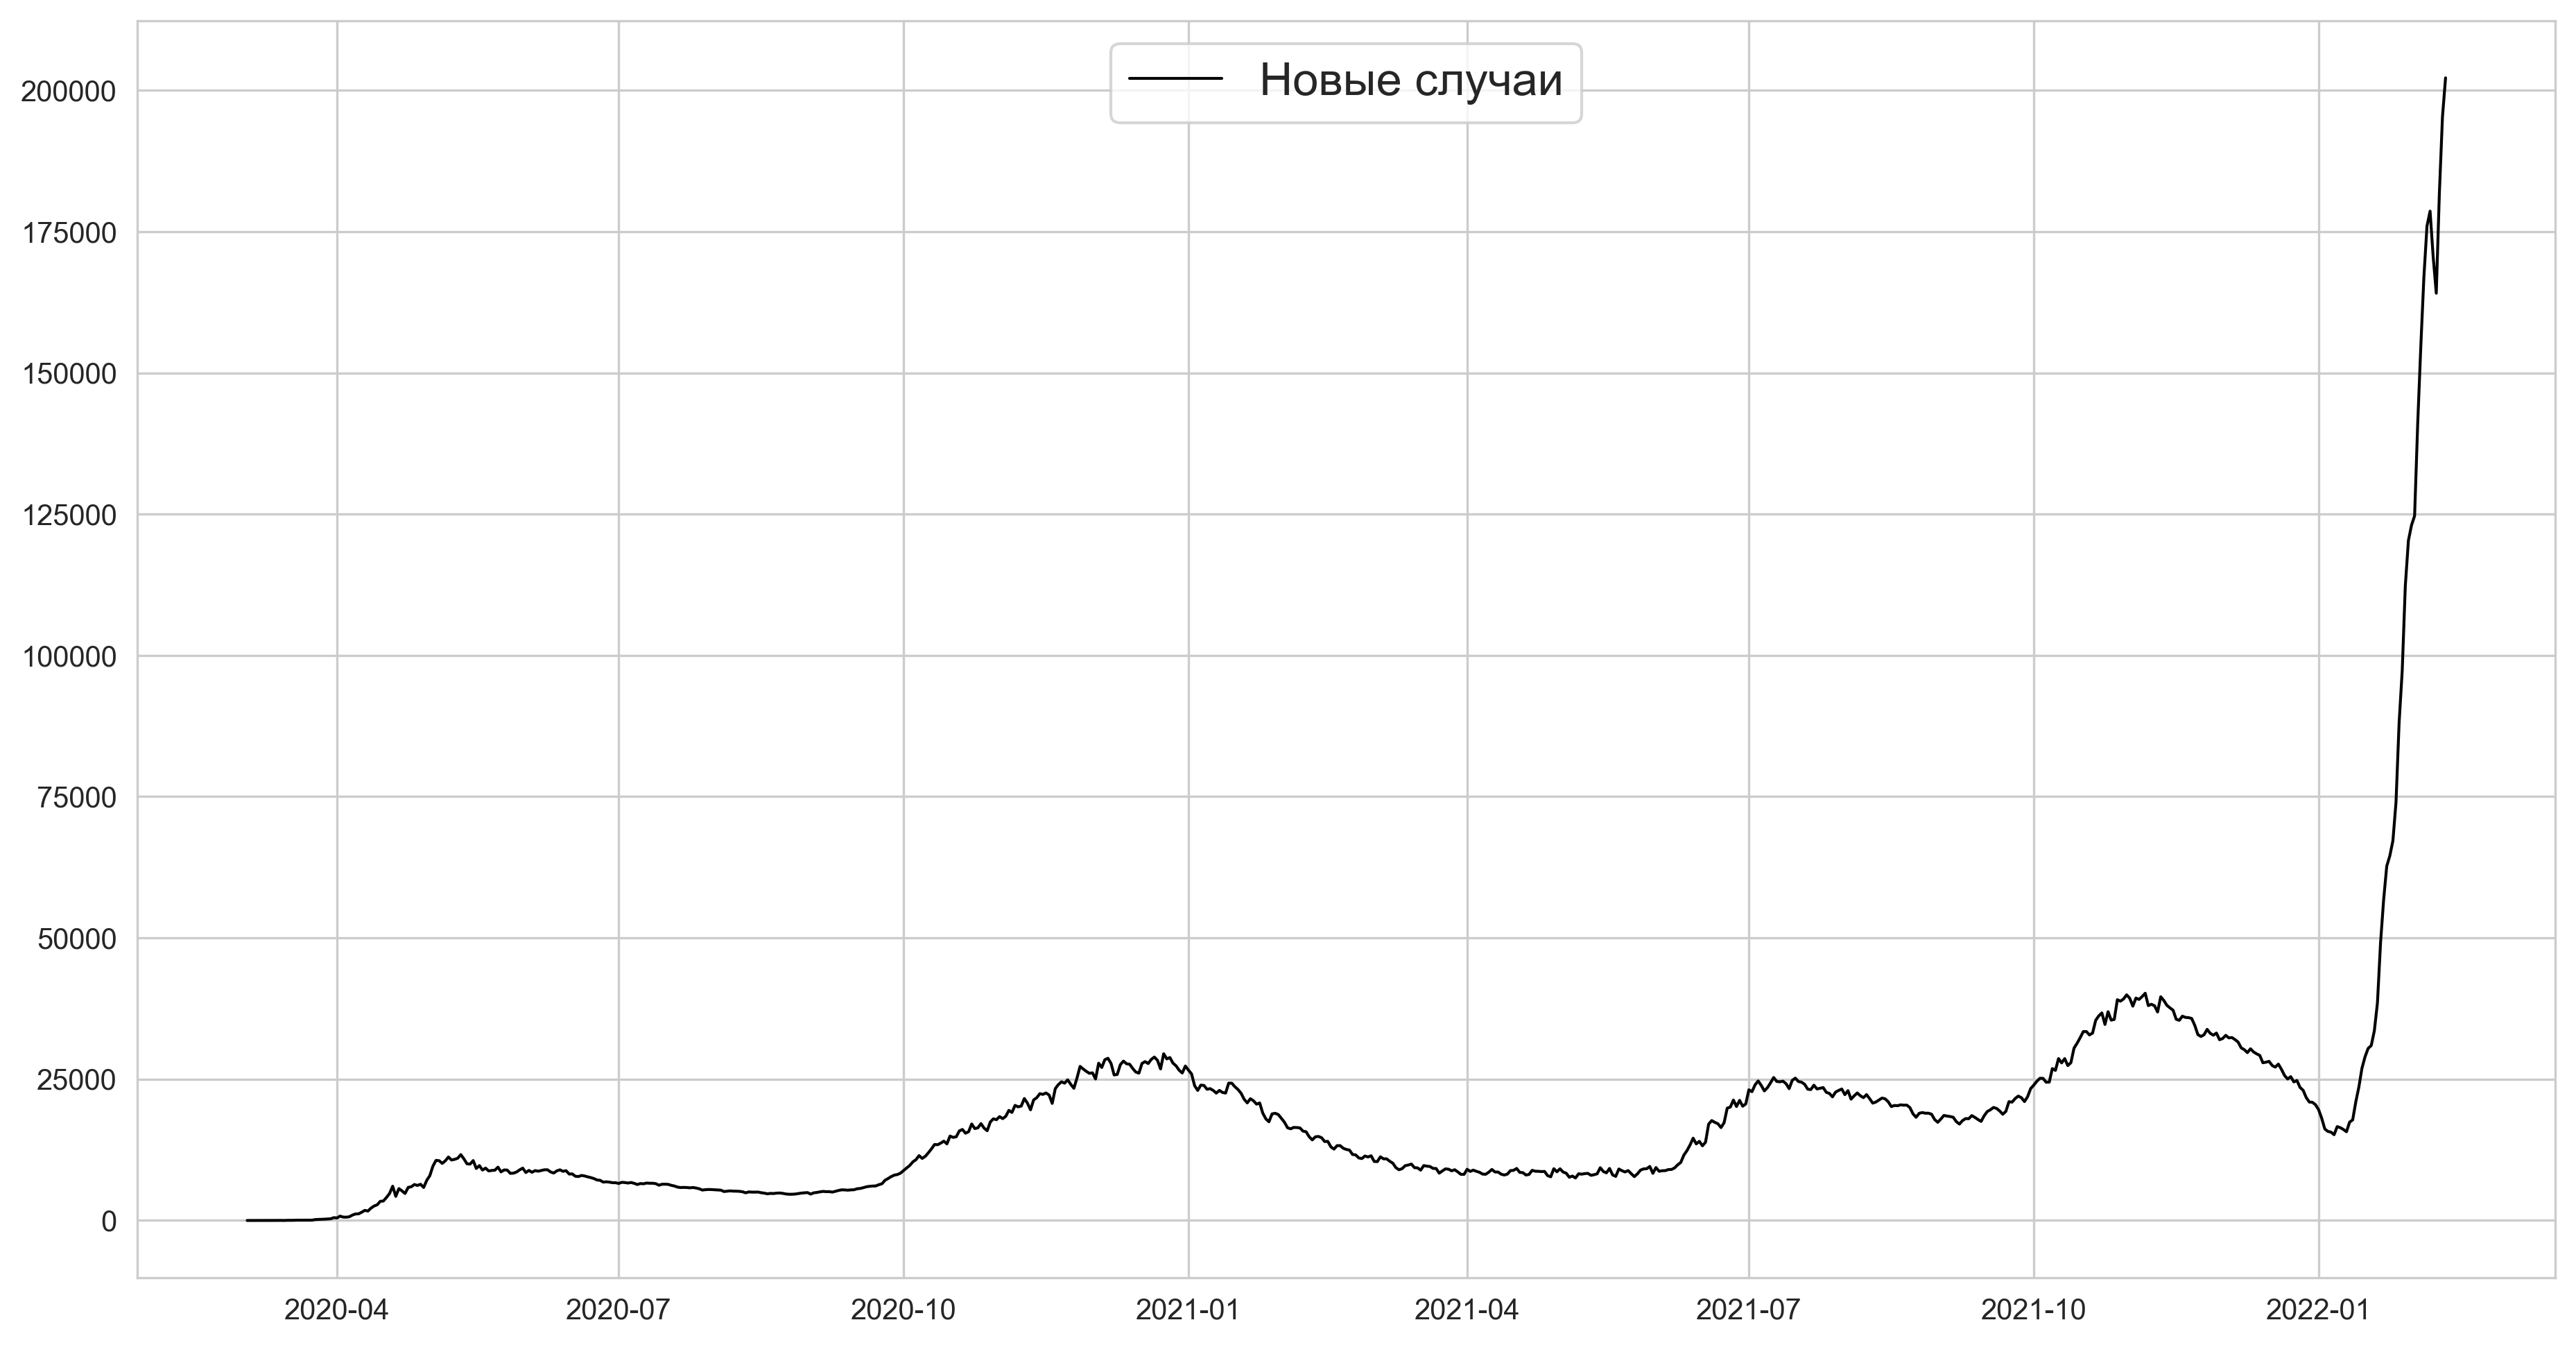

In [227]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(df_all_rus.date, df_all_rus.new_cases, linewidth=1, label="Новые случаи", color="black")

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

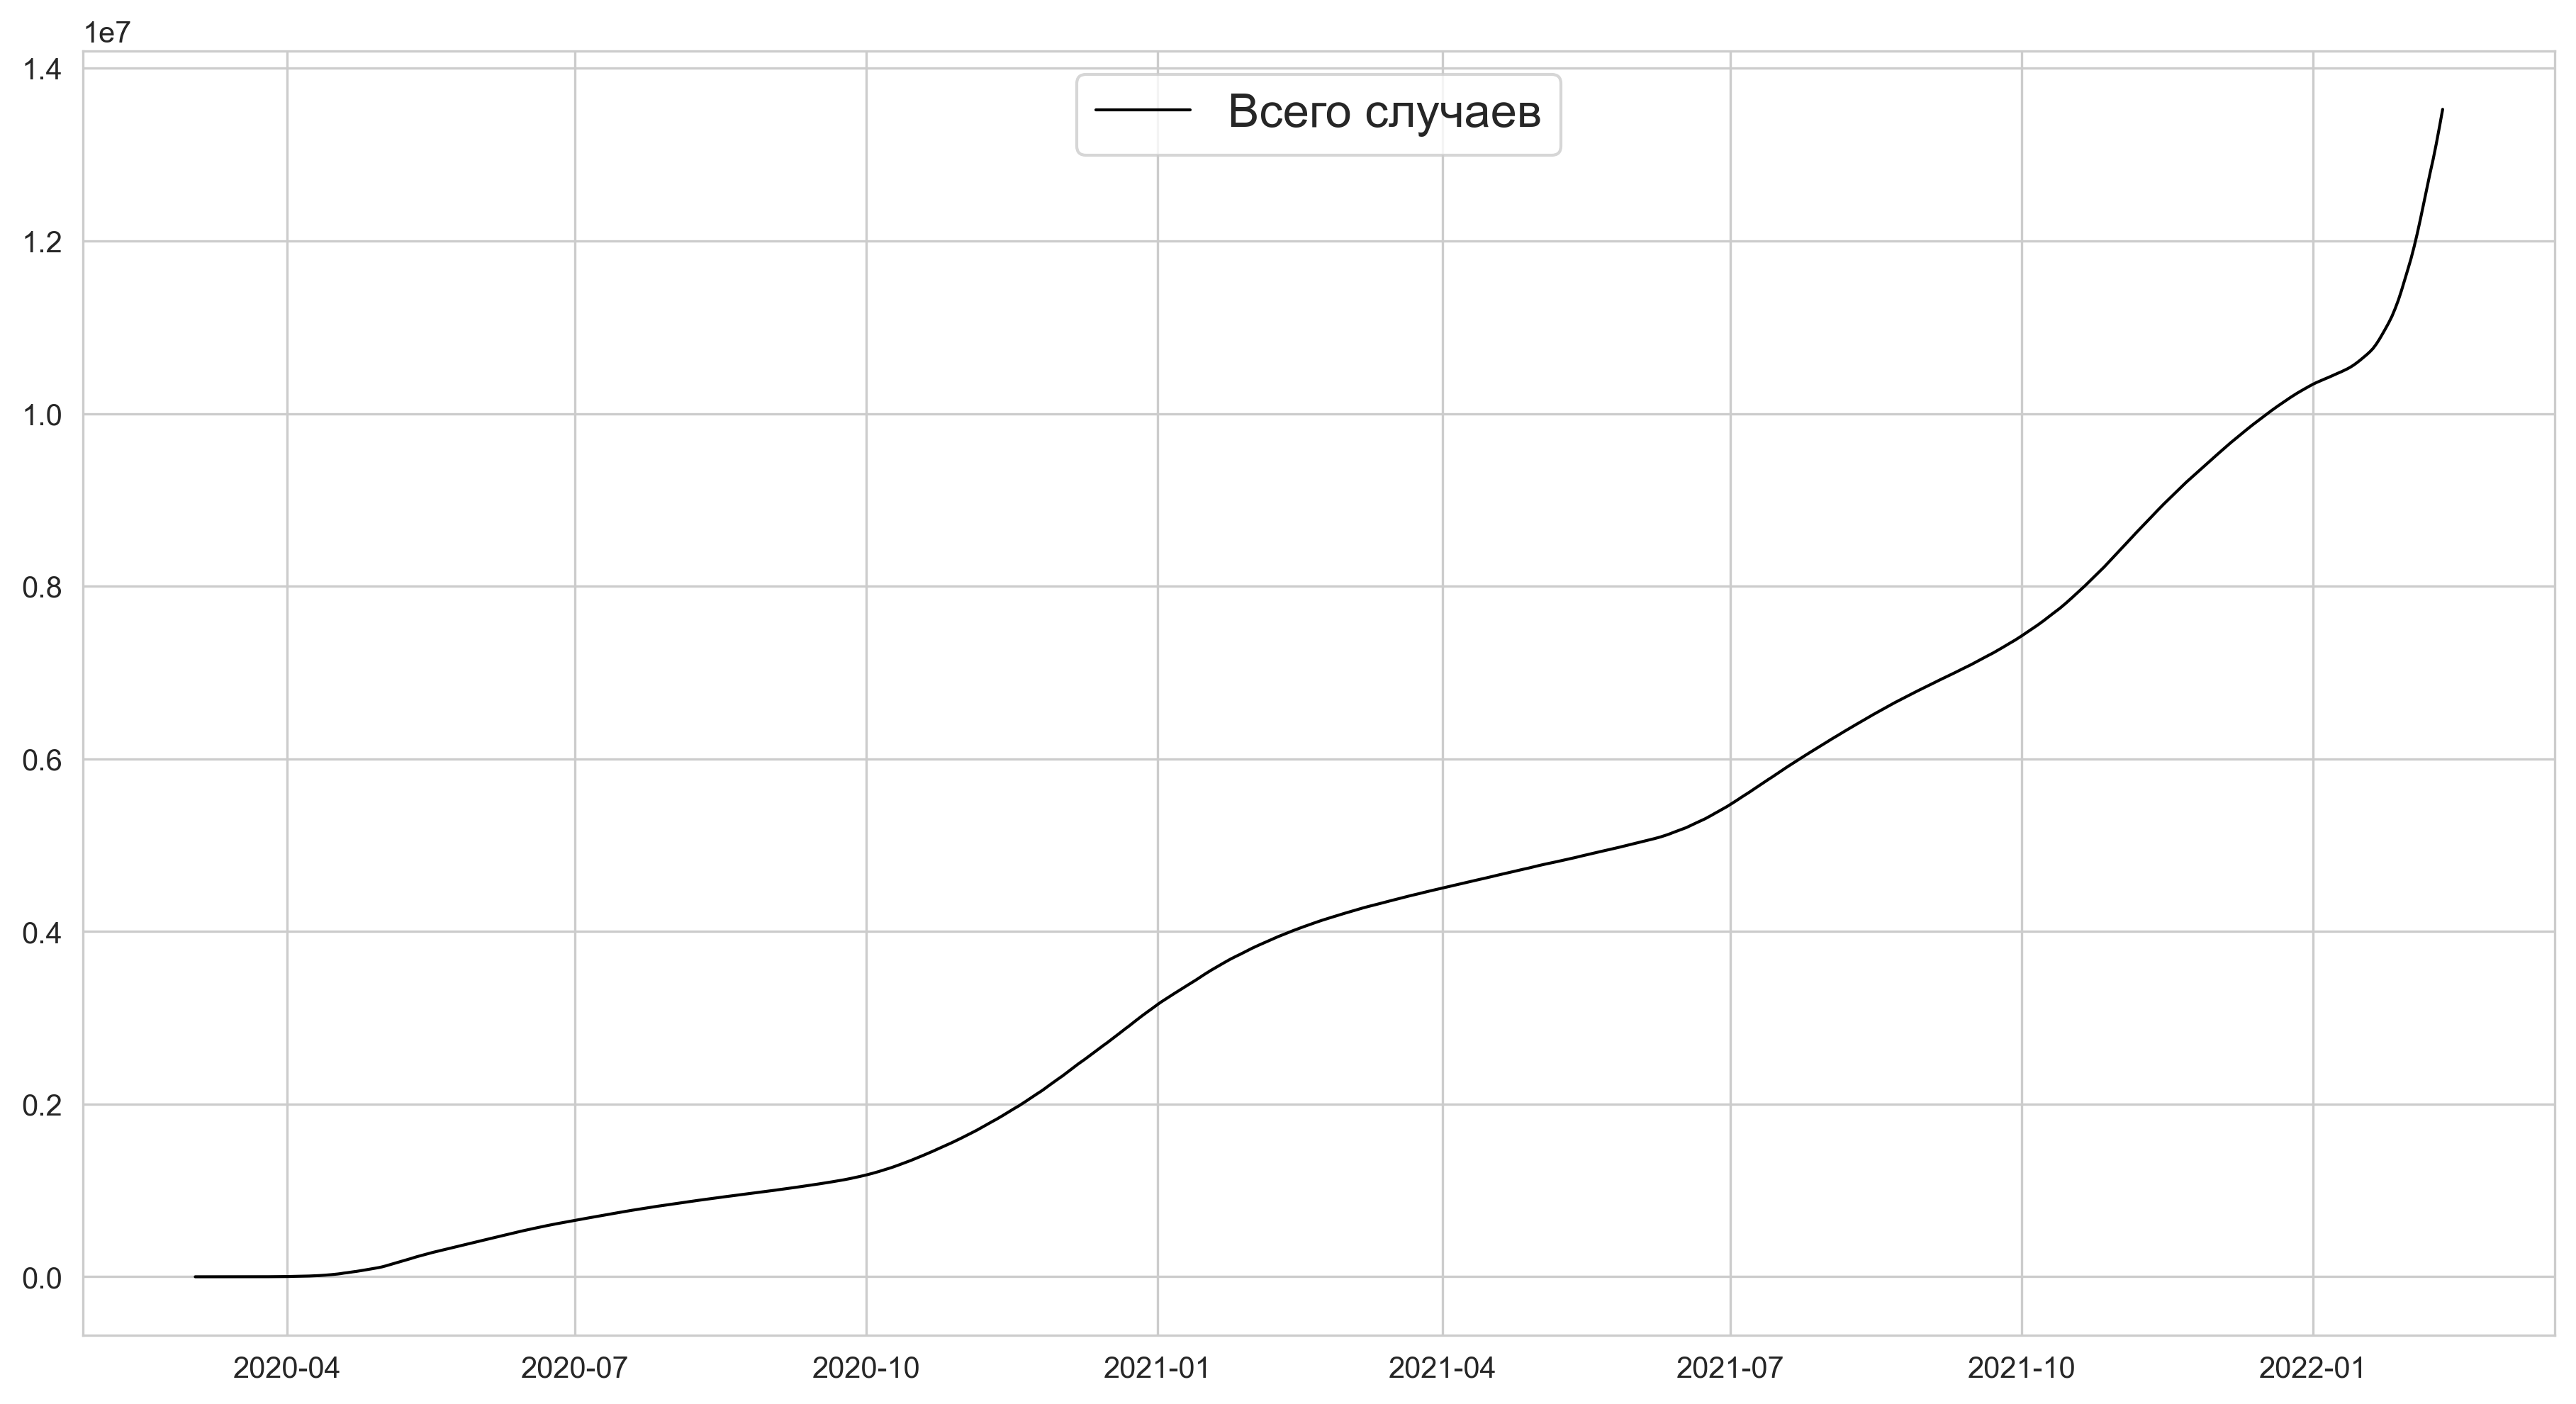

In [228]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(df_all_rus.date, df_all_rus.total_cases, linewidth=1, label="Всего случаев", color="black")

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

## Для того чтобы обучить сигмоидальную функцию предложенную в работе Murray воспользуемся следующей идей, new_cases это есть производная от total_cases (по определению, преращение функции к приращению аргумента) тогда:

$$\begin{aligned}
\Phi(x) = \frac{1}{\sqrt{2\pi}}\int_{-\inf}^x e^{-\frac{t^2}{2}}\, dx = A  \int_{-\inf}^x e^{ax_2^2 + bx_1 + cx_0 }\, dx\\
{\Phi(x)}^{'} = e^{ax_2^2 + bx_1 + cx_0 }\\
new\_cases= e^{ax_2^2 + bx_1 + cx_0 }\\
ln(new\_cases)= ax_2^2 + bx_1 + cx_0 \\
total\_cases = \Phi(x) = \sum_{i=1}^{current\_day} e^{ax_2^2 + bx_1 + cx_0 }
\end{aligned}$$

In [230]:
data = { 
    'bias': np.ones(len(filtred_df.new_cases)),
    'x': np.arange(1, len(filtred_df.new_cases) + 1),
    'x_2': np.power(np.arange(1, len(filtred_df.new_cases) + 1), 2),
}
train = pd.DataFrame.from_dict(data)

In [231]:
lr_diraved = LinearRegression(fit_intercept=True)
lr_diraved.fit(train, np.log(filtred_df.new_cases).replace(-np.inf, 0))

LinearRegression()

In [232]:
print(lr_diraved.coef_)

[ 0.          0.27928241 -0.00182979]


In [233]:
y_pred = lr_diraved.predict(train)
y_pred = np.exp(y_pred)
y_pred = y_pred.cumsum()

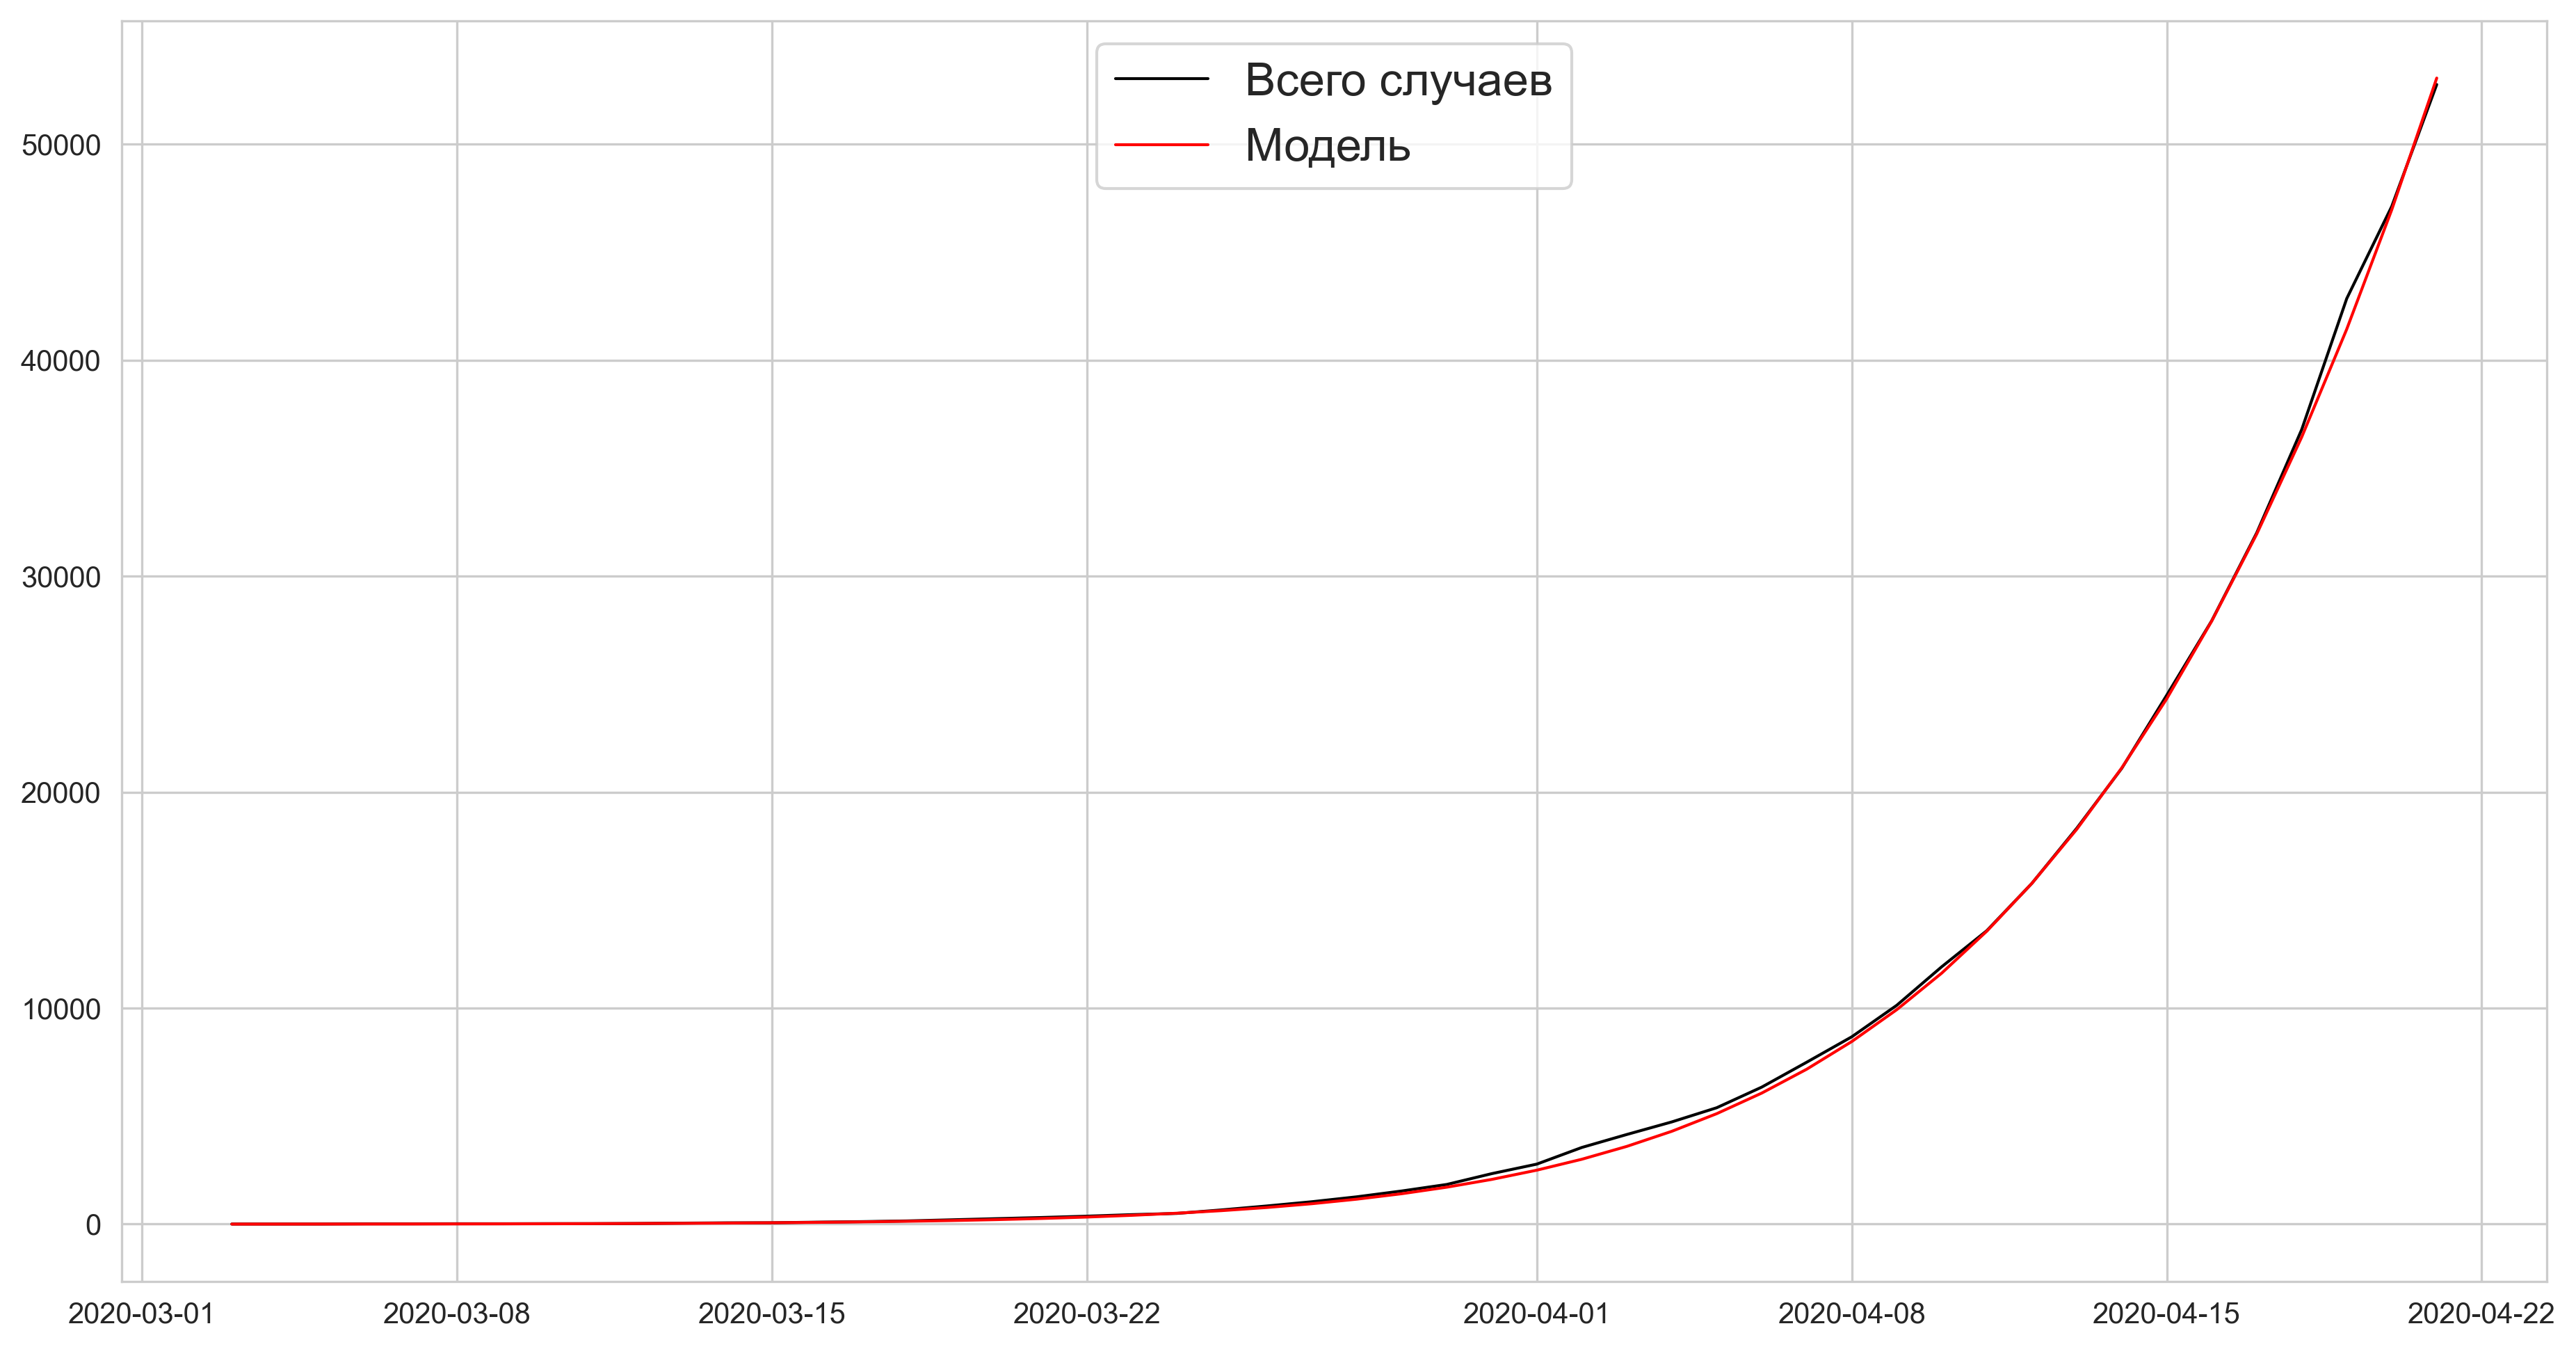

In [234]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(filtred_df.date, filtred_df.total_cases, linewidth=1, label="Всего случаев", color="black")
ax.plot(filtred_df.date, y_pred, linewidth=1, label="Модель", color="red")

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

## сигмоидальная функция досточно точно описывает обучающие данные

In [235]:
data_for_test = { 
    'bias': np.ones(len(df_all_rus)),
    'x': np.arange(len(df_all_rus)),
    'x_2': np.power(np.arange(1, len(df_all_rus) + 1), 2),
}
test = pd.DataFrame.from_dict(data_for_test)

In [236]:
y_pred_test = lr_diraved.predict(test)
y_pred_test = np.exp(y_pred_test)
y_pred_test = y_pred_test.cumsum()

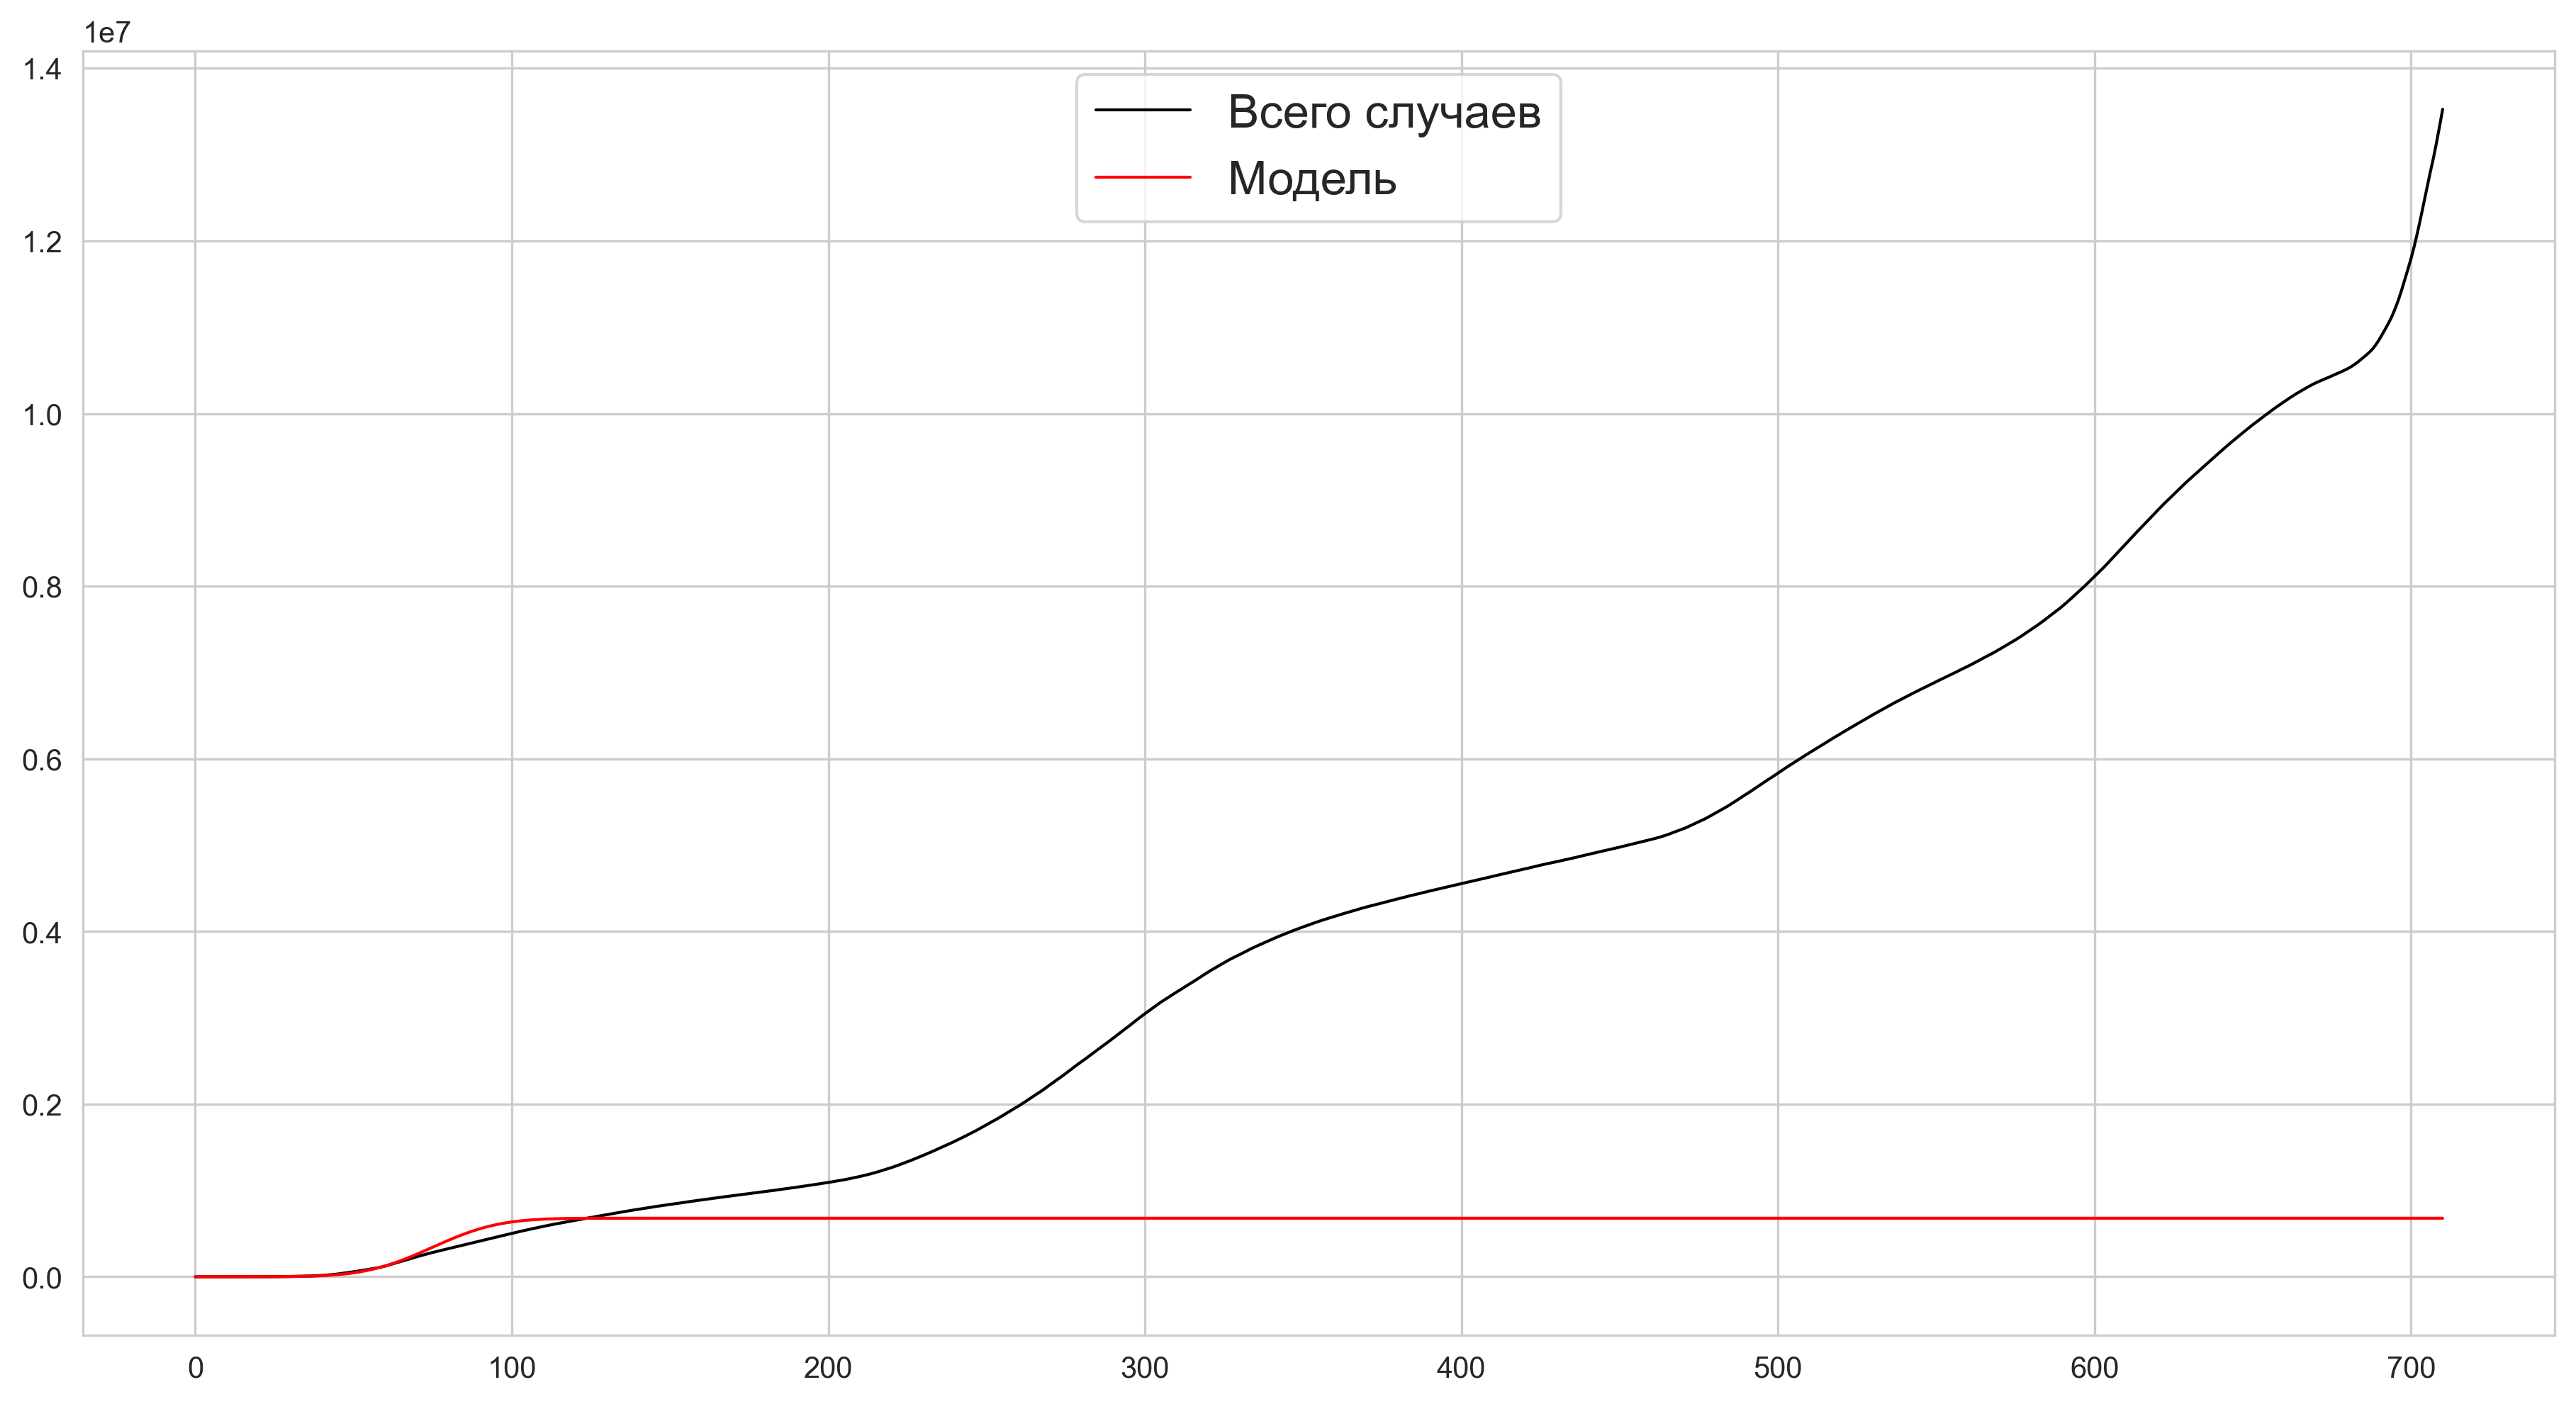

In [237]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(range(len(df_all_rus)), df_all_rus.total_cases, linewidth=1, label="Всего случаев", color="black")
ax.plot(range(len(df_all_rus)), y_pred_test, linewidth=1, label="Модель", color="red")

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

## но для реальности она не годится(

## Найдём  апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. 

In [238]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([x])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [239]:
cur_mu, cur_sigma = np.array([0, 0, 0]), 2*np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
py_collection = np.log(filtred_df.new_cases).replace(-np.inf, 0)
px_collection = train.to_numpy()
for px, py in zip(px_collection, py_collection):
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)
sigma_update_, mu_update_ = cur_sigma, cur_mu
print(f"sigma is {sigma_update_},\n E is {mu_update_}")


sigma is [[ 1.21258220e-02 -9.60293055e-04  1.58463276e-05]
 [-9.60293055e-04  9.93571101e-05 -1.83193136e-06]
 [ 1.58463276e-05 -1.83193136e-06  3.59441095e-08]],
 E is [-0.66982225  0.2789449  -0.00182419]


In [240]:
cur_mu, cur_sigma = np.array([0, 0, 0]), 2*np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y = np.log(filtred_df.new_cases).replace(-np.inf, 0)
X = train.to_numpy()


sigma_noise = 0.25
sigma_ = np.linalg.inv(np.linalg.inv(cur_sigma) + np.dot(X.T, X) / (sigma_noise ** 2))
mu_ = np.dot(sigma_, ( np.dot(np.linalg.inv(cur_sigma), cur_mu) + np.dot(X.T, y) / (sigma_noise ** 2) ) )

print(f"sigma is {sigma_},\n E is {mu_}")


sigma is [[ 1.21258220e-02 -9.60293055e-04  1.58463276e-05]
 [-9.60293055e-04  9.93571101e-05 -1.83193136e-06]
 [ 1.58463276e-05 -1.83193136e-06  3.59441095e-08]],
 E is [-0.66982225  0.2789449  -0.00182419]


In [247]:

def myplot_sample_sigmoid(xs, mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        predict = np.exp(w[0]*xs.bias + w[1]*xs.x + w[2]*xs.x_2).cumsum()
        plt.plot(range(len(xs)), predict, 'k-', lw=.4)
    #plt.ylim((0, 20000000))
    #plt.xlim((0, 50))
    if not points is None:
        for x, y in points:
            plt.scatter(x, y, marker='*', s=200)
      

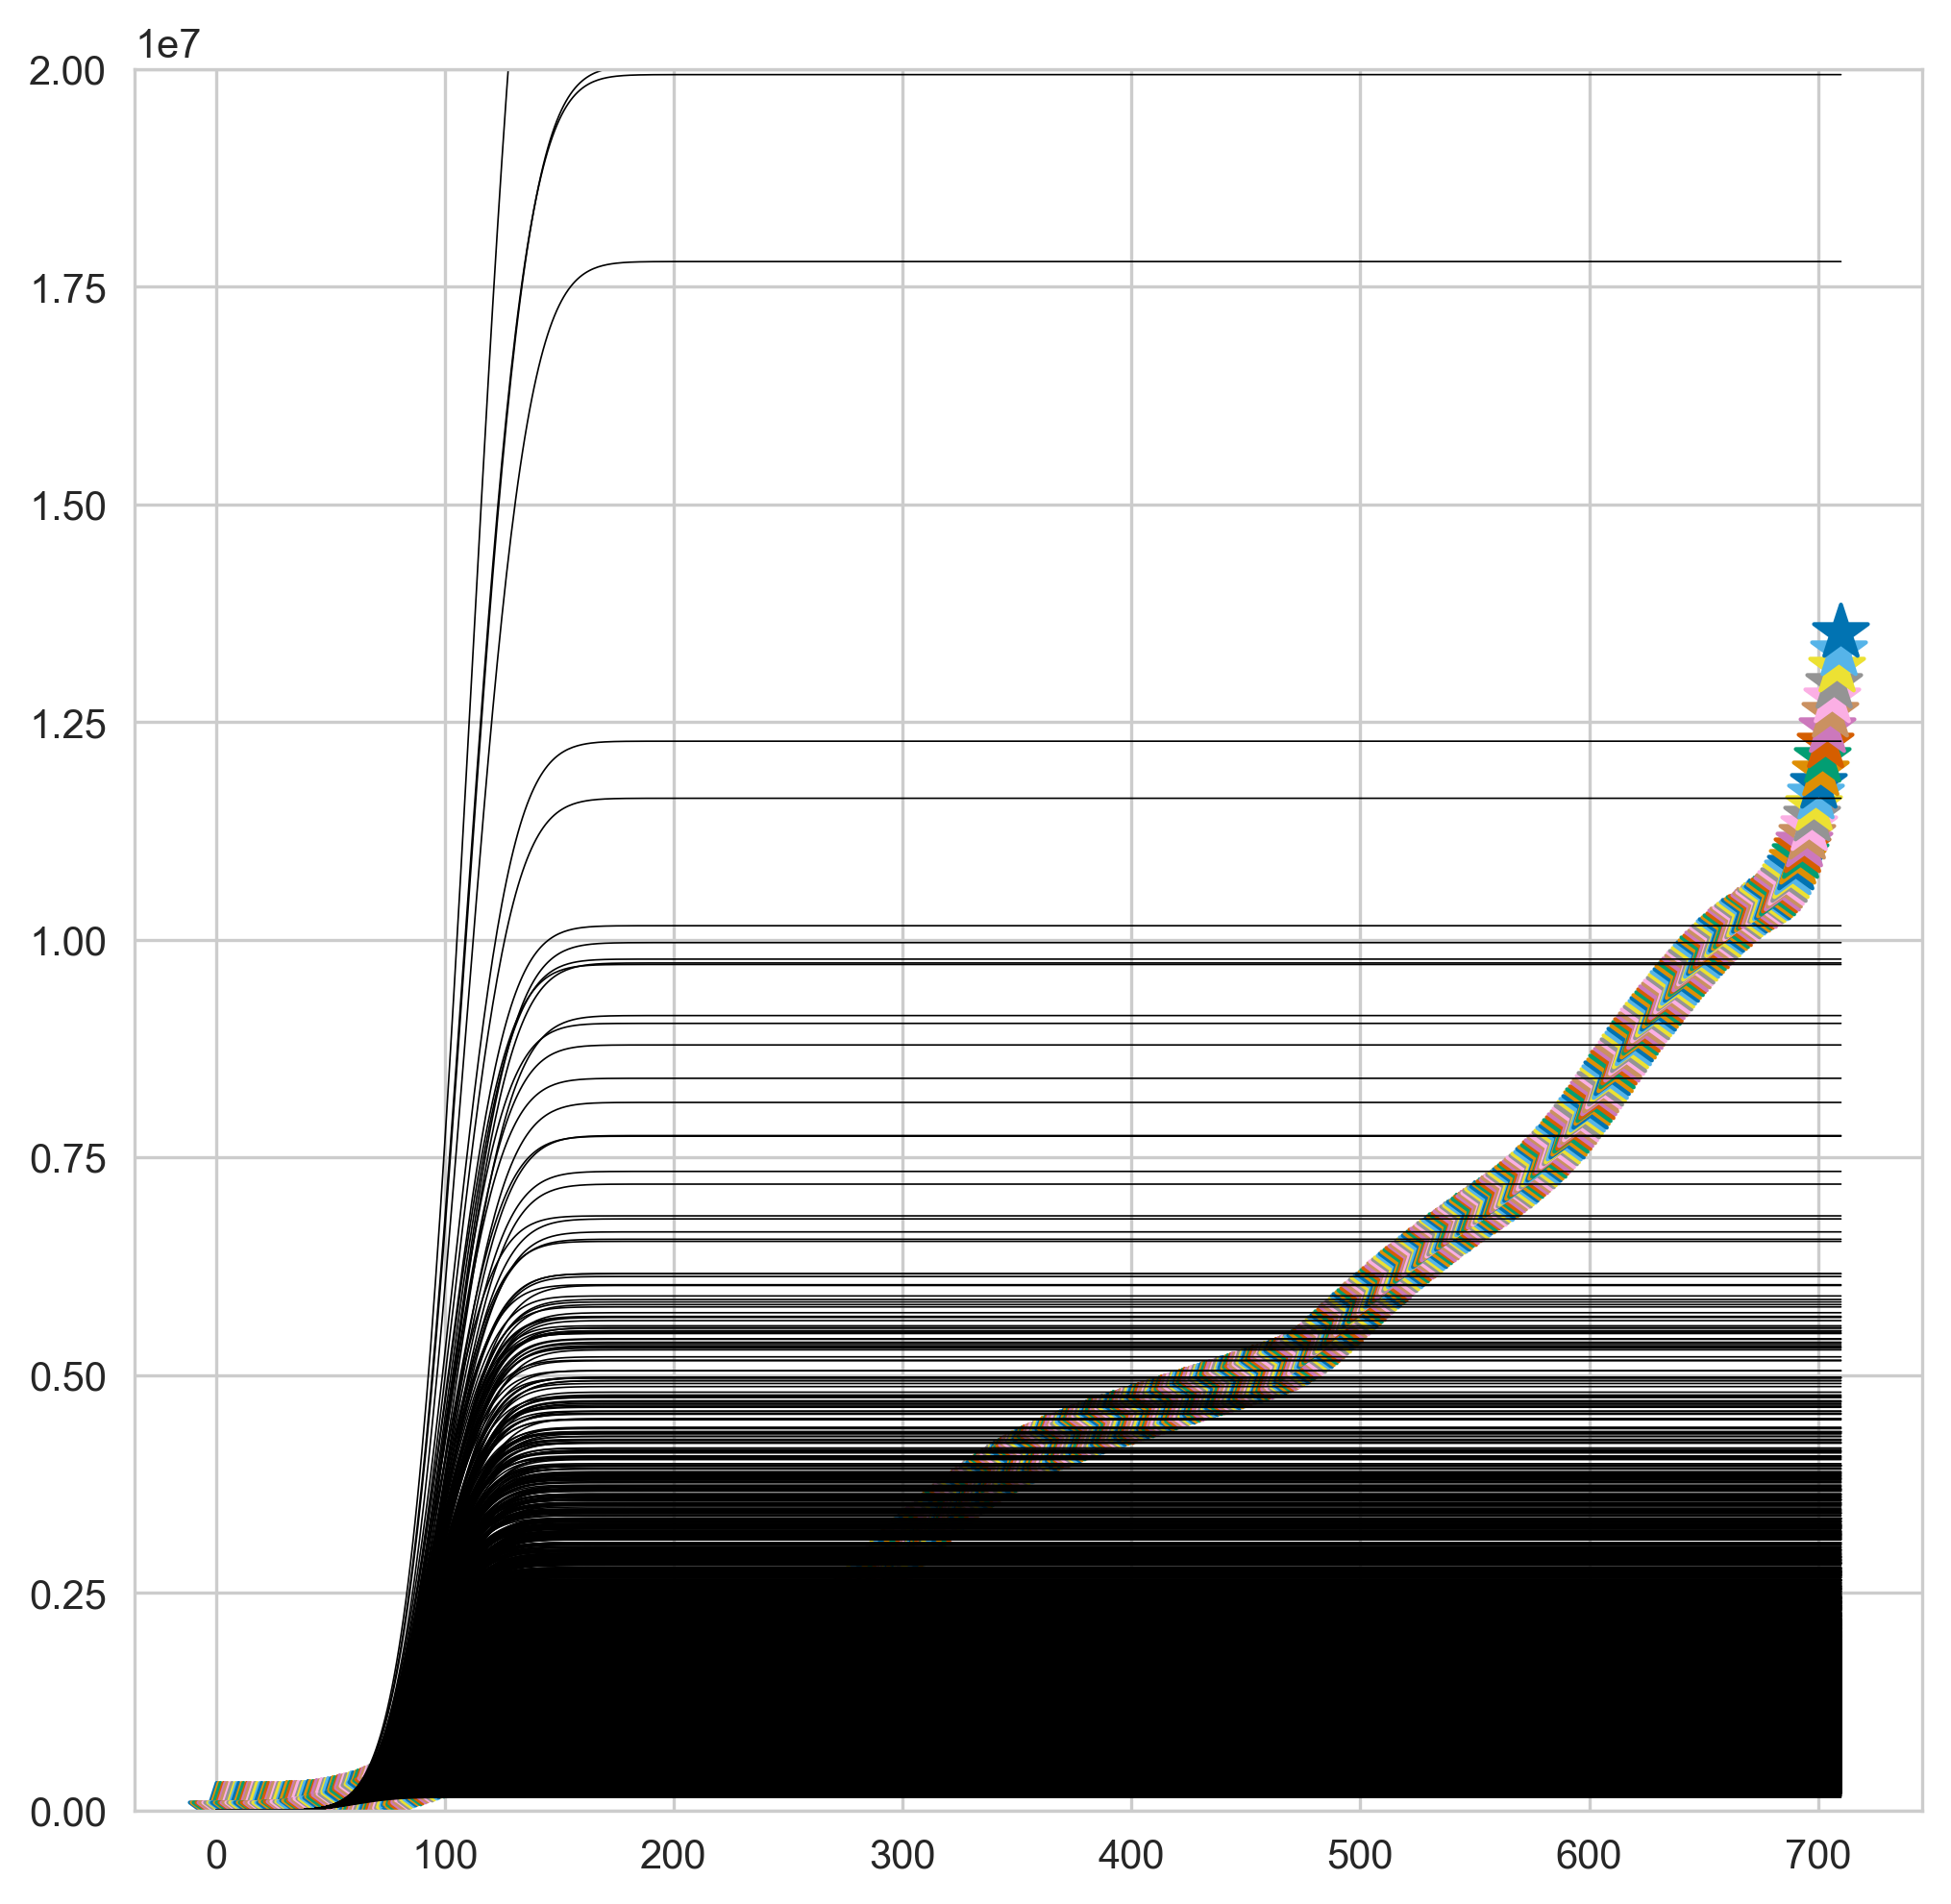

In [293]:

xs = test.copy()
n = 20000
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
#ax.set_xlim((xs[0], xs[-1]))
#ax.set_ylim((-1, 100))
myplot_sample_sigmoid(xs, mu_, sigma_, n, list(zip(range(len(df_all_rus.new_cases) + 1), (df_all_rus.total_cases))))

## из семплирования сигмоид видно, что по первым 50 дням очень сложно оценить реальную ширину и высоту сигмоиды

In [294]:
# Нарисуем результат
def plot_predictions_sigma(xs, mu, x, total_cases):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    #ax.set_xlim((xs[0], xs[-1]))
    #ax.set_ylim((-1, 200))
    ax.plot(range(711), total_cases, label="Правильный ответ")
    #predict = np.exp(w[0]*xs.x + w[1]*xs.x_2).cumsum()
    ax.plot(range(711), np.exp(mu[0] + mu[1]*xs.x + mu[2]*xs.x_2).cumsum(), color="red", label="MAP гипотеза")
    ax.fill_between(range(711), np.exp(mu[0] + mu[1]*xs.x + mu[2]*xs.x_2 - .25).cumsum(), np.exp(mu[0] + mu[1]*xs.x + mu[2]*xs.x_2 + .25).cumsum(), color=palette[1], alpha=.3, label="+- дисперсия шума")
    ax.fill_between(range(711), np.exp(np.mean(x, axis=0) - np.std(x, axis=0)).cumsum(), np.exp(np.mean(x, axis=0) + np.std(x, axis=0)).cumsum(), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.legend(fontsize=legend_fontsize)
    
# Посэмплируем прямые и выдадим статистики по предсказаниям
def sample_statistics(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = w[0] + w[1]*xs.x + w[2] * xs.x_2
    return res

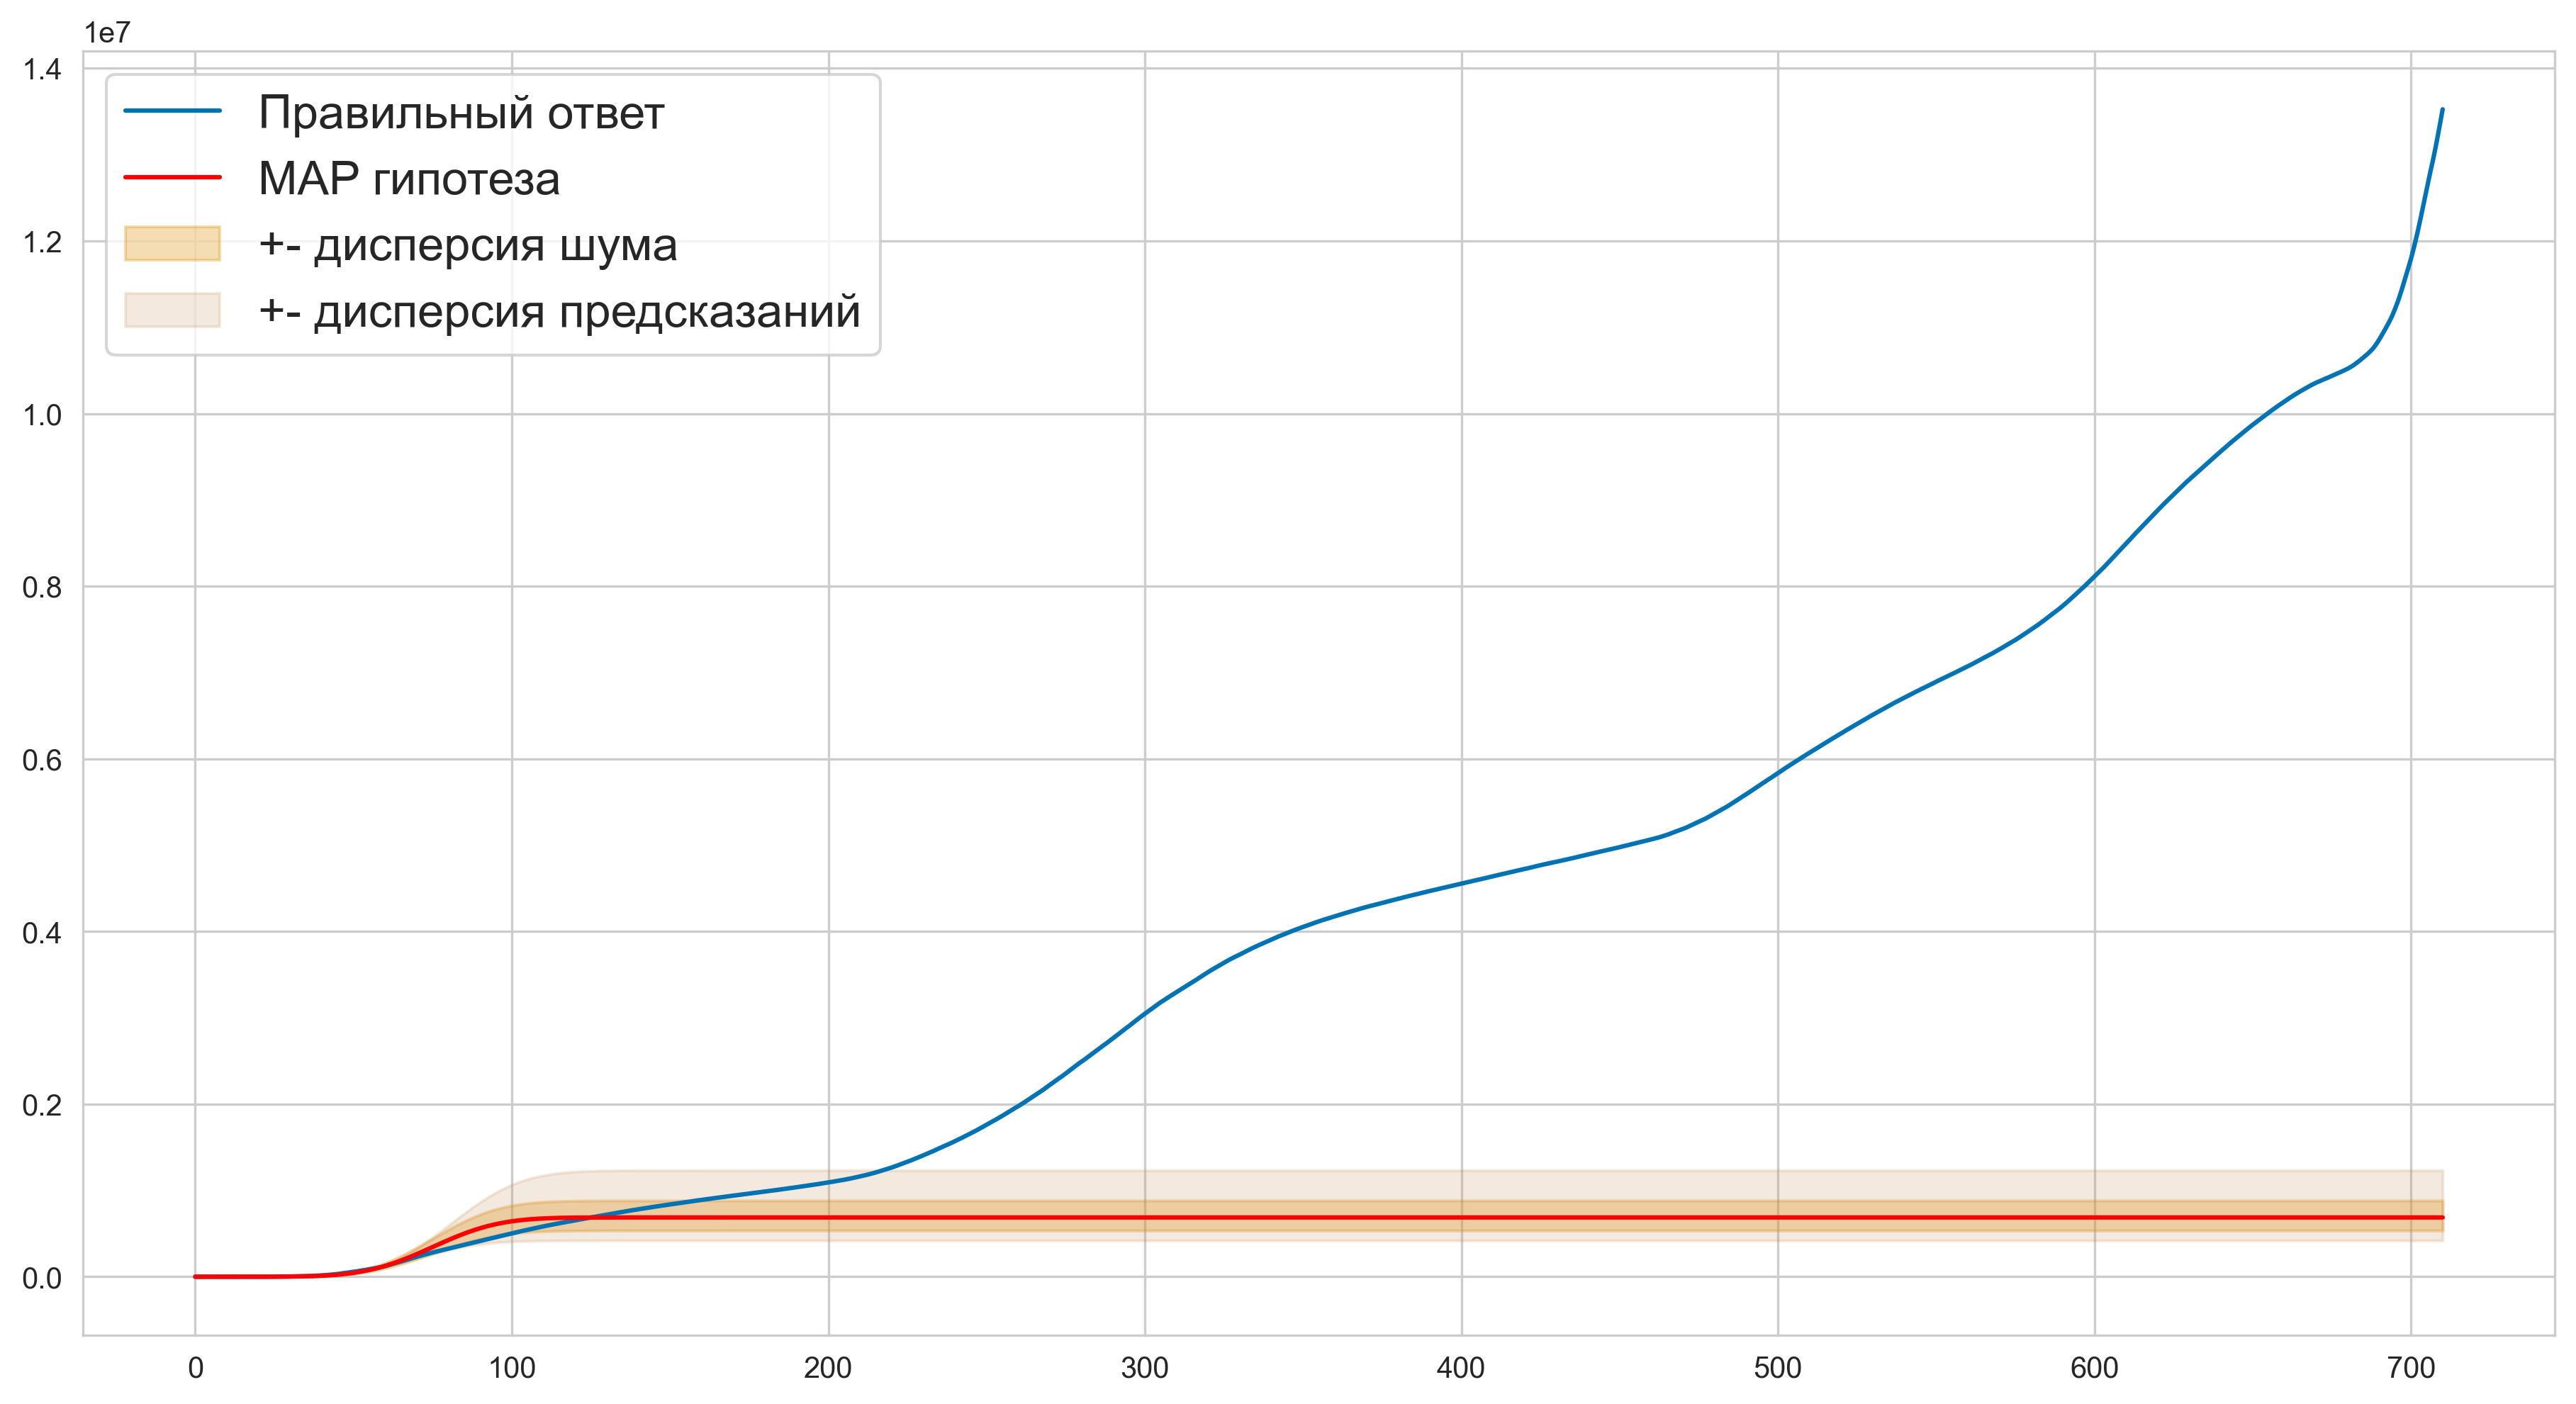

In [295]:
x = sample_statistics(mu_, sigma_, xs, n=n)
#print(x[0])
plot_predictions_sigma(xs, mu_, x, df_all_rus.total_cases)

In [296]:

my_w = np.random.multivariate_normal(mu_, sigma_, n)
num_ill = y_pred_test

for w in my_w:
    predict = np.exp(w[0] + w[1]*xs.x + w[2]*xs.x_2).cumsum()
    num_ill = np.vstack((num_ill, predict))
num_ill = num_ill[1:]

In [297]:
percentile_10 = []
percentile_90 = []
for i in range(len(y_pred_test)):
    percentile_10.append(np.percentile(num_ill[:,i], 10))
    percentile_90.append(np.percentile(num_ill[:,i], 90))
percentile_90 = np.array(percentile_90)
percentile_10 = np.array(percentile_10)

In [298]:
percentile_90.shape

(711,)

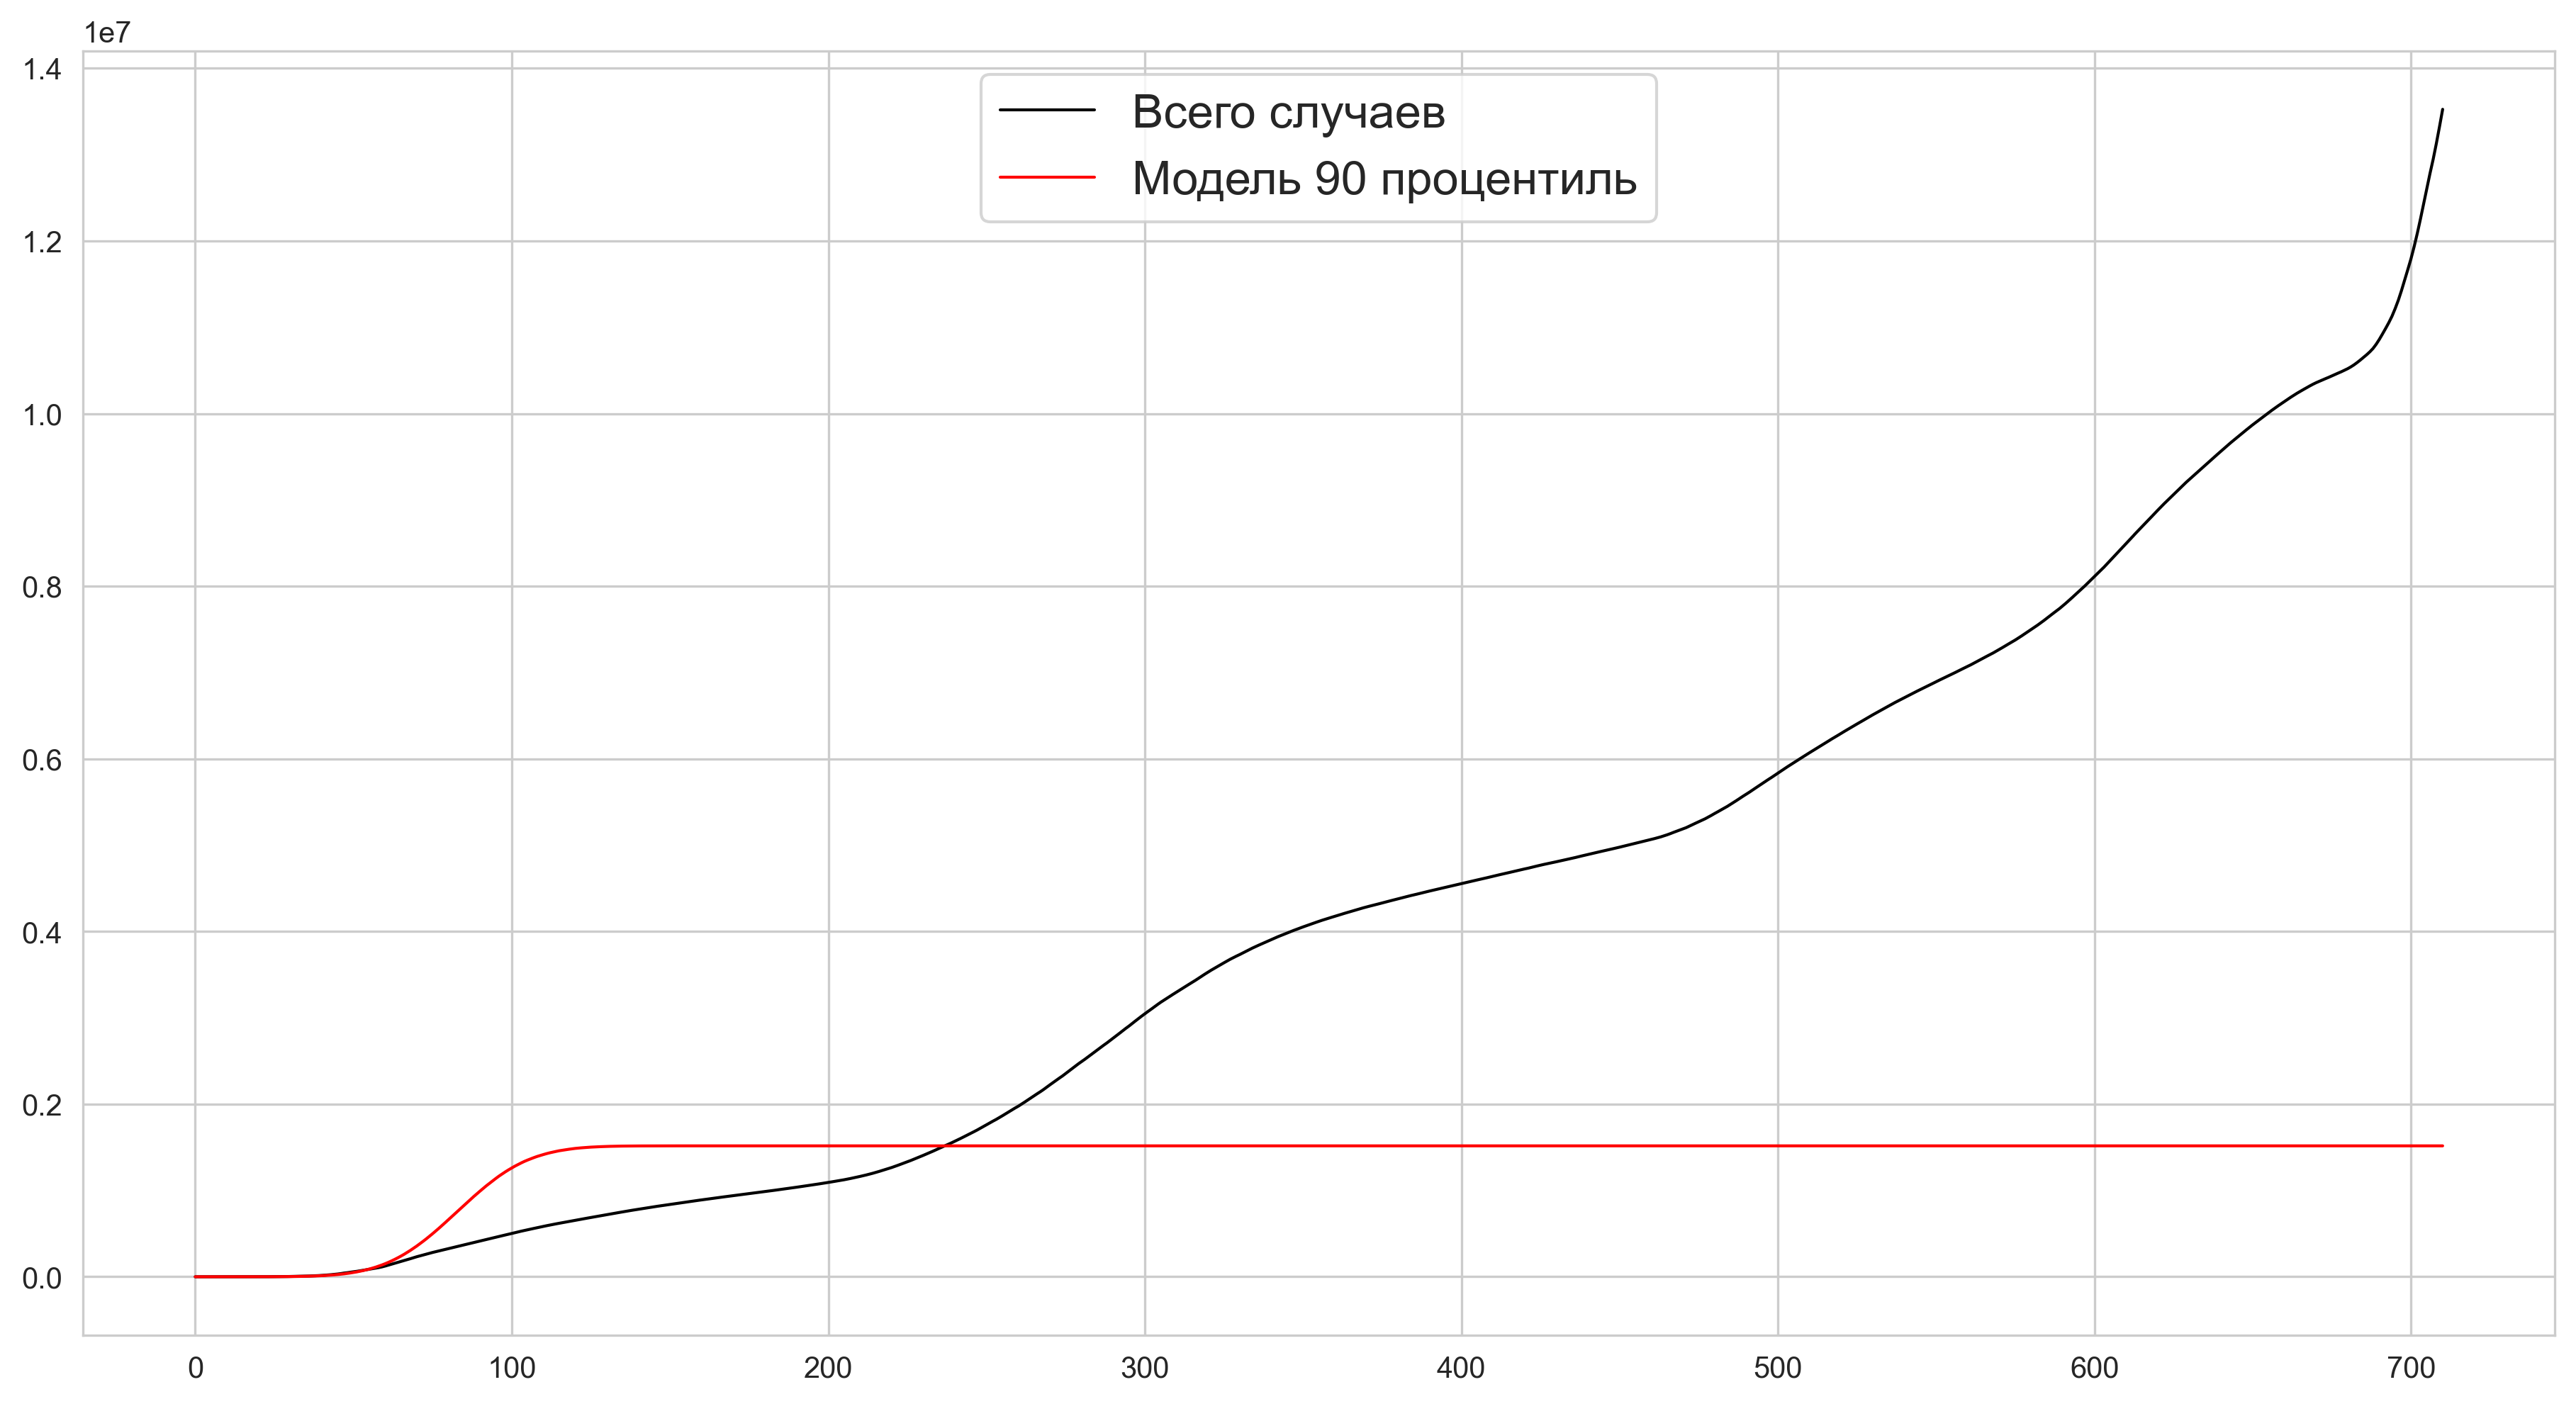

In [299]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(range(len(df_all_rus)), df_all_rus.total_cases, linewidth=1, label="Всего случаев", color="black")
ax.plot(range(len(df_all_rus)), percentile_90, linewidth=1, label="Модель 90 процентиль", color="red")

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

## Как оказалось, что всего заболевших было гораздо больше, чем по наихудшему  предсказаю модели, наверное в Швецарии или в другой стране, которая не вводила локдаун был такой же аналитик как я ;D и поэтому сказал, что нету смысла вводить локдаун ;D 

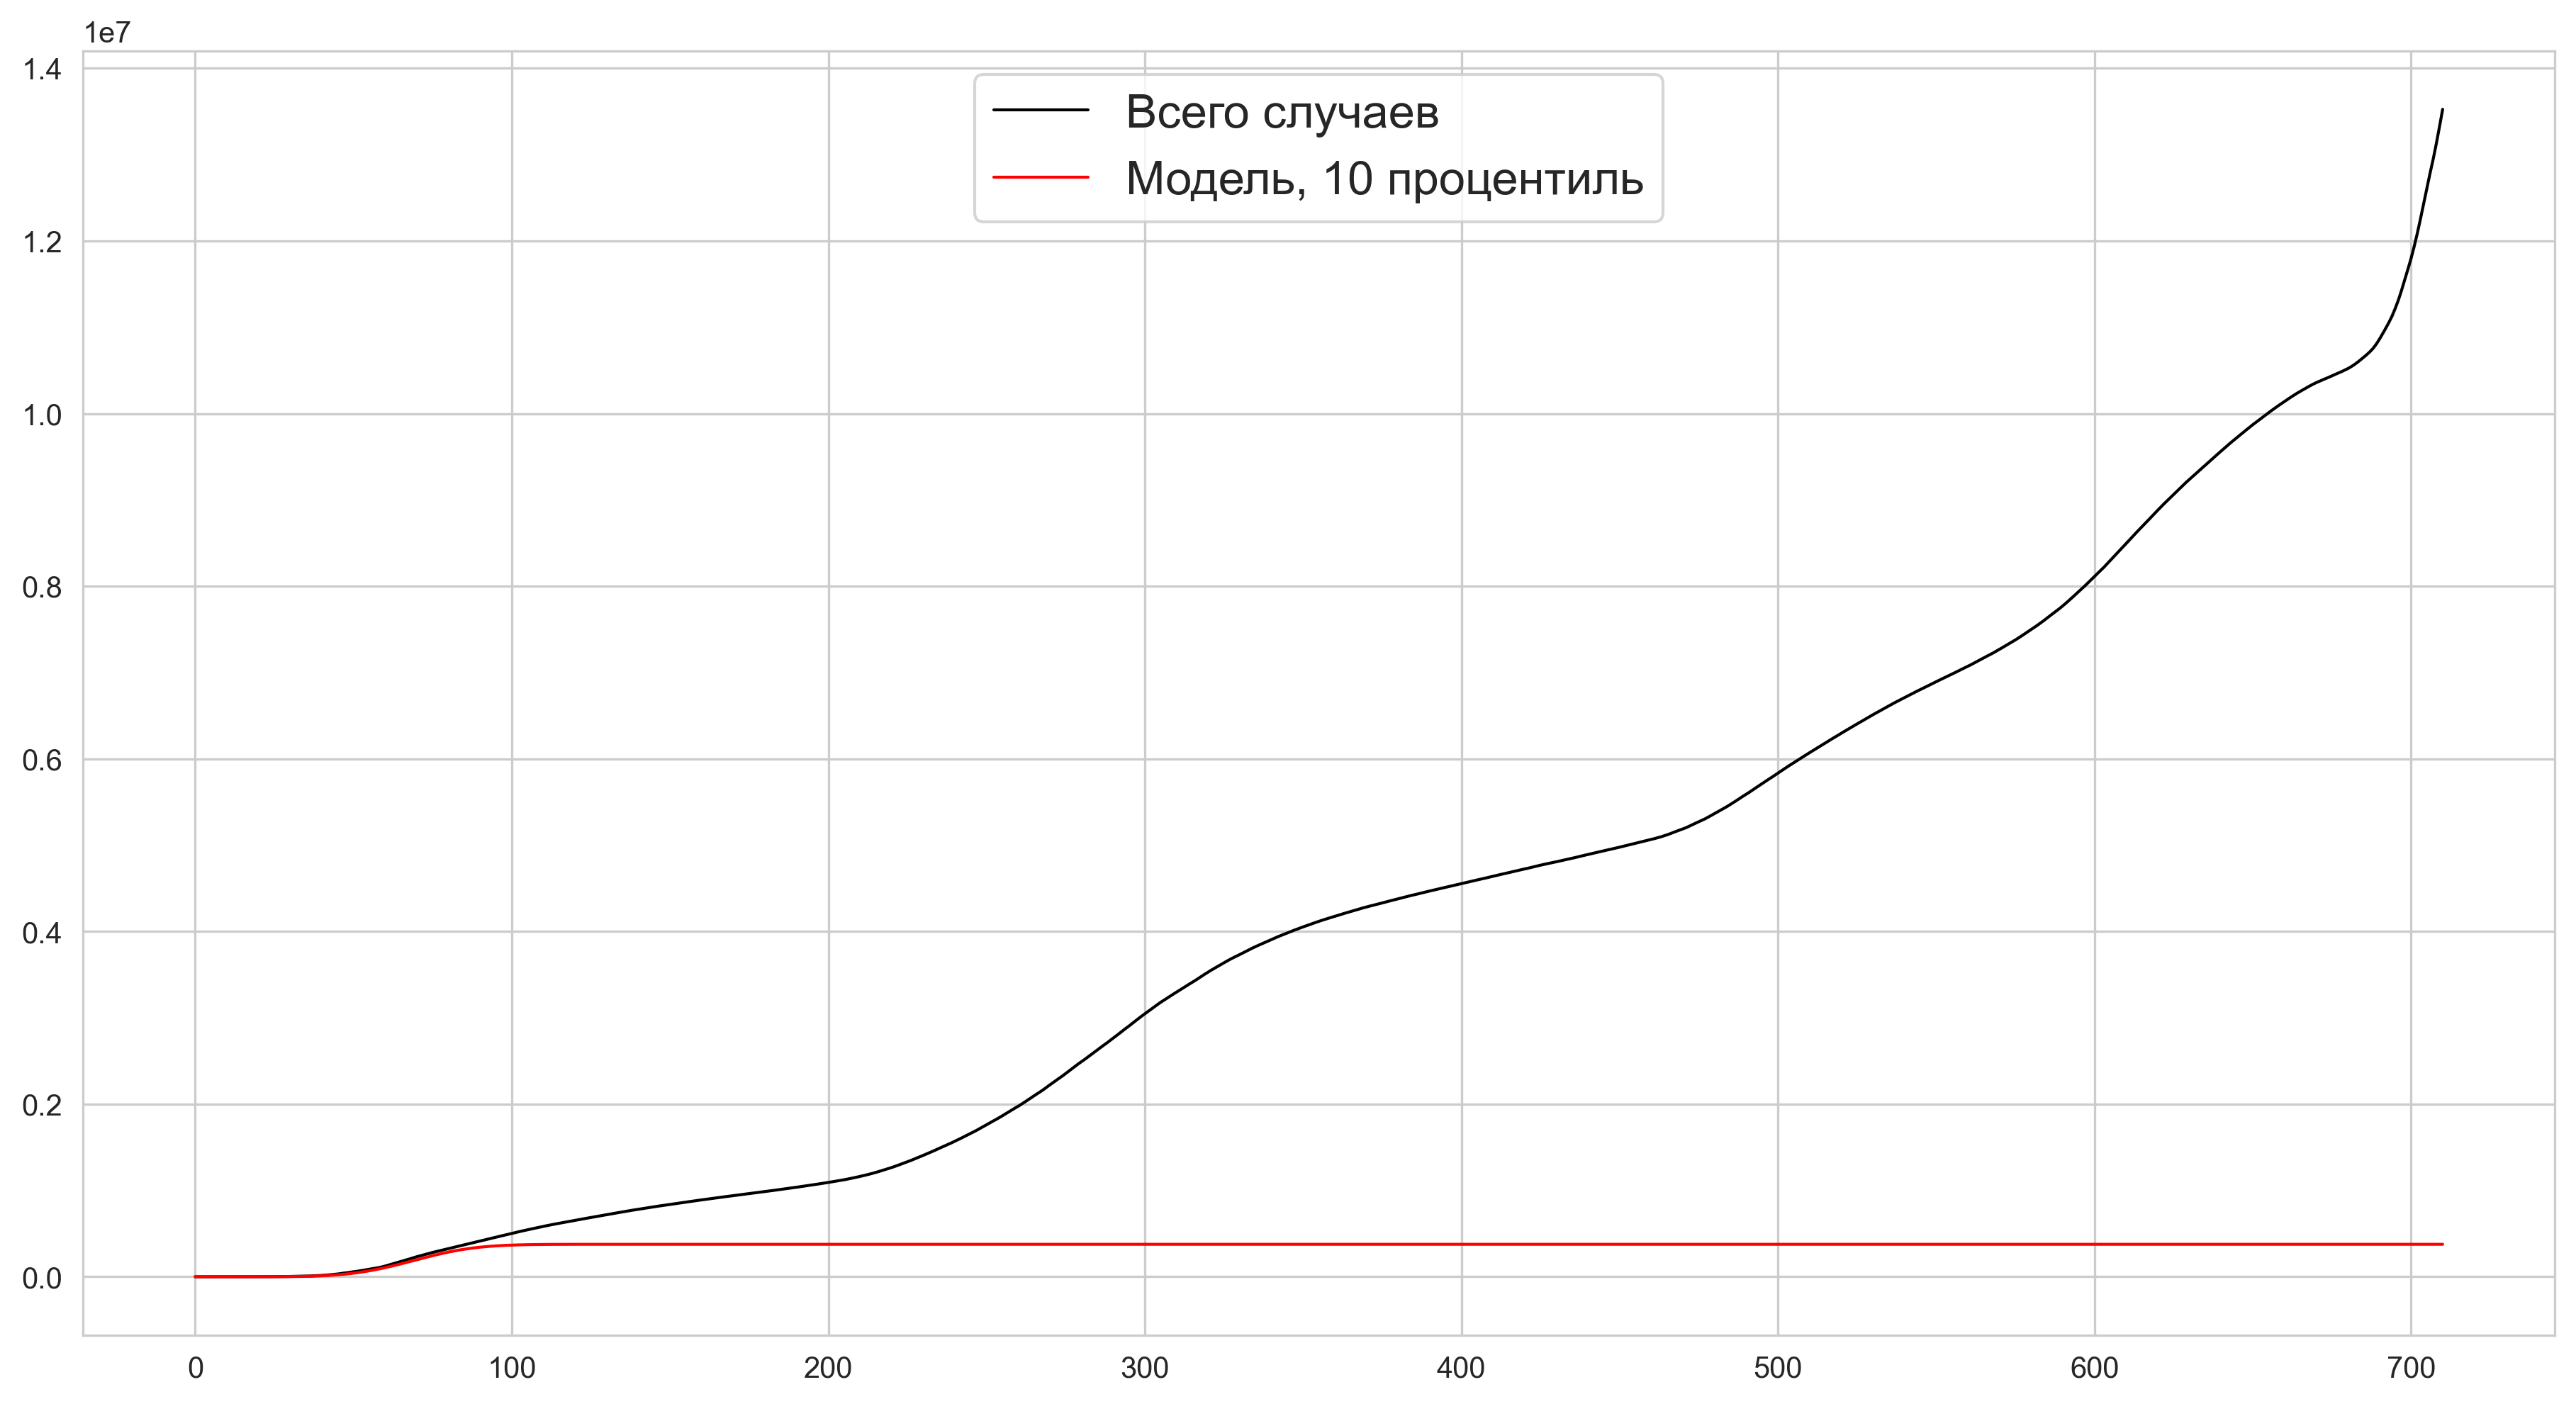

In [300]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(range(len(df_all_rus)), df_all_rus.total_cases, linewidth=1, label="Всего случаев", color="black")
ax.plot(range(len(df_all_rus)), percentile_10, linewidth=1, label="Модель, 10 процентиль", color="red")

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

In [301]:
df.iso_code.unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GNB',
       'GUY', 'HTI', 'OWID_HIC', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'OWID_INT', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN',
       'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'OWID_

In [319]:
country_dict = {'RUS' : datetime.strptime('2020-03-03', '%Y-%m-%d'), 
 'KAZ' :datetime.strptime('2020-03-13', '%Y-%m-%d'),
# 'SWZ' : datetime.strptime('2020-02-23', '%Y-%m-%d'),
'BLR' : datetime.strptime('2020-03-03', '%Y-%m-%d'),
 'DEU' : datetime.strptime('2020-02-21', '%Y-%m-%d'),
 'FRA' : datetime.strptime('2020-02-21', '%Y-%m-%d'),
'ITA' : datetime.strptime('2020-02-20', '%Y-%m-%d'),
'KOR' : datetime.strptime('2020-02-17', '%Y-%m-%d'),
'POL' : datetime.strptime('2020-03-05', '%Y-%m-%d'),
'AUS' : datetime.strptime('2020-02-25', '%Y-%m-%d')}



In [320]:
for iso in []:
    END_DATE = BEGIN_DATE + timedelta(days=15)
    #df.date.between(BEGIN_DATE, END_DATE)
    #cur_df = df[df.date < END_DATE][df.iso_code == iso]
    cur_df = df[df.date.between(BEGIN_DATE, END_DATE)][df.iso_code == iso]
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.plot(cur_df.date,cur_df.total_cases, linewidth=1, label=f"Всего случаев {iso}", color="black")
    
    ax.legend(loc="upper center", fontsize=legend_fontsize)

    plt.show()

In [324]:
def calc_params(cur_df, train):
    cur_mu, cur_sigma = np.array([0, 0, 0]), 2*np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    y = np.log(cur_df.new_cases).replace(-np.inf, 0)
    X = train.to_numpy()
    sigma_noise = 0.25
    sigma_ = np.linalg.inv(np.linalg.inv(cur_sigma) + np.dot(X.T, X) / (sigma_noise ** 2))
    mu_ = np.dot(sigma_, ( np.dot(np.linalg.inv(cur_sigma), cur_mu) + np.dot(X.T, y) / (sigma_noise ** 2) ) )
    return {'mu': mu_, 'sigma': sigma_}


In [325]:
data = { 
    'bias': np.ones(len(filtred_df.new_cases)),
    'x': np.arange(1, len(filtred_df.new_cases) + 1),
    'x_2': np.power(np.arange(1, len(filtred_df.new_cases) + 1), 2),
}
train = pd.DataFrame.from_dict(data)
iso_params_dict = {}
for iso, begin_date in country_dict.items():
    print(iso)
    end_date = begin_date + timedelta(days=49)
    cur_df = df[df.date.between(begin_date, end_date)][df.iso_code == iso]
    iso_params_dict[iso] = calc_params(cur_df, train)
    

RUS
KAZ
BLR
DEU
FRA
ITA
KOR
POL
AUS


<ipython-input-325-a70ec46b589a>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cur_df = df[df.date.between(begin_date, end_date)][df.iso_code == iso]


In [326]:
iso_params_dict

{'RUS': {'mu': array([-0.66982225,  0.2789449 , -0.00182419]),
  'sigma': array([[ 1.21258220e-02, -9.60293055e-04,  1.58463276e-05],
         [-9.60293055e-04,  9.93571101e-05, -1.83193136e-06],
         [ 1.58463276e-05, -1.83193136e-06,  3.59441095e-08]])},
 'KAZ': {'mu': array([ 0.53220097,  0.18120108, -0.00181693]),
  'sigma': array([[ 1.21258220e-02, -9.60293055e-04,  1.58463276e-05],
         [-9.60293055e-04,  9.93571101e-05, -1.83193136e-06],
         [ 1.58463276e-05, -1.83193136e-06,  3.59441095e-08]])},
 'BLR': {'mu': array([0.16518715, 0.01338244, 0.0026745 ]),
  'sigma': array([[ 1.21258220e-02, -9.60293055e-04,  1.58463276e-05],
         [-9.60293055e-04,  9.93571101e-05, -1.83193136e-06],
         [ 1.58463276e-05, -1.83193136e-06,  3.59441095e-08]])},
 'DEU': {'mu': array([-1.11906899,  0.48492329, -0.00598586]),
  'sigma': array([[ 1.21258220e-02, -9.60293055e-04,  1.58463276e-05],
         [-9.60293055e-04,  9.93571101e-05, -1.83193136e-06],
         [ 1.58463276e-0

In [327]:
from mpl_toolkits import mplot3d

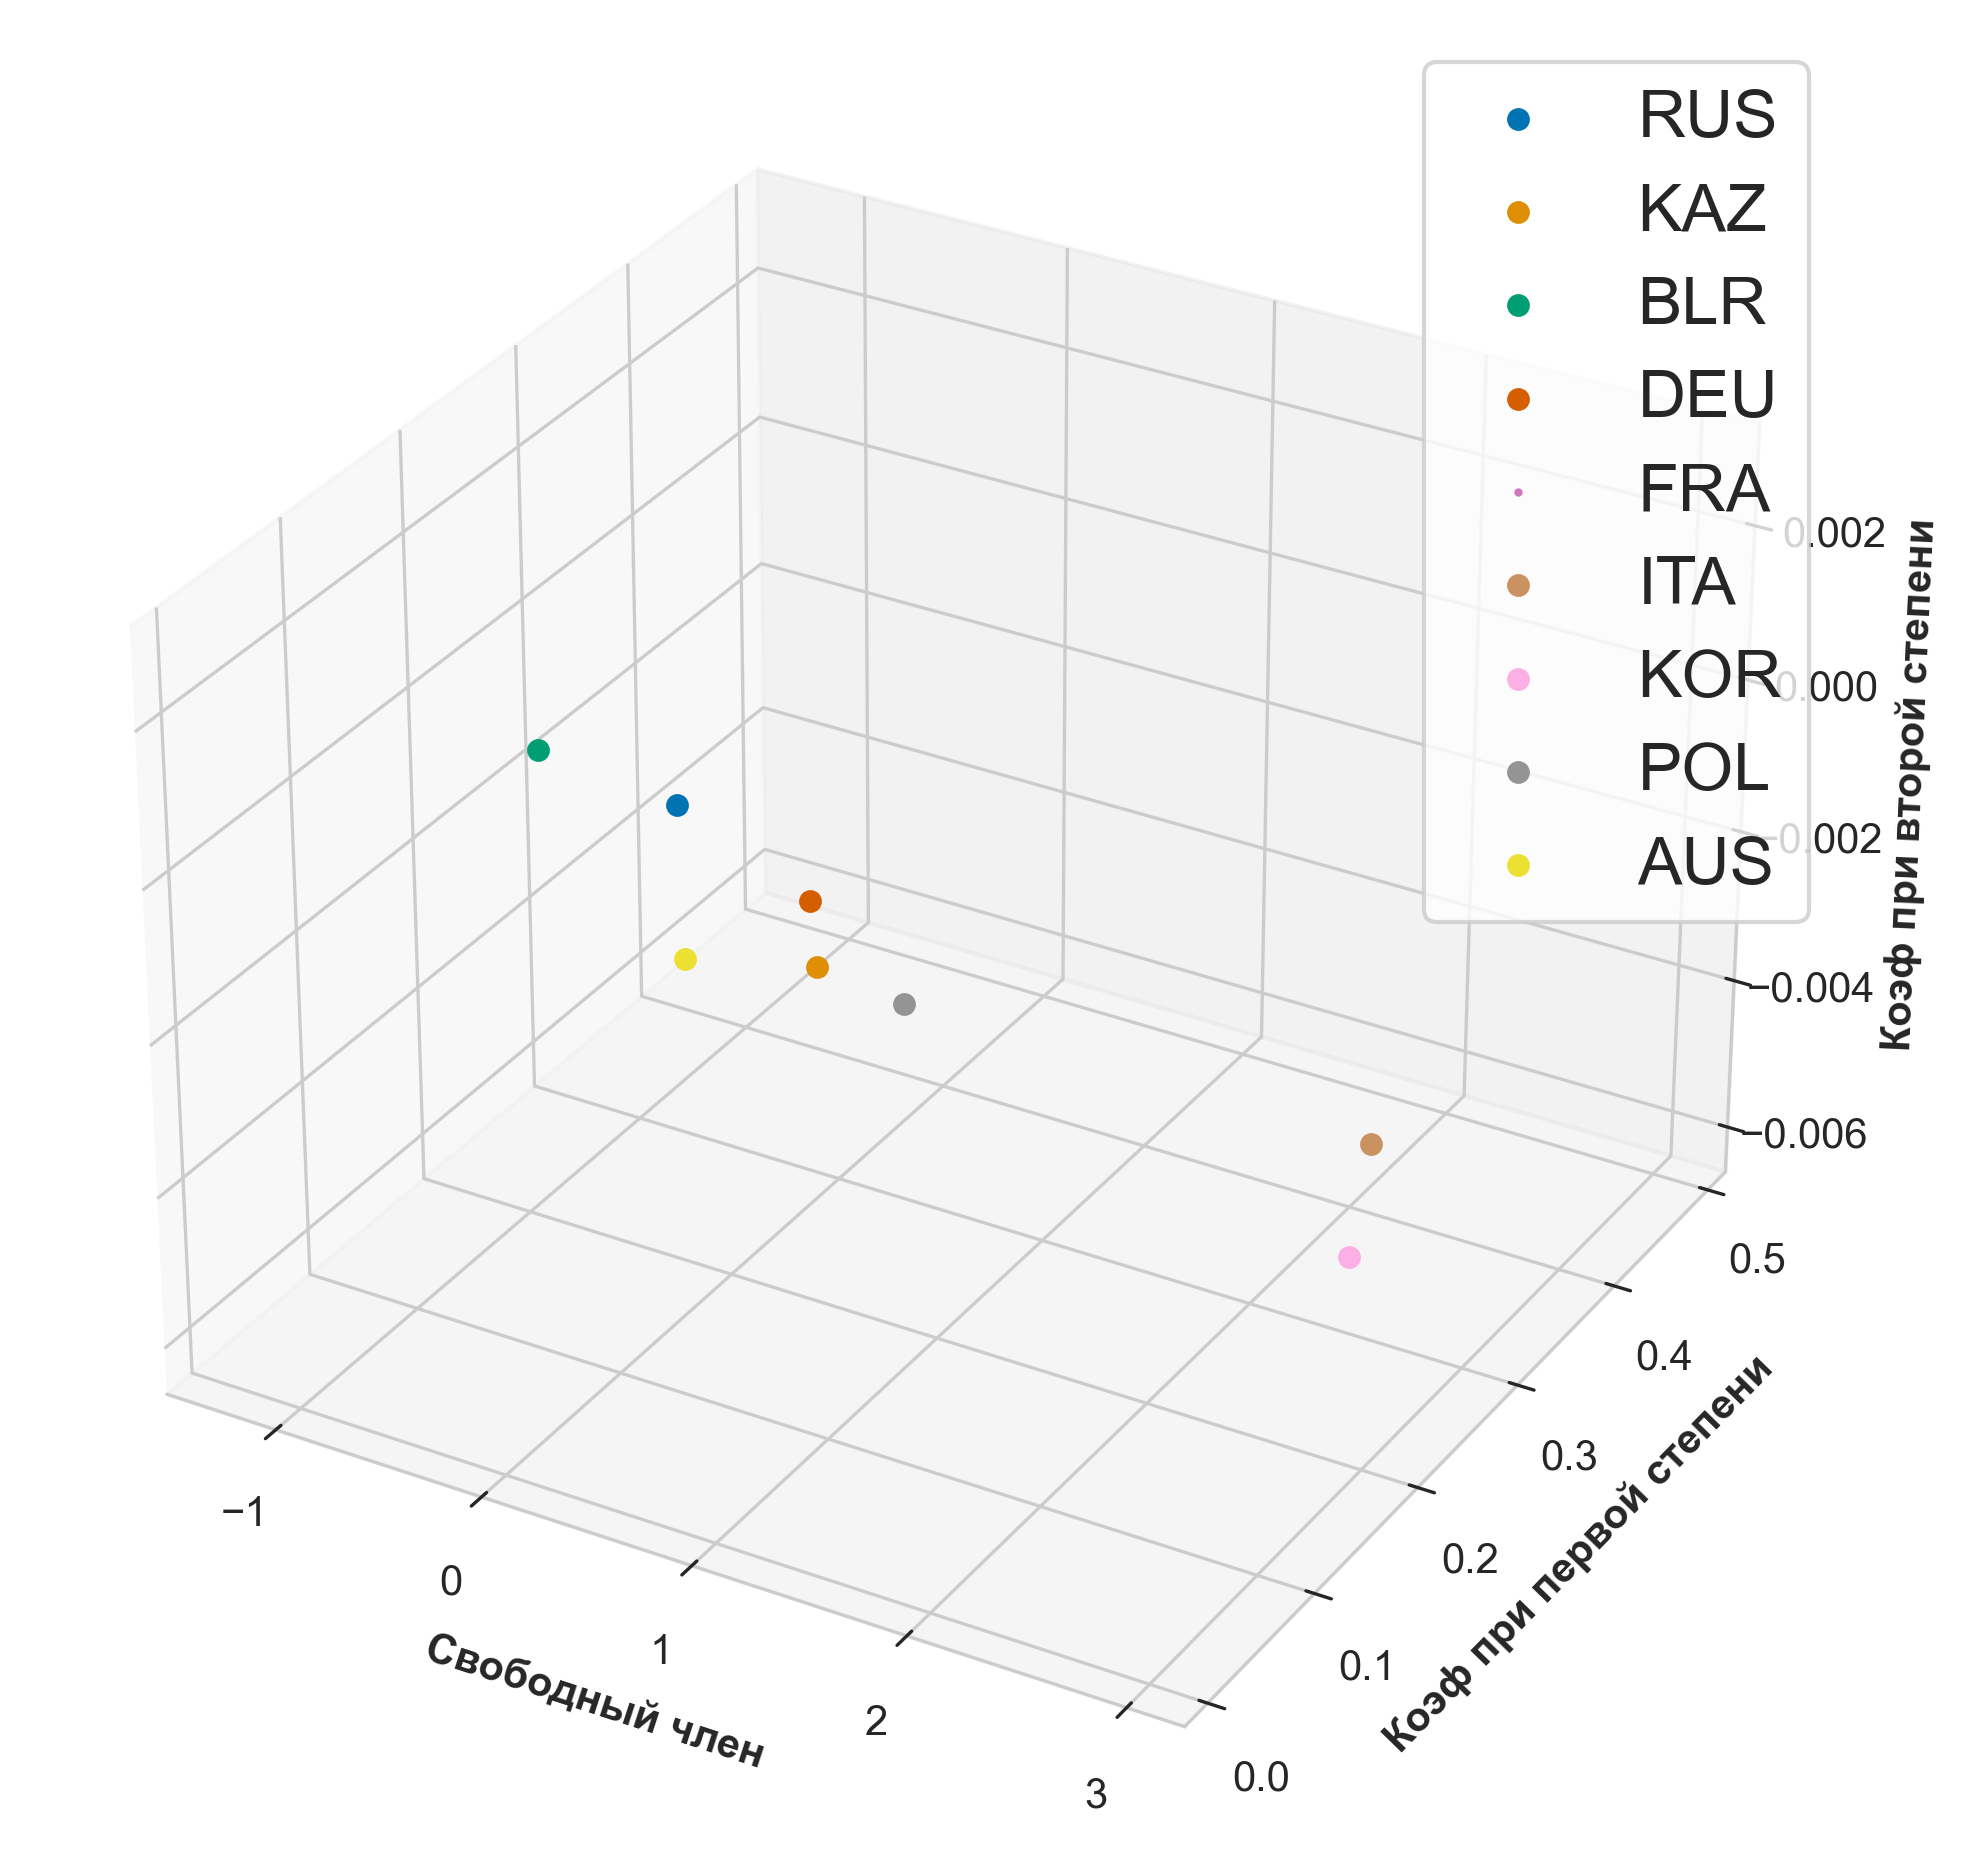

In [332]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection ="3d")
for iso, param in iso_params_dict.items():
    x, y, z = param['mu']
    ax.scatter3D(x, y, z, label=iso)
#ax.plot(range(len(df_all_rus)), df_all_rus.total_cases, linewidth=1, label="Всего случаев", color="black")
#ax.plot(range(len(df_all_rus)), percentile_90, linewidth=1, label="Модель 90 процентиль", color="red")
ax.set_xlabel('Свободный член', fontweight ='bold')
ax.set_ylabel('Коэф при первой степени', fontweight ='bold')
ax.set_zlabel('Коэф при второй степени', fontweight ='bold')
ax.legend( fontsize=legend_fontsize)

plt.show()

In [334]:
new_dict = {'iso':[], 'mu_0':[], 'mu_1':[], 'mu_2':[]}
for iso, param in iso_params_dict.items():
    x, y, z = param['mu']
    new_dict['iso'].append(iso)
    new_dict['mu_0'].append(x)
    new_dict['mu_1'].append(y)
    new_dict['mu_2'].append(z)
    #ax.scatter3D(x, y, z, label=iso)

In [339]:
df_country = pd.DataFrame.from_dict(new_dict)

In [333]:
import plotly.express as px

In [341]:
fig = px.scatter_3d(df_country, x='mu_0', y='mu_1', z='mu_2', color='iso')
fig.show()

## Да, кластеризовать можно, возможно предположить, что результаты кластеризации имеют положительную корреляцию с степеью соблюдения локдаунов, допустив в германии и австралии жёсткие локдауны были и люди их соблюдали(или их принуждали соблюдать) поэтому они не далеко от друг друга. По поводу карантина сложно сказать, т.к. нужно знать мощности медицинской системы в той или иной стране и исходя из медицинских мощностей и результатами предсказаний делать выводы.